In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read in all the dataframes
train = pd.read_csv('/kaggle/input/home-credit-default-risk/application_train.csv')
test = pd.read_csv('/kaggle/input/home-credit-default-risk/application_test.csv')
bureau = pd.read_csv('/kaggle/input/home-credit-default-risk/bureau.csv')
bureau_balance = pd.read_csv('/kaggle/input/home-credit-default-risk/bureau_balance.csv')
previous = pd.read_csv('/kaggle/input/home-credit-default-risk/previous_application.csv')
installments = pd.read_csv('/kaggle/input/home-credit-default-risk/installments_payments.csv')
credit = pd.read_csv('/kaggle/input/home-credit-default-risk/credit_card_balance.csv')
cash = pd.read_csv('/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv')

In [ ]:
print('train data shape: ', train.shape)
print('test data shape: ', test.shape)
print('burea data shape', bureau.shape)
print('bureau_balance data shape', bureau_balance.shape)
print('previous data shape', previous.shape)
print('installments data shape', installments.shape)
print('credit data shape', credit.shape)
print('cash data shape', cash.shape)

train data shape:  (307511, 122)
test data shape:  (48744, 121)
burea data shape (1716428, 17)
bureau_balance data shape (27299925, 3)
previous data shape (1670214, 37)
installments data shape (13605401, 8)
credit data shape (3840312, 23)
cash data shape (10001358, 8)


In [ ]:
pd.set_option('display.max_columns', None)
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Column Types

In [ ]:
# Number of each type of column
train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

### Convert Type of Columns

In [ ]:
def convert_types(df, print_info = False):

    original_memory = df.memory_usage().sum()

    # Iterate through each column
    for c in df:

        # Convert ids and booleans to integers
        if ('SK_ID' in c):
            df[c] = df[c].fillna(0).astype(np.int32)

        # Convert objects to category
        elif (df[c].dtype == 'object') and (df[c].nunique() < df.shape[0]):
            df[c] = df[c].astype('category')

        # Booleans mapped to integers
        elif list(df[c].unique()) == [1, 0]:
            df[c] = df[c].astype(bool)

        # Float64 to float32
        elif df[c].dtype == float:
            df[c] = df[c].astype(np.float32)

        # Int64 to int32
        elif df[c].dtype == int:
            df[c] = df[c].astype(np.int32)

    new_memory = df.memory_usage().sum()

    if print_info:
        print(f'Original Memory Usage: {round(original_memory / 1e9, 2)} gb')
        print(f'New Memory Usage: {round(new_memory / 1e9, 2)} gb')

    return df

In [ ]:
train = convert_types(train, print_info=True)
test = convert_types(test, print_info=True)
bureau = convert_types(bureau, print_info=True)
bureau_balance = convert_types(bureau_balance, print_info=True)
previous = convert_types(previous, print_info=True)
installments = convert_types(installments, print_info=True)
credit = convert_types(credit, print_info=True)
cash = convert_types(cash, print_info=True)

Original Memory Usage: 0.3 gb
New Memory Usage: 0.13 gb
Original Memory Usage: 0.05 gb
New Memory Usage: 0.02 gb
Original Memory Usage: 0.23 gb
New Memory Usage: 0.1 gb
Original Memory Usage: 0.66 gb
New Memory Usage: 0.25 gb
Original Memory Usage: 0.49 gb
New Memory Usage: 0.16 gb
Original Memory Usage: 0.87 gb
New Memory Usage: 0.44 gb
Original Memory Usage: 0.71 gb
New Memory Usage: 0.34 gb
Original Memory Usage: 0.64 gb
New Memory Usage: 0.29 gb


## Exploratory Data Analysis (EDA)

In [ ]:
train['TARGET'].value_counts()

TARGET
False    282686
True      24825
Name: count, dtype: int64

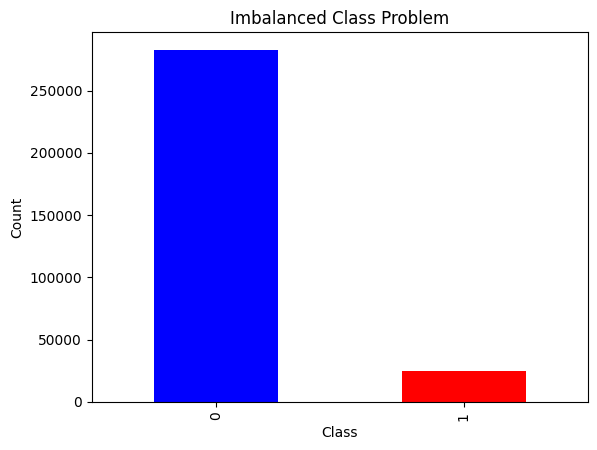

In [ ]:
# Count the number of instances for each class
target_counts = train['TARGET'].value_counts()

# Plot the bar chart
target_counts.sort_index().plot(kind='bar', color=['blue', 'red'])

plt.title('Imbalanced Class Problem')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1],  labels=['0', '1'])

plt.show()

### Examine Missing Values

In [ ]:
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()

  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)

  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})

  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)

  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
      "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")

  # Return the dataframe with missing information
  return mis_val_table_ren_columns

In [ ]:
# Missing values of train
missing_values_train = missing_values_table(train)
missing_values_train.head(10)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,214865,69.9
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [ ]:
# Missing values of test
missing_values_test = missing_values_table(test)
missing_values_test.head(10)

Your selected dataframe has 121 columns.
There are 64 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,33495,68.7
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
NONLIVINGAPARTMENTS_MEDI,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2


In [ ]:
# Missing values of bureau
missing_values_bureau = missing_values_table(bureau)
missing_values_bureau.head(10)

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1
AMT_CREDIT_SUM,13,0.0


In [ ]:
# Missing values of bureau_balance
missing_values_bureau_balance = missing_values_table(bureau_balance)
missing_values_bureau_balance.head(10)

Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
# Missing values of previous
missing_values_previous = missing_values_table(previous)
missing_values_previous.head(10)

Your selected dataframe has 37 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
RATE_INTEREST_PRIVILEGED,1664263,99.6
RATE_INTEREST_PRIMARY,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_LAST_DUE,673065,40.3
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3
NFLAG_INSURED_ON_APPROVAL,673065,40.3


In [ ]:
# Missing values of installments
missing_values_installments = missing_values_table(installments)
missing_values_installments.head(10)

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
DAYS_ENTRY_PAYMENT,2905,0.0
AMT_PAYMENT,2905,0.0


In [ ]:
# Missing values of credit
missing_values_credit = missing_values_table(credit)
missing_values_credit.head(10)

Your selected dataframe has 23 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
AMT_PAYMENT_CURRENT,767988,20.0
AMT_DRAWINGS_ATM_CURRENT,749816,19.5
AMT_DRAWINGS_OTHER_CURRENT,749816,19.5
AMT_DRAWINGS_POS_CURRENT,749816,19.5
CNT_DRAWINGS_ATM_CURRENT,749816,19.5
CNT_DRAWINGS_POS_CURRENT,749816,19.5
CNT_DRAWINGS_OTHER_CURRENT,749816,19.5
AMT_INST_MIN_REGULARITY,305236,7.9
CNT_INSTALMENT_MATURE_CUM,305236,7.9


In [ ]:
# Missing values of cash
missing_values_cash = missing_values_table(cash)
missing_values_cash.head(10)

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
CNT_INSTALMENT_FUTURE,26087,0.3
CNT_INSTALMENT,26071,0.3


In [ ]:
def remove_missing_columns(dataset,threshold = 75):
    # Count the number of missing values of dataset
    dataset_miss = pd.DataFrame(dataset.isnull().sum())
    dataset_miss['percent'] = 100 * dataset_miss[0] / len(dataset)

    # list of missing columns for dataset
    missing_columns = list(dataset_miss.index[dataset_miss['percent'] > threshold])

    # Print information
    print(f'There are {len(missing_columns)} columns with greater than {threshold}% missing values.')

    # Drop the missing columns and return
    dataset = dataset.drop(columns = missing_columns)

    return dataset

In [ ]:
train_clean_missing = remove_missing_columns(train)
test_clean_missing = remove_missing_columns(test)
bureau_clean_missing = remove_missing_columns(bureau)
bureau_balance_clean_missing = remove_missing_columns(bureau_balance)
previous_clean_missing = remove_missing_columns(previous)
installments_clean_missing = remove_missing_columns(installments)
credit_clean_missing = remove_missing_columns(credit)
cash_clean_missing = remove_missing_columns(cash)

There are 0 columns with greater than 75% missing values.
There are 0 columns with greater than 75% missing values.
There are 0 columns with greater than 75% missing values.
There are 0 columns with greater than 75% missing values.
There are 2 columns with greater than 75% missing values.
There are 0 columns with greater than 75% missing values.
There are 0 columns with greater than 75% missing values.
There are 0 columns with greater than 75% missing values.


### Anomalies

In [ ]:
def find_outlier_features(df):
    outlier_features = []

    for col in df.select_dtypes(include=['number']).columns:
        mean, std = df[col].mean(), df[col].std()
        outliers = df[(df[col] > mean + 3 * std) | (df[col] < mean - 3 * std)]

        if not outliers.empty:
            outlier_features.append(col)

    return outlier_features

In [ ]:
outlier_columns = find_outlier_features(train_clean_missing)
print("Columns of the existence of anomalies:", outlier_columns)

Columns of the existence of anomalies: ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUAT

In [ ]:
train_clean_missing['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

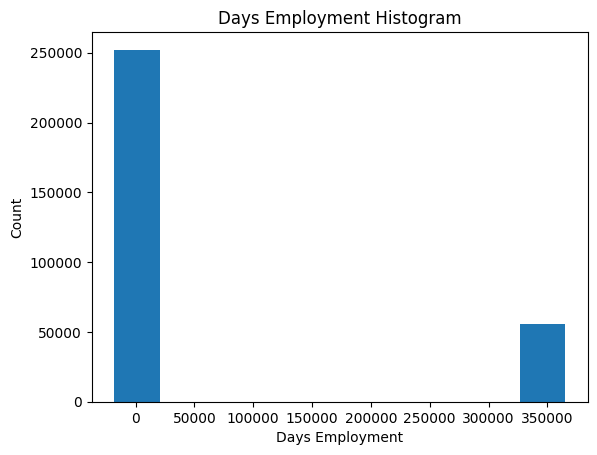

In [ ]:
train_clean_missing['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');
plt.ylabel('Count');

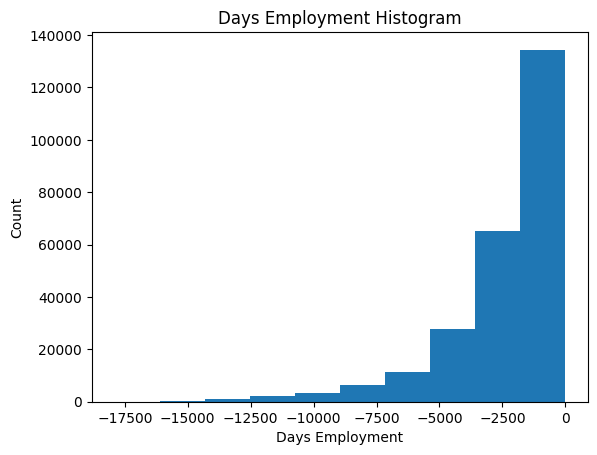

In [ ]:
# Create an anomalous flag column
train_clean_missing['DAYS_EMPLOYED_ANOM'] = train_clean_missing["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
train_clean_missing['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

train_clean_missing['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')
plt.ylabel('Count')

plt.show()

In [ ]:
test_clean_missing['DAYS_EMPLOYED_ANOM'] = test_clean_missing["DAYS_EMPLOYED"] == 365243
test_clean_missing["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print(f'There are {test_clean_missing["DAYS_EMPLOYED_ANOM"].sum()} anomalies in the test data out of {len(test_clean_missing)} entries')

There are 9274 anomalies in the test data out of 48744 entries


In [ ]:
previous_clean_missing['DAYS_FIRST_DRAWING_ANOM'] = previous_clean_missing["DAYS_FIRST_DRAWING"] == 365243
previous_clean_missing['DAYS_FIRST_DRAWING'].replace({365243: np.nan}, inplace= True)
print(f'There are {previous_clean_missing["DAYS_FIRST_DRAWING"].sum()} anomalies in the previous data out of {len(previous_clean_missing)} entries')

previous_clean_missing['DAYS_FIRST_DUE_ANOM'] = previous_clean_missing["DAYS_FIRST_DUE"] == 365243
previous_clean_missing['DAYS_FIRST_DUE'].replace({365243: np.nan}, inplace= True)
print(f'There are {previous_clean_missing["DAYS_FIRST_DUE"].sum()} anomalies in the previous data out of {len(previous_clean_missing)} entries')

previous_clean_missing['DAYS_LAST_DUE_1ST_VERSION_ANOM'] = previous_clean_missing["DAYS_LAST_DUE_1ST_VERSION"] == 365243
previous_clean_missing['DAYS_LAST_DUE_1ST_VERSION'].replace({365243: np.nan}, inplace= True)
print(f'There are {previous_clean_missing["DAYS_LAST_DUE_1ST_VERSION"].sum()} anomalies in the previous data out of {len(previous_clean_missing)} entries')

previous_clean_missing['DAYS_LAST_DUE_ANOM'] = previous_clean_missing["DAYS_LAST_DUE"] == 365243
previous_clean_missing['DAYS_LAST_DUE'].replace({365243: np.nan}, inplace= True)
print(f'There are {previous_clean_missing["DAYS_LAST_DUE"].sum()} anomalies in the previous data out of {len(previous_clean_missing)} entries')

previous_clean_missing['DAYS_TERMINATION_ANOM'] = previous_clean_missing["DAYS_TERMINATION"] == 365243
previous_clean_missing['DAYS_TERMINATION'].replace({365243: np.nan}, inplace= True)
print(f'There are {previous_clean_missing["DAYS_TERMINATION"].sum()} anomalies in the previous data out of {len(previous_clean_missing)} entries')


There are -64915148.0 anomalies in the previous data out of 1670214 entries
There are -1058451072.0 anomalies in the previous data out of 1670214 entries
There are -611666816.0 anomalies in the previous data out of 1670214 entries
There are -782925056.0 anomalies in the previous data out of 1670214 entries
There are -754558208.0 anomalies in the previous data out of 1670214 entries


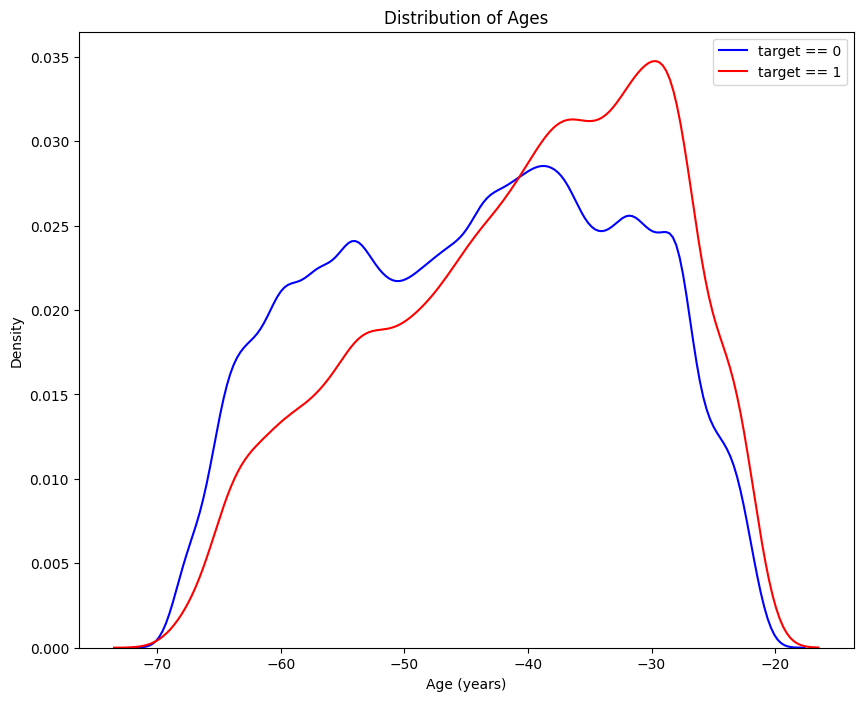

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_clean_missing.loc[train_clean_missing['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0', color='blue')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_clean_missing.loc[train_clean_missing['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1', color='red')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages')

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right')

plt.show()

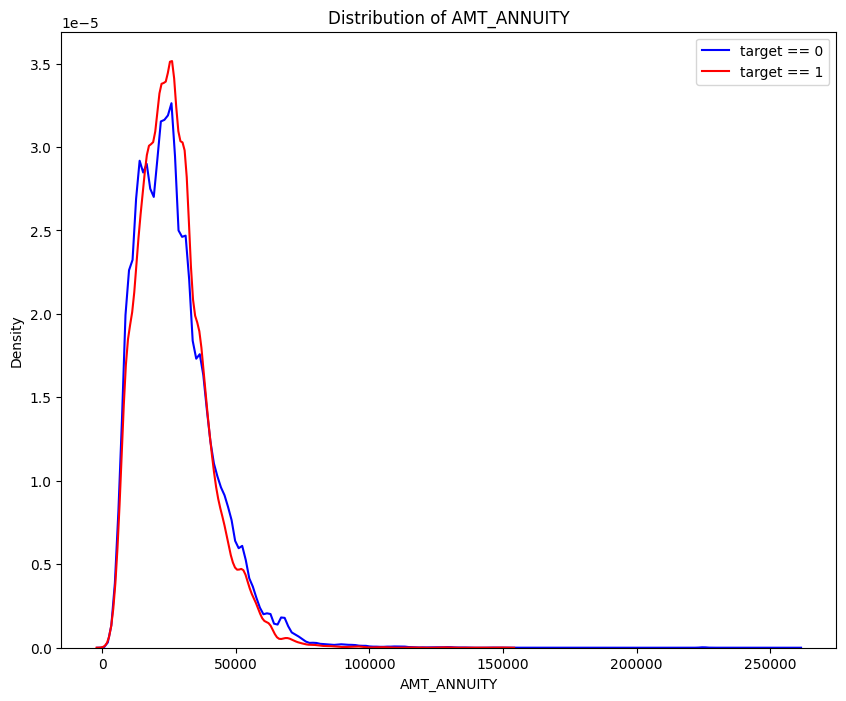

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_clean_missing.loc[train_clean_missing['TARGET'] == 0, 'AMT_ANNUITY'], label = 'target == 0', color='blue')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_clean_missing.loc[train_clean_missing['TARGET'] == 1, 'AMT_ANNUITY'], label = 'target == 1', color='red')

# Labeling of plot
plt.xlabel('AMT_ANNUITY'); plt.ylabel('Density'); plt.title('Distribution of AMT_ANNUITY')

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right')

plt.show()

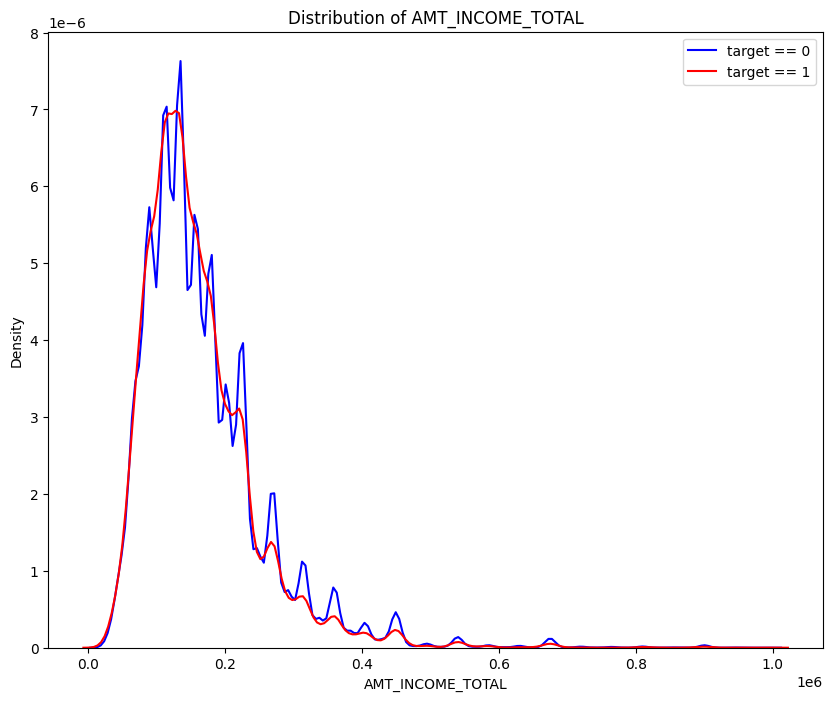

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_clean_missing.loc[(train_clean_missing['TARGET'] == 0) & (train_clean_missing['AMT_INCOME_TOTAL'] < 1000000), 'AMT_INCOME_TOTAL'], label = 'target == 0', color='blue')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_clean_missing.loc[(train_clean_missing['TARGET'] == 1) & (train_clean_missing['AMT_INCOME_TOTAL'] < 1000000), 'AMT_INCOME_TOTAL'], label = 'target == 1', color='red')

# Labeling of plot
plt.xlabel('AMT_INCOME_TOTAL'); plt.ylabel('Density'); plt.title('Distribution of AMT_INCOME_TOTAL')

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right')

plt.show()

<Figure size 800x600 with 0 Axes>

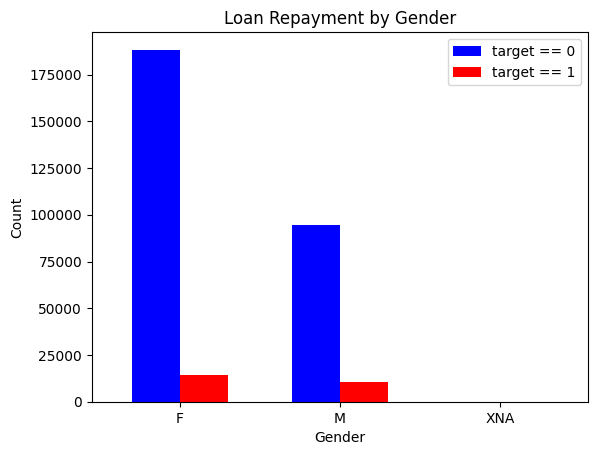

In [ ]:
# Exclude rows where CODE_GENDER is 'XNA'
filtered_data = train_clean_missing[train_clean_missing['CODE_GENDER'] != 'XNA']

# Count the number of instances for each gender and TARGET category
gender_counts = filtered_data.groupby(['CODE_GENDER', 'TARGET']).size().unstack()

# Set figure size
plt.figure(figsize=(8, 6))

# Plot the bar chart
gender_counts.plot(kind='bar', stacked=False, color=['blue', 'red'], width=0.6)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Loan Repayment by Gender')
plt.xticks(rotation=0)
plt.legend(['target == 0', 'target == 1'])
plt.show()

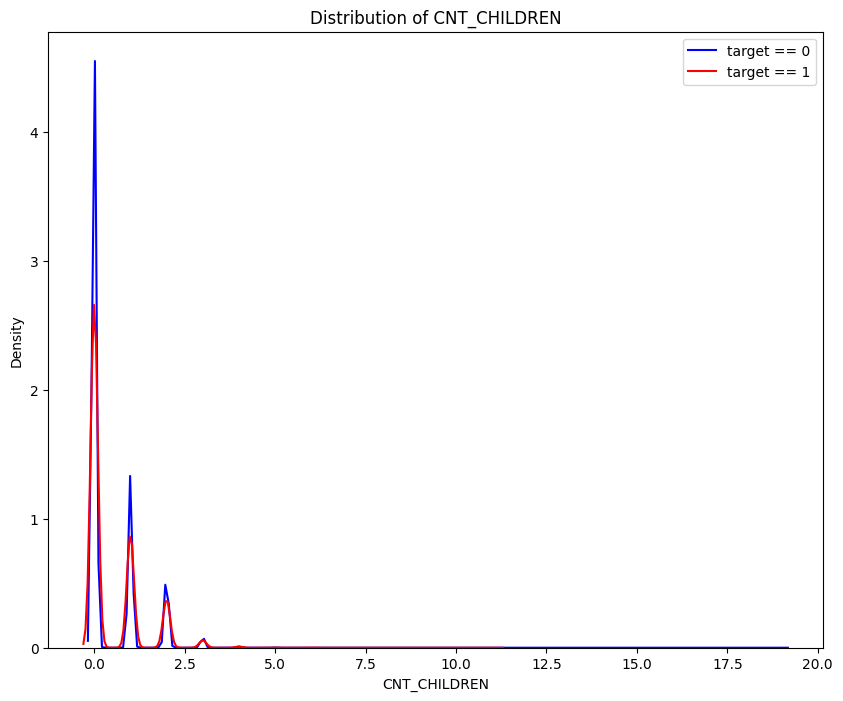

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_clean_missing.loc[(train_clean_missing['TARGET'] == 0), 'CNT_CHILDREN'], label = 'target == 0', color='blue')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_clean_missing.loc[(train_clean_missing['TARGET'] == 1), 'CNT_CHILDREN'], label = 'target == 1', color='red')

# Labeling of plot
plt.xlabel('CNT_CHILDREN'); plt.ylabel('Density'); plt.title('Distribution of CNT_CHILDREN')

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right')

plt.show()

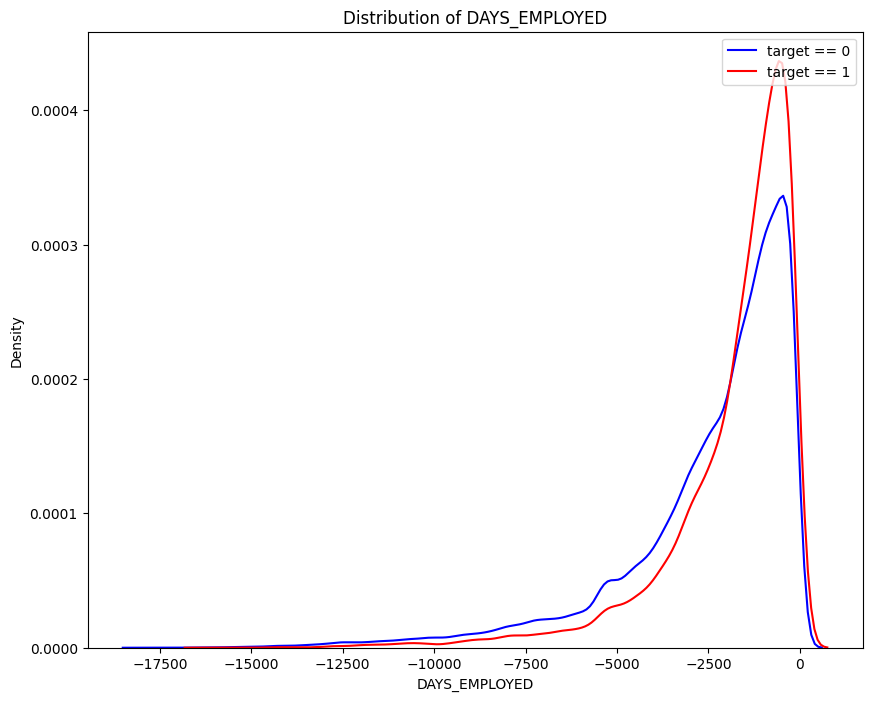

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_clean_missing.loc[train_clean_missing['TARGET'] == 0, 'DAYS_EMPLOYED'], label = 'target == 0', color='blue')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_clean_missing.loc[train_clean_missing['TARGET'] == 1, 'DAYS_EMPLOYED'], label = 'target == 1', color='red')

# Labeling of plot
plt.xlabel('DAYS_EMPLOYED'); plt.ylabel('Density'); plt.title('Distribution of DAYS_EMPLOYED')

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right')

plt.show()

## Feature Engineering

In [ ]:
# train data
train_clean_missing['DAYS_EMPLOYED_PERC'] = train_clean_missing['DAYS_EMPLOYED'] / train_clean_missing['DAYS_BIRTH']
train_clean_missing['INCOME_CREDIT_PERC'] = train_clean_missing['AMT_INCOME_TOTAL'] / train_clean_missing['AMT_CREDIT']
train_clean_missing['INCOME_PER_PERSON'] = train_clean_missing['AMT_INCOME_TOTAL'] / train_clean_missing['CNT_FAM_MEMBERS']
train_clean_missing['ANNUITY_INCOME_PERC'] = train_clean_missing['AMT_ANNUITY'] / train_clean_missing['AMT_INCOME_TOTAL']
train_clean_missing['PAYMENT_RATE'] = train_clean_missing['AMT_ANNUITY'] / train_clean_missing['AMT_CREDIT']

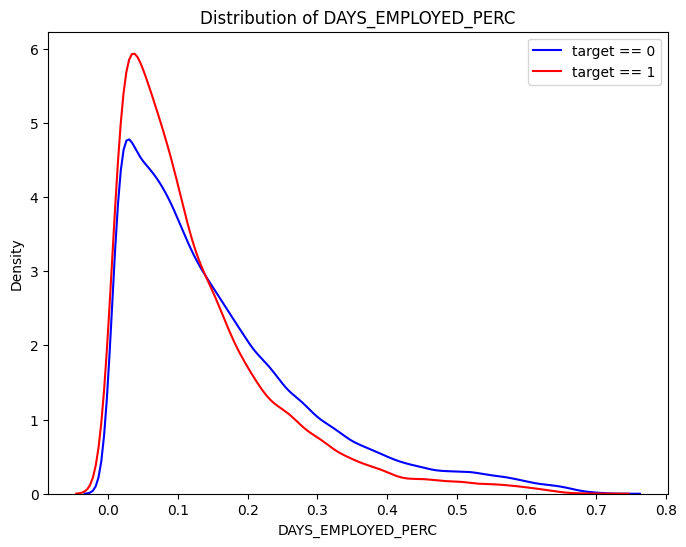

In [ ]:
plt.figure(figsize = (8, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_clean_missing.loc[train_clean_missing['TARGET'] == 0, 'DAYS_EMPLOYED_PERC'], label = 'target == 0', color='blue')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_clean_missing.loc[train_clean_missing['TARGET'] == 1, 'DAYS_EMPLOYED_PERC'], label = 'target == 1', color='red')

# Labeling of plot
plt.xlabel('DAYS_EMPLOYED_PERC'); plt.ylabel('Density'); plt.title('Distribution of DAYS_EMPLOYED_PERC')

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right')

plt.show()

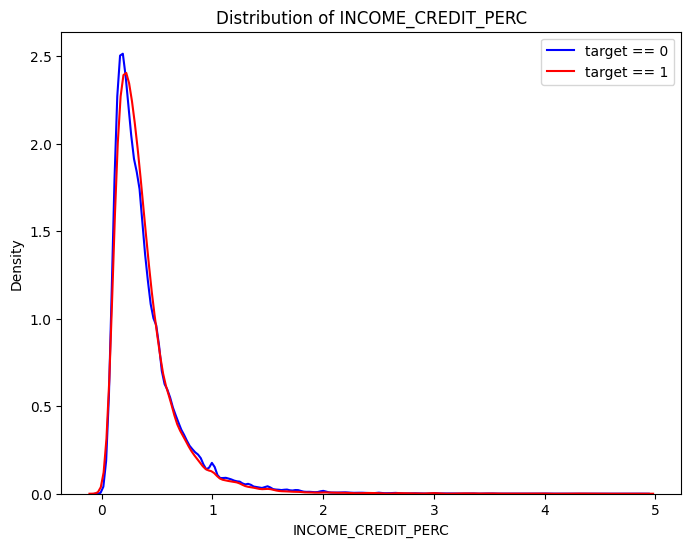

In [ ]:
plt.figure(figsize = (8, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_clean_missing.loc[(train_clean_missing['TARGET'] == 0) & (train_clean_missing['INCOME_CREDIT_PERC'] < 5), 'INCOME_CREDIT_PERC'], label = 'target == 0', color='blue')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_clean_missing.loc[(train_clean_missing['TARGET'] == 1) & (train_clean_missing['INCOME_CREDIT_PERC'] < 5), 'INCOME_CREDIT_PERC'], label = 'target == 1', color='red')

# Labeling of plot
plt.xlabel('INCOME_CREDIT_PERC'); plt.ylabel('Density'); plt.title('Distribution of INCOME_CREDIT_PERC')

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right')

plt.show()

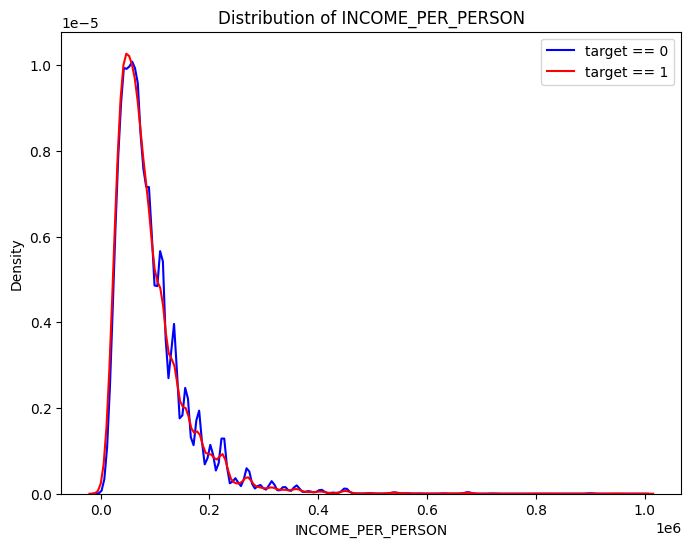

In [ ]:
plt.figure(figsize = (8, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_clean_missing.loc[(train_clean_missing['TARGET'] == 0) & (train_clean_missing['INCOME_PER_PERSON'] < 1000000), 'INCOME_PER_PERSON'], label = 'target == 0', color='blue')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_clean_missing.loc[(train_clean_missing['TARGET'] == 1) & (train_clean_missing['INCOME_PER_PERSON'] < 1000000), 'INCOME_PER_PERSON'], label = 'target == 1', color='red')

# Labeling of plot
plt.xlabel('INCOME_PER_PERSON'); plt.ylabel('Density'); plt.title('Distribution of INCOME_PER_PERSON')

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right')

plt.show()

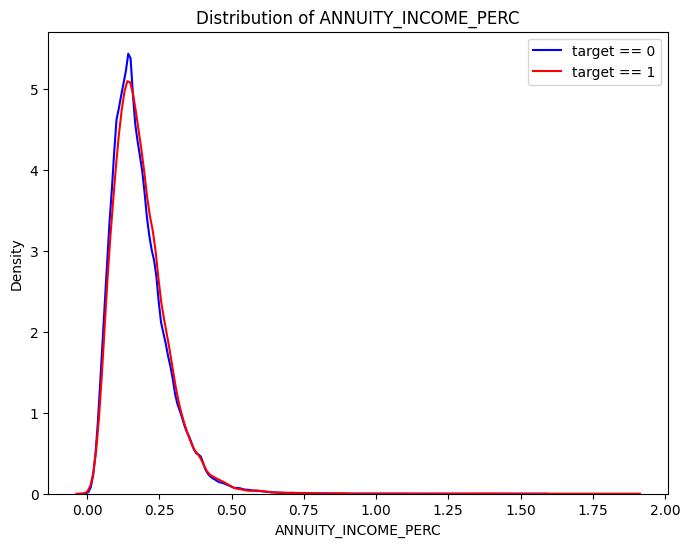

In [ ]:
plt.figure(figsize = (8, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_clean_missing.loc[train_clean_missing['TARGET'] == 0, 'ANNUITY_INCOME_PERC'], label = 'target == 0', color='blue')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_clean_missing.loc[train_clean_missing['TARGET'] == 1, 'ANNUITY_INCOME_PERC'], label = 'target == 1', color='red')

# Labeling of plot
plt.xlabel('ANNUITY_INCOME_PERC'); plt.ylabel('Density'); plt.title('Distribution of ANNUITY_INCOME_PERC')

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right')

plt.show()

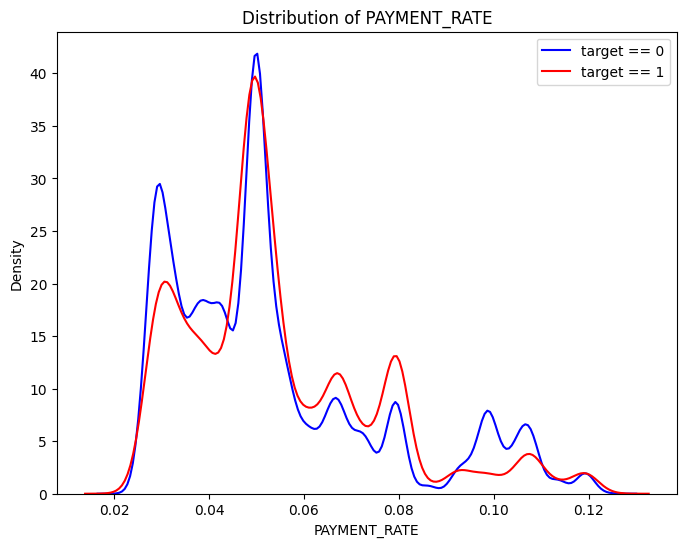

In [ ]:
plt.figure(figsize = (8, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_clean_missing.loc[train_clean_missing['TARGET'] == 0, 'PAYMENT_RATE'], label = 'target == 0', color='blue')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_clean_missing.loc[train_clean_missing['TARGET'] == 1, 'PAYMENT_RATE'], label = 'target == 1', color='red')

# Labeling of plot
plt.xlabel('PAYMENT_RATE'); plt.ylabel('Density'); plt.title('Distribution of PAYMENT_RATE')

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right')

plt.show()

In [ ]:
# teat data
test_clean_missing['DAYS_EMPLOYED_PERC'] = test_clean_missing['DAYS_EMPLOYED'] / test_clean_missing['DAYS_BIRTH']
test_clean_missing['INCOME_CREDIT_PERC'] = test_clean_missing['AMT_INCOME_TOTAL'] / test_clean_missing['AMT_CREDIT']
test_clean_missing['INCOME_PER_PERSON'] = test_clean_missing['AMT_INCOME_TOTAL'] / test_clean_missing['CNT_FAM_MEMBERS']
test_clean_missing['ANNUITY_INCOME_PERC'] = test_clean_missing['AMT_ANNUITY'] / test_clean_missing['AMT_INCOME_TOTAL']
test_clean_missing['PAYMENT_RATE'] = test_clean_missing['AMT_ANNUITY'] / test_clean_missing['AMT_CREDIT']

In [ ]:
# previous data
previous_clean_missing['APP_CREDIT_PERC'] = previous_clean_missing['AMT_APPLICATION'] / previous_clean_missing['AMT_CREDIT']

In [ ]:
# installments data
installments_clean_missing['PAYMENT_PERC'] = installments_clean_missing['AMT_PAYMENT'] / installments_clean_missing['AMT_INSTALMENT']
installments_clean_missing['PAYMENT_DIFF'] = installments_clean_missing['AMT_INSTALMENT'] - installments_clean_missing['AMT_PAYMENT']

# Days past due and days before due (no negative values)
installments_clean_missing['DPD'] = installments_clean_missing['DAYS_ENTRY_PAYMENT'] - installments_clean_missing['DAYS_INSTALMENT']
installments_clean_missing['DBD'] = installments_clean_missing['DAYS_INSTALMENT'] - installments_clean_missing['DAYS_ENTRY_PAYMENT']
installments_clean_missing['DPD'] = installments_clean_missing['DPD'].apply(lambda x: x if x > 0 else 0)
installments_clean_missing['DBD'] = installments_clean_missing['DBD'].apply(lambda x: x if x > 0 else 0)

### Encoding Categorical Variables

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train_clean_missing:
    if train_clean_missing[col].dtype == 'category':
        # If two or fewer unique categories
        if len(list(train_clean_missing[col].unique())) <= 2:
            # Train on the training data
            le.fit(train_clean_missing[col])
            # Transform both training and testing data
            train_clean_missing[col] = le.transform(train_clean_missing[col])
            test_clean_missing[col] = le.transform(test_clean_missing[col])

            # Keep track of how many columns were label encoded
            le_count += 1

print(f'{le_count} columns were label encoded.')

3 columns were label encoded.


In [ ]:
# One-Hot Encoding
train_clean_missing = pd.get_dummies(train_clean_missing)
test_clean_missing = pd.get_dummies(test_clean_missing)

print('Training Features shape: ', train_clean_missing.shape)
print('Testing Features shape: ', test_clean_missing.shape)

Training Features shape:  (307511, 249)
Testing Features shape:  (48744, 245)


In [ ]:
train_labels = train_clean_missing['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
train_clean_missing, test_clean_missing = train_clean_missing.align(test_clean_missing, join = 'inner', axis = 1)

# Add the target back in
train_clean_missing['TARGET'] = train_labels

print('Training Features shape: ', train_clean_missing.shape)
print('Testing Features shape: ', test_clean_missing.shape)

Training Features shape:  (307511, 246)
Testing Features shape:  (48744, 245)


In [ ]:
# Define aggregation methods for bureau_balance
bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}

# One-Hot Encoding
bureau_balance_clean_missing = pd.get_dummies(bureau_balance_clean_missing, dummy_na=False)

# Get categorical variables after One-Hot Encoding
bb_cat = [col for col in bureau_balance_clean_missing.columns if bureau_balance_clean_missing[col].dtype == 'uint8']

# Compute the 'mean' aggregation for categorical variables
for col in bb_cat:
    bb_aggregations[col] = ['mean']

# Aggregate based on 'SK_ID_BUREAU'
bb_agg = bureau_balance_clean_missing.groupby('SK_ID_BUREAU').agg(bb_aggregations)

# Flatten multi-level column names
bb_agg.columns = ['_'.join(map(str, col)).strip() if isinstance(col, tuple) else col for col in bb_agg.columns]

# Ensure 'SK_ID_BUREAU' is retained as a column
bb_agg.reset_index(inplace=True)

# Merge the aggregated bureau_balance data with bureau_clean_missing
bureau_clean_missing = bureau_clean_missing.merge(bb_agg, how='left', on='SK_ID_BUREAU')

# Calculate the number of previous loans for each customer
previous_loan_counts = bureau_clean_missing.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count()
previous_loan_counts.rename(columns={'SK_ID_BUREAU': 'previous_loan_counts'}, inplace=True)

# One-Hot Encoding
bureau_clean_missing = pd.get_dummies(bureau_clean_missing, dummy_na=False)

# Get categorical variables after One-Hot Encoding
bureau_cat = [col for col in bureau_clean_missing.columns if bureau_clean_missing[col].dtype == 'uint8']

# Define aggregation methods for numerical features
num_aggregations_b = {
    'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
    'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
    'DAYS_CREDIT_UPDATE': ['mean'],
    'CREDIT_DAY_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': ['mean'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['mean'],
    'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
    'AMT_ANNUITY': ['max', 'mean'],
    'CNT_CREDIT_PROLONG': ['sum'],
    'MONTHS_BALANCE_min': ['min'],
    'MONTHS_BALANCE_max': ['max'],
    'MONTHS_BALANCE_size': ['mean', 'sum']
}

# Define mean aggregation for categorical variables
cat_aggregations_b = {col: ['mean'] for col in bureau_cat}

# Combine numerical and categorical aggregation methods
all_aggregations_b = {**num_aggregations_b, **cat_aggregations_b}

# Perform aggregation
bureau_agg = bureau_clean_missing.drop(columns=['SK_ID_BUREAU']).groupby('SK_ID_CURR', as_index=False).agg(all_aggregations_b)

# Flatten multi-level column names
bureau_agg.columns = ['_'.join(map(str, col)).strip() if isinstance(col, tuple) else col for col in bureau_agg.columns]

# Rename 'SK_ID_CURR_' to 'SK_ID_CURR'
bureau_agg.rename(columns={'SK_ID_CURR_': 'SK_ID_CURR'}, inplace=True)

# Display the results
bureau_agg.head()

,SK_ID_CURR,DAYS_CREDIT_min,DAYS_CREDIT_max,DAYS_CREDIT_mean,DAYS_CREDIT_var,DAYS_CREDIT_ENDDATE_min,DAYS_CREDIT_ENDDATE_max,DAYS_CREDIT_ENDDATE_mean,DAYS_CREDIT_UPDATE_mean,CREDIT_DAY_OVERDUE_max,...,AMT_CREDIT_SUM_OVERDUE_mean,AMT_CREDIT_SUM_LIMIT_mean,AMT_CREDIT_SUM_LIMIT_sum,AMT_ANNUITY_max,AMT_ANNUITY_mean,CNT_CREDIT_PROLONG_sum,MONTHS_BALANCE_min_min,MONTHS_BALANCE_max_max,MONTHS_BALANCE_size_mean,MONTHS_BALANCE_size_sum
0,100001,-1572,-49,-735.000000,240043.666667,-1329.0,1778.0,82.428574,-93.142857,0,...,0.0,0.000000,0.000000,10822.5,3545.357178,0,-51.0,0.0,24.571429,172.0
1,100002,-1437,-103,-874.000000,186150.000000,-1072.0,780.0,-349.000000,-499.875000,0,...,0.0,7997.141113,31988.564453,0.0,0.000000,0,-47.0,0.0,13.750000,110.0
2,100003,-2586,-606,-1400.750000,827783.583333,-2434.0,1216.0,-544.500000,-816.000000,0,...,0.0,202500.000000,810000.000000,NaN,NaN,0,NaN,NaN,NaN,0.0
3,100004,-1326,-408,-867.000000,421362.000000,-595.0,-382.0,-488.500000,-532.000000,0,...,0.0,0.000000,0.000000,NaN,NaN,0,NaN,NaN,NaN,0.0
4,100005,-373,-62,-190.666667,26340.333333,-128.0,1324.0,439.333344,-54.333333,0,...,0.0,0.000000,0.000000,4261.5,1420.500000,0,-12.0,0.0,7.000000,21.0


In [ ]:
# One-Hot Encoding
previous_clean_missing = pd.get_dummies(previous_clean_missing, dummy_na=False)

# Get categorical variables after One-Hot Encoding
previous_cat = [col for col in previous_clean_missing.columns if previous_clean_missing[col].dtype == 'uint8']

# Define aggregation methods for numerical features
num_aggregations_p = {
    'AMT_ANNUITY': ['min', 'max', 'mean'],
    'AMT_APPLICATION': ['min', 'max', 'mean'],
    'AMT_CREDIT': ['min', 'max', 'mean'],
    'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
    'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
    'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
    'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'DAYS_DECISION': ['min', 'max', 'mean'],
    'CNT_PAYMENT': ['mean', 'sum'],}

# Define mean aggregation for categorical variables
cat_aggregations_p = {col: ['mean'] for col in previous_cat}

# Combine numerical and categorical aggregation methods
all_aggregations_p = {**num_aggregations_p, **cat_aggregations_p}

# Perform aggregation
previous_agg = previous_clean_missing.drop(columns=['SK_ID_PREV']).groupby('SK_ID_CURR', as_index=False).agg(all_aggregations_p)

# Flatten multi-level column names
previous_agg.columns = ['_'.join(map(str, col)).strip() if isinstance(col, tuple) else col for col in previous_agg.columns]

# Rename 'SK_ID_CURR_' to 'SK_ID_CURR'
previous_agg.rename(columns={'SK_ID_CURR_': 'SK_ID_CURR'}, inplace=True)

# Display the results
previous_agg.head()

,SK_ID_CURR,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_APPLICATION_mean,AMT_CREDIT_min,AMT_CREDIT_max,AMT_CREDIT_mean,...,HOUR_APPR_PROCESS_START_max,HOUR_APPR_PROCESS_START_mean,RATE_DOWN_PAYMENT_min,RATE_DOWN_PAYMENT_max,RATE_DOWN_PAYMENT_mean,DAYS_DECISION_min,DAYS_DECISION_max,DAYS_DECISION_mean,CNT_PAYMENT_mean,CNT_PAYMENT_sum
0,100001,3951.000000,3951.000000,3951.000000,24835.5,24835.5,24835.50,23787.0,23787.0,23787.00,...,13,13.000000,0.104326,0.104326,0.104326,-1740,-1740,-1740.0,8.0,8.0
1,100002,9251.775391,9251.775391,9251.775391,179055.0,179055.0,179055.00,179055.0,179055.0,179055.00,...,9,9.000000,0.000000,0.000000,0.000000,-606,-606,-606.0,24.0,24.0
2,100003,6737.310059,98356.992188,56553.988281,68809.5,900000.0,435436.50,68053.5,1035882.0,484191.00,...,17,14.666667,0.000000,0.100061,0.050030,-2341,-746,-1305.0,10.0,30.0
3,100004,5357.250000,5357.250000,5357.250000,24282.0,24282.0,24282.00,20106.0,20106.0,20106.00,...,5,5.000000,0.212008,0.212008,0.212008,-815,-815,-815.0,4.0,4.0
4,100005,4813.200195,4813.200195,4813.200195,0.0,44617.5,22308.75,0.0,40153.5,20076.75,...,11,10.500000,0.108964,0.108964,0.108964,-757,-315,-536.0,12.0,12.0


In [ ]:
# One-Hot Encoding
cash_clean_missing = pd.get_dummies(cash_clean_missing, dummy_na=False)

# Get categorical variables after One-Hot Encoding
cash_cat = [col for col in cash_clean_missing.columns if cash_clean_missing[col].dtype == 'uint8']

# Define aggregation methods for numerical features
num_aggregations_c = {
    'MONTHS_BALANCE': ['max', 'mean', 'size'],
    'SK_DPD': ['max', 'mean'],
    'SK_DPD_DEF': ['max', 'mean']}

# Define mean aggregation for categorical variables
cat_aggregations_c = {col: ['mean'] for col in cash_cat}

# Combine numerical and categorical aggregation methods
all_aggregations_c = {**num_aggregations_c, **cat_aggregations_c}

# Perform aggregation
cash_agg = cash_clean_missing.drop(columns=['SK_ID_PREV']).groupby('SK_ID_CURR', as_index=False).agg(all_aggregations_c)

# Flatten multi-level column names
cash_agg.columns = ['_'.join(map(str, col)).strip() if isinstance(col, tuple) else col for col in cash_agg.columns]

# Rename 'SK_ID_CURR_' to 'SK_ID_CURR'
cash_agg.rename(columns={'SK_ID_CURR_': 'SK_ID_CURR'}, inplace=True)

# Display the results
cash_agg.head()

,SK_ID_CURR,MONTHS_BALANCE_max,MONTHS_BALANCE_mean,MONTHS_BALANCE_size,SK_DPD_max,SK_DPD_mean,SK_DPD_DEF_max,SK_DPD_DEF_mean
0,100001,-53,-72.555556,9,7,0.777778,7,0.777778
1,100002,-1,-10.000000,19,0,0.000000,0,0.000000
2,100003,-18,-43.785714,28,0,0.000000,0,0.000000
3,100004,-24,-25.500000,4,0,0.000000,0,0.000000
4,100005,-15,-20.000000,11,0,0.000000,0,0.000000


In [ ]:
# One-Hot Encoding
installments_clean_missing = pd.get_dummies(installments_clean_missing, dummy_na=False)

# Get categorical variables after One-Hot Encoding
installments_cat = [col for col in installments_clean_missing.columns if installments_clean_missing[col].dtype == 'uint8']

# Define aggregation methods for numerical features
num_aggregations_i = {
    'NUM_INSTALMENT_VERSION': ['nunique'],
    'DPD': ['max', 'mean', 'sum'],
    'DBD': ['max', 'mean', 'sum'],
    'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
    'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
    'AMT_INSTALMENT': ['max', 'mean', 'sum'],
    'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
    'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']}

# Define mean aggregation for categorical variables
cat_aggregations_i = {col: ['mean'] for col in installments_cat}

# Combine numerical and categorical aggregation methods
all_aggregations_i = {**num_aggregations_i, **cat_aggregations_i}

# Perform aggregation
installments_agg = installments_clean_missing.drop(columns=['SK_ID_PREV']).groupby('SK_ID_CURR', as_index=False).agg(all_aggregations_i)

# Flatten multi-level column names
installments_agg.columns = ['_'.join(map(str, col)).strip() if isinstance(col, tuple) else col for col in installments_agg.columns]

# Rename 'SK_ID_CURR_' to 'SK_ID_CURR'
installments_agg.rename(columns={'SK_ID_CURR_': 'SK_ID_CURR'}, inplace=True)

# Display the results
installments_agg.head()

,SK_ID_CURR,NUM_INSTALMENT_VERSION_nunique,DPD_max,DPD_mean,DPD_sum,DBD_max,DBD_mean,DBD_sum,PAYMENT_PERC_max,PAYMENT_PERC_mean,...,AMT_INSTALMENT_max,AMT_INSTALMENT_mean,AMT_INSTALMENT_sum,AMT_PAYMENT_min,AMT_PAYMENT_max,AMT_PAYMENT_mean,AMT_PAYMENT_sum,DAYS_ENTRY_PAYMENT_max,DAYS_ENTRY_PAYMENT_mean,DAYS_ENTRY_PAYMENT_sum
0,100001,2,11.0,1.571429,11.0,36.0,8.857143,62.0,1.0,1.0,...,17397.900391,5885.132324,4.119593e+04,3951.000000,17397.900391,5885.132324,4.119593e+04,-1628.0,-2195.000000,-15365.0
1,100002,2,0.0,0.000000,0.0,31.0,20.421053,388.0,1.0,1.0,...,53093.746094,11559.247070,2.196257e+05,9251.775391,53093.746094,11559.247070,2.196257e+05,-49.0,-315.421051,-5993.0
2,100003,2,0.0,0.000000,0.0,14.0,7.160000,179.0,1.0,1.0,...,560835.375000,64754.585938,1.618865e+06,6662.970215,560835.375000,64754.585938,1.618865e+06,-544.0,-1385.319946,-34633.0
3,100004,2,0.0,0.000000,0.0,11.0,7.666667,23.0,1.0,1.0,...,10573.964844,7096.154785,2.128846e+04,5357.250000,10573.964844,7096.154785,2.128846e+04,-727.0,-761.666687,-2285.0
4,100005,2,1.0,0.111111,1.0,37.0,23.666667,213.0,1.0,1.0,...,17656.244141,6240.205078,5.616184e+04,4813.200195,17656.244141,6240.205078,5.616184e+04,-470.0,-609.555542,-5486.0


In [ ]:
# One-Hot Encoding
credit_clean_missing = pd.get_dummies(credit_clean_missing, dummy_na=False)

# Perform aggregation
credit_agg = credit_clean_missing.drop(columns=['SK_ID_PREV']).groupby('SK_ID_CURR', as_index=False).agg(['min', 'max', 'mean', 'sum', 'var'])

# Flatten multi-level column names
credit_agg.columns = ['_'.join(map(str, col)).strip() if isinstance(col, tuple) else col for col in credit_agg.columns]

# Rename 'SK_ID_CURR_' to 'SK_ID_CURR'
credit_agg.rename(columns={'SK_ID_CURR_': 'SK_ID_CURR'}, inplace=True)

# Display the results
credit_agg.head()

,SK_ID_CURR,MONTHS_BALANCE_min,MONTHS_BALANCE_max,MONTHS_BALANCE_mean,MONTHS_BALANCE_sum,MONTHS_BALANCE_var,AMT_BALANCE_min,AMT_BALANCE_max,AMT_BALANCE_mean,AMT_BALANCE_sum,...,NAME_CONTRACT_STATUS_Sent proposal_min,NAME_CONTRACT_STATUS_Sent proposal_max,NAME_CONTRACT_STATUS_Sent proposal_mean,NAME_CONTRACT_STATUS_Sent proposal_sum,NAME_CONTRACT_STATUS_Sent proposal_var,NAME_CONTRACT_STATUS_Signed_min,NAME_CONTRACT_STATUS_Signed_max,NAME_CONTRACT_STATUS_Signed_mean,NAME_CONTRACT_STATUS_Signed_sum,NAME_CONTRACT_STATUS_Signed_var
0,100006,-6,-1,-3.5,-21,3.5,0.0,0.00000,0.000000,0.00,...,False,False,0.0,0,0.0,False,False,0.0,0,0.0
1,100011,-75,-2,-38.5,-2849,462.5,0.0,189000.00000,54482.113281,4031676.25,...,False,False,0.0,0,0.0,False,False,0.0,0,0.0
2,100013,-96,-1,-48.5,-4656,776.0,0.0,161420.21875,18159.919922,1743352.25,...,False,False,0.0,0,0.0,False,False,0.0,0,0.0
3,100021,-18,-2,-10.0,-170,25.5,0.0,0.00000,0.000000,0.00,...,False,False,0.0,0,0.0,False,False,0.0,0,0.0
4,100023,-11,-4,-7.5,-60,6.0,0.0,0.00000,0.000000,0.00,...,False,False,0.0,0,0.0,False,False,0.0,0,0.0


### Merge other data set into training and test set

In [ ]:
# Memory management
import gc

train_for_lgb = train_clean_missing.copy()
test_for_lgb = test_clean_missing.copy()

# Merge in the bureau and bureau_balance information
train_for_lgb = train_for_lgb.merge(bureau_agg, on ='SK_ID_CURR', how = 'left')
test_for_lgb = test_for_lgb.merge(bureau_agg, on ='SK_ID_CURR', how = 'left')

# Merge in the previous information
train_for_lgb = train_for_lgb.merge(previous_agg, on ='SK_ID_CURR', how = 'left')
test_for_lgb = test_for_lgb.merge(previous_agg, on ='SK_ID_CURR', how = 'left')

# Merge in the cash information
train_for_lgb = train_for_lgb.merge(cash_agg, on ='SK_ID_CURR', how = 'left')
test_for_lgb = test_for_lgb.merge(cash_agg, on ='SK_ID_CURR', how = 'left')

# Merge in the installments information
train_for_lgb = train_for_lgb.merge(installments_agg, on ='SK_ID_CURR', how = 'left')
test_for_lgb = test_for_lgb.merge(installments_agg, on ='SK_ID_CURR', how = 'left')

# Merge in the installments information
train_for_lgb = train_for_lgb.merge(credit_agg, on ='SK_ID_CURR', how = 'left')
test_for_lgb = test_for_lgb.merge(credit_agg, on ='SK_ID_CURR', how = 'left')

print('train_for_lgb shape', train_for_lgb.shape)
print('test_for_lgb', test_for_lgb.shape)

# Remove variables to free memory
gc.enable()
del bureau_agg, previous_agg, cash_agg, installments_agg, credit_agg
gc.collect()

train_for_lgb shape (307511, 470)
test_for_lgb (48744, 469)


21

### Correlation

In [ ]:
# Filter columns with variability greater than 1
valid_columns = [col for col in train_for_lgb.columns if train_for_lgb[col].nunique(dropna=True) > 1]

# Calculate correlation
correlations = train_for_lgb[valid_columns].corr()['TARGET'].drop('TARGET').sort_values()

# Display the 15 most relevant features
print('Most Positive Correlations:\n', correlations.tail(15)[::-1])

# Display the 15 most negatively relevant features
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 CNT_DRAWINGS_ATM_CURRENT_mean    0.107692
CNT_DRAWINGS_CURRENT_max         0.101389
DAYS_CREDIT_mean                 0.089729
AMT_BALANCE_mean                 0.087177
AMT_TOTAL_RECEIVABLE_mean        0.086490
AMT_RECIVABLE_mean               0.086478
AMT_RECEIVABLE_PRINCIPAL_mean    0.086062
CNT_DRAWINGS_CURRENT_mean        0.082520
DAYS_BIRTH                       0.078239
DAYS_CREDIT_min                  0.075248
DAYS_EMPLOYED                    0.074958
AMT_INST_MIN_REGULARITY_mean     0.073724
MONTHS_BALANCE_min_min           0.073225
CNT_DRAWINGS_POS_CURRENT_max     0.068942
DAYS_CREDIT_UPDATE_mean          0.068927
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
MONTHS_BALANCE_size_mean               -0.080193
DAYS_EMPLOYED_PERC                     -0.067955
NAME_CONTRACT_STATUS_Active_sum      

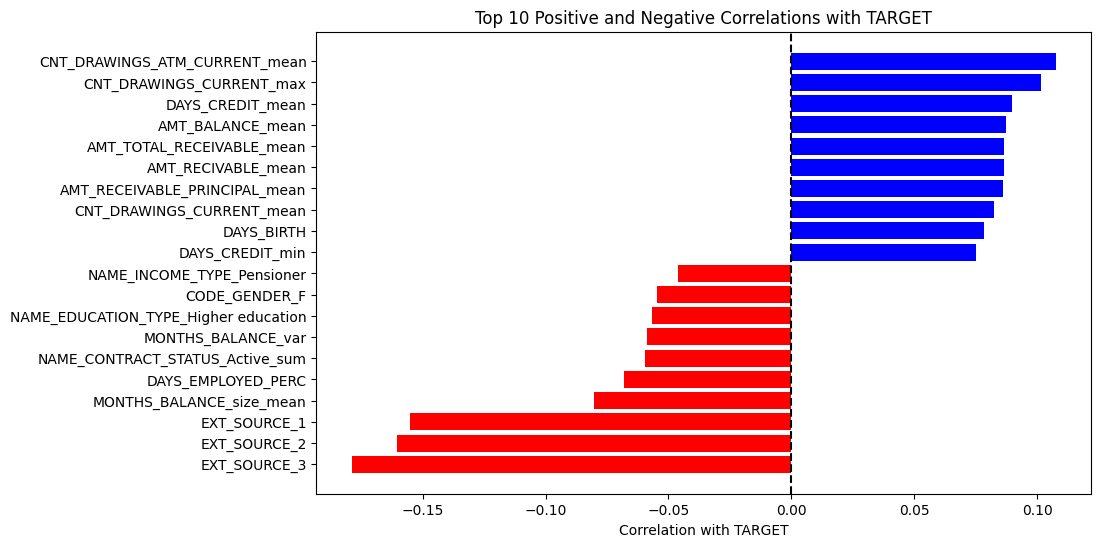

In [ ]:
# Display the 10 most relevant features
most_positive = correlations.tail(10)

# Display the 10 most negatively relevant features
most_negative = correlations.head(10)

# Merge data
top_features = pd.concat([most_negative, most_positive])

# Plotting Bar Charts
plt.figure(figsize=(10, 6))
plt.barh(top_features.index, top_features.values, color=['red'] * 10 + ['blue'] * 10)
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel('Correlation with TARGET')
plt.title('Top 10 Positive and Negative Correlations with TARGET')
plt.show()

In [ ]:
# Find the feature whose relevance is close to 0 (e.g. less than 0.005)
low_correlation_features = correlations[correlations.abs() < 0.005].index.tolist()

print(f'與 TARGET 幾乎無關的特徵（|correlation| < 0.01）數量：{len(low_correlation_features)}')
print(low_correlation_features)

與 TARGET 幾乎無關的特徵（|correlation| < 0.01）數量：134
['AMT_DRAWINGS_POS_CURRENT_min', 'AMT_PAYMENT_TOTAL_CURRENT_sum', 'FLAG_DOCUMENT_9', 'MONTHS_BALANCE_max_x', 'FLAG_DOCUMENT_11', 'AMT_DRAWINGS_POS_CURRENT_mean', 'AMT_INCOME_TOTAL', 'ORGANIZATION_TYPE_Services', 'ORGANIZATION_TYPE_Insurance', 'AMT_DRAWINGS_POS_CURRENT_sum', 'ORGANIZATION_TYPE_Other', 'SK_DPD_sum', 'ORGANIZATION_TYPE_Hotel', 'SK_DPD_var', 'FLAG_DOCUMENT_17', 'ORGANIZATION_TYPE_Transport: type 1', 'ORGANIZATION_TYPE_Culture', 'SK_DPD_mean_y', 'NONLIVINGAPARTMENTS_AVG', 'ORGANIZATION_TYPE_Trade: type 2', 'ORGANIZATION_TYPE_Electricity', 'CNT_DRAWINGS_OTHER_CURRENT_min', 'NONLIVINGAPARTMENTS_MEDI', 'AMT_DRAWINGS_OTHER_CURRENT_min', 'FLAG_DOCUMENT_4', 'FONDKAPREMONT_MODE_not specified', 'NAME_TYPE_SUITE_Children', 'OCCUPATION_TYPE_HR staff', 'ORGANIZATION_TYPE_Trade: type 4', 'OCCUPATION_TYPE_Secretaries', 'OCCUPATION_TYPE_IT staff', 'WEEKDAY_APPR_PROCESS_START_SATURDAY', 'NAME_CONTRACT_STATUS_Approved_var', 'NAME_CONTRACT_STATUS

In [ ]:
def plot_top_corr_heatmap(df, threshold=0.8, top_n=20):
    """ Plot a correlation heatmap showing only the top_n sets of highly correlated features """
    corrs = df.corr()

    # Obtaining highly correlated pairs of variables
    corrs_unstacked = corrs.abs().unstack().sort_values(ascending=False)
    corrs_unstacked = corrs_unstacked[corrs_unstacked < 1]

    # Take the first top_n group of features
    top_corr_pairs = corrs_unstacked.head(top_n).index
    top_features = list(set([col for pair in top_corr_pairs for col in pair]))

    # Filter top_features to draw the heatmap.
    corrs_subset = df[top_features].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corrs_subset, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

    plt.title(f'Top {top_n} Feature Correlations Heatmap (Threshold > {threshold})', fontsize=14)
    plt.show()

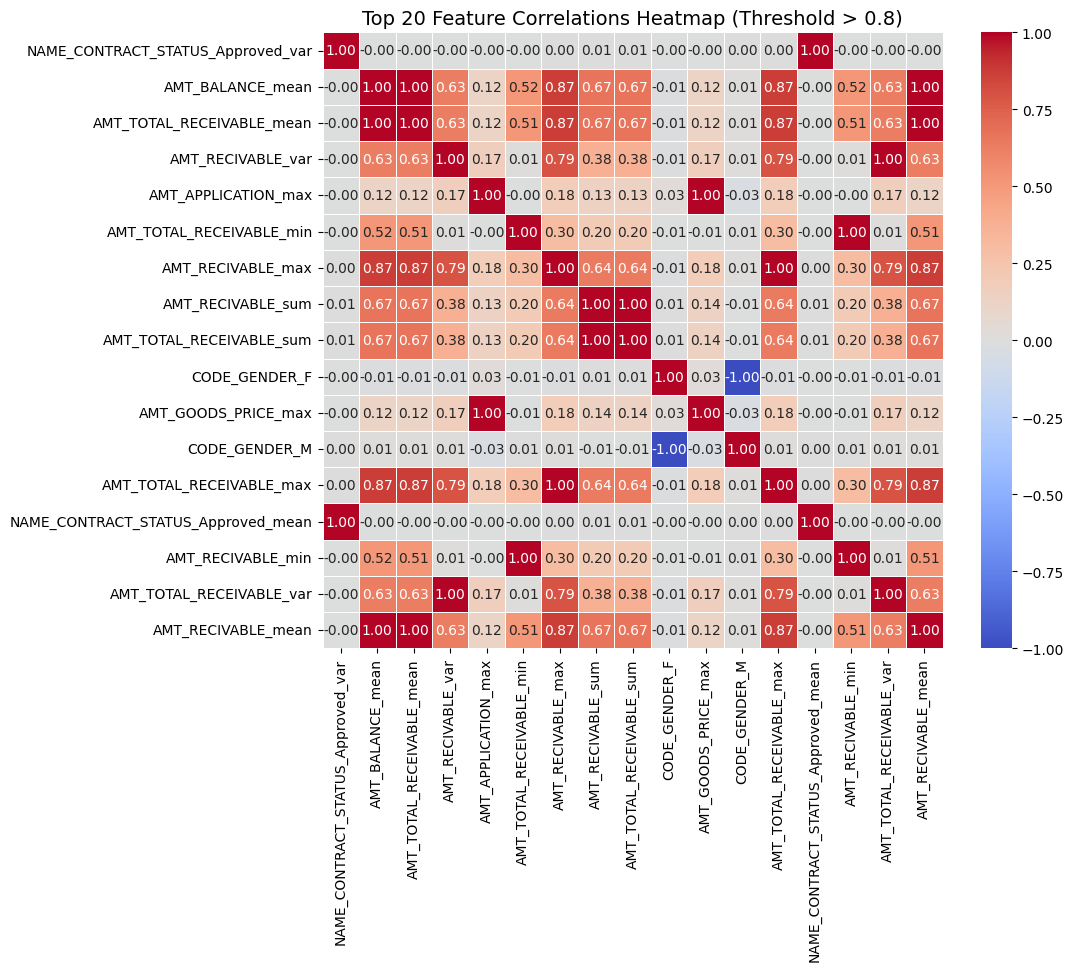

In [ ]:
plot_top_corr_heatmap(train_for_lgb, threshold=0.8, top_n=20)

### Collinear Variables

In [ ]:
def corrs_table(df, threshold = 0.8):
    # Calculate all correlations in dataframe
    corrs = df.corr()

    # Empty dictionary to hold correlated variables
    above_threshold_vars = {}

    # For each column, record the variables that are above the threshold
    for col in corrs:
        above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

    # Track columns to remove and columns already examined
    cols_to_remove = []
    cols_seen = []
    cols_to_remove_pair = []

    # Iterate through columns and correlated columns
    for key, value in above_threshold_vars.items():
        # Keep track of columns already examined
        cols_seen.append(key)
        for x in value:
            if x == key:
                next
            else:
                # Only want to remove one in a pair
                if x not in cols_seen:
                    cols_to_remove.append(x)
                    cols_to_remove_pair.append(key)

    cols_to_remove = list(set(cols_to_remove))
    print('Number of columns to remove: ', len(cols_to_remove))

    return cols_to_remove

In [ ]:
cols_to_remove = corrs_table(train_for_lgb)

Number of columns to remove:  137


In [ ]:
train_for_lgb = train_for_lgb.drop(columns = cols_to_remove)
test_for_lgb = test_for_lgb.drop(columns = cols_to_remove)

print('Training Corrs Removed Shape: ', train_for_lgb.shape)
print('Testing Corrs Removed Shape: ', test_for_lgb.shape)

Training Corrs Removed Shape:  (307511, 333)
Testing Corrs Removed Shape:  (48744, 332)


In [ ]:
train_for_lgb = convert_types(train_for_lgb, print_info=True)
test_for_lgb = convert_types(test_for_lgb, print_info=True)

Original Memory Usage: 0.36 gb
New Memory Usage: 0.27 gb
Original Memory Usage: 0.06 gb
New Memory Usage: 0.04 gb


In [ ]:
train_for_lgb.shape

(307511, 336)

In [ ]:
test_for_lgb.shape

(48744, 335)

## Modeling

### LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [ ]:
def lgb_feature_selection(train, test, n_folds=5):

    train.columns = train.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)
    test.columns = test.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    labels = train['TARGET']

    train = train.drop(columns=['SK_ID_CURR', 'TARGET'])
    test = test.drop(columns=['SK_ID_CURR'])

    cat_features = [col for col in train.columns if train[col].dtype == 'object']
    for col in cat_features:
        train[col] = train[col].astype('category')
        test[col] = test[col].astype('category')

    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    feature_importance_values = np.zeros(len(train.columns))
    out_of_fold = np.zeros(train.shape[0])
    model = None

    for train_idx, valid_idx in k_fold.split(train):
        X_train, y_train = train.iloc[train_idx], labels.iloc[train_idx]
        X_valid, y_valid = train.iloc[valid_idx], labels.iloc[valid_idx]

        model = lgb.LGBMClassifier(n_estimators=1000, class_weight='balanced',random_state=42)
        model.fit(X_train, y_train,
                  eval_set=[(X_valid, y_valid)],
                  eval_metric='auc',
                  categorical_feature=cat_features,
                  callbacks=[lgb.early_stopping(50), lgb.log_evaluation(100)]
                 )

        best_iter = model.best_iteration_
        feature_importance_values += model.feature_importances_ / n_folds
        out_of_fold[valid_idx] = model.predict_proba(X_valid, num_iteration=best_iter)[:, 1]

        gc.enable(); gc.collect()

    # Evaluate overall auc
    overall_auc = roc_auc_score(labels, out_of_fold)

    # Feature importance
    feature_importances = pd.DataFrame({
        'feature': train.columns,
        'importance': feature_importance_values
    }).sort_values(by='importance', ascending=False).reset_index(drop=True)

    return feature_importances, overall_auc


In [ ]:
fi_selection, auc_selection = lgb_feature_selection(train_for_lgb, test_for_lgb)

[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.180475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30728
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 325
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training until validation scores don't improve for 50 rounds
[100]	valid_0's auc: 0.78047	valid_0's binary_logloss: 0.539527
[200]	valid_0's auc: 0.782404	valid_0's binary_logloss: 0.515421
Early stopping, best iteration is:
[201]	valid_0's auc: 0.782455	valid_0's binary_logloss: 0.515155
[LightGBM] [Info] Number of positive: 19888, number of negative: 226121
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of test

In [ ]:
# Find the features with zero importance
zero_features = list(fi_selection[fi_selection['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))

There are 66 features with 0.0 importance


In [ ]:
# Remove zero importance features
train_for_lgb = train_for_lgb.drop(columns=zero_features)
test_for_lgb = test_for_lgb.drop(columns=zero_features)

In [ ]:
import re

def clean_feature_names(df):
    df = df.copy()
    clean_names = {col: re.sub(r'[^A-Za-z0-9_]+', '_', str(col)) for col in df.columns}
    clean_names = {col: ('f_' + name) if name[0].isdigit() else name for col, name in clean_names.items()}
    df.rename(columns=clean_names, inplace=True)
    return df

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from scipy.stats import uniform
import pickle
import psutil

target = train_for_lgb['TARGET']
train_without_ID_TARGET = train_for_lgb.drop(columns = ['TARGET', 'SK_ID_CURR'])
test_without_ID = test_for_lgb.drop(columns = ['SK_ID_CURR'])
test_ID = test['SK_ID_CURR']

# Clean data
train_without_ID_TARGET = clean_feature_names(train_without_ID_TARGET)

# Data Preparation
X_train, X_valid, y_train, y_valid = train_test_split(train_without_ID_TARGET, target,
                                                      test_size=0.2, random_state=42)

# Check Memory
print(f"Available memory before training: {psutil.virtual_memory().available / (1024 ** 3):.2f} GB")

# 交叉驗證（5 折）
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# LightGBM parameter
base_params = {
    'objective': 'binary',
    'class_weight': 'balanced',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'random_state': 42,
    'n_jobs': 1,
    'verbose': -1,
    'device': 'gpu',
    'gpu_platform_id': 0,
    'gpu_device_id': 0
}

# parameter dic
param_dist = {
    'max_depth': [3, 4, 5, 6],
    'num_leaves': [7, 15, 31, 63],
    'learning_rate': [0.01, 0.02, 0.03, 0.05],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
    'min_child_weight': [1, 5, 10, 20, 50],
    'min_split_gain': [0, 0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.75, 0.9]
}

model = lgb.LGBMClassifier(**base_params, n_estimators=5000, early_stopping_rounds=50)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=kfold,
    n_jobs=1,
    verbose=50,
    random_state=42
)

# Train and save
random_search.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric='auc')
with open('/kaggle/working/random_search_15.pkl', 'wb') as f:
    pickle.dump(random_search, f)

# Result
print(f"Best parameters: {random_search.best_params_}")
print(f"Best CV AUC: {random_search.best_score_:.6f}")

# Check memory after training
print(f"Available memory after training: {psutil.virtual_memory().available / (1024 ** 3):.2f} GB")

Available memory before training: 23.36 GB
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START colsample_bytree=0.75, learning_rate=0.05, max_depth=6, min_child_weight=20, min_split_gain=0.1, num_leaves=7, reg_alpha=1, reg_lambda=0, subsample=0.9
[CV 1/5; 1/30] END colsample_bytree=0.75, learning_rate=0.05, max_depth=6, min_child_weight=20, min_split_gain=0.1, num_leaves=7, reg_alpha=1, reg_lambda=0, subsample=0.9;, score=0.787 total time=  41.0s
[CV 2/5; 1/30] START colsample_bytree=0.75, learning_rate=0.05, max_depth=6, min_child_weight=20, min_split_gain=0.1, num_leaves=7, reg_alpha=1, reg_lambda=0, subsample=0.9
[CV 2/5; 1/30] END colsample_bytree=0.75, learning_rate=0.05, max_depth=6, min_child_weight=20, min_split_gain=0.1, num_leaves=7, reg_alpha=1, reg_lambda=0, subsample=0.9;, score=0.777 total time=  46.2s
[CV 3/5; 1/30] START colsample_bytree=0.75, learning_rate=0.05, max_depth=6, min_child_weight=20, min_split_gain=0.1, num_leaves=7, reg_alpha

In [ ]:
print(f"Best parameters: {random_search.best_params_}")
print(f"Best CV AUC: {random_search.best_score_:.6f}")

Best parameters: {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 0, 'num_leaves': 15, 'min_split_gain': 0.05, 'min_child_weight': 50, 'max_depth': 5, 'learning_rate': 0.03, 'colsample_bytree': 0.75}
Best CV AUC: 0.784237


In [ ]:
def model_LightGBM_1(train, test, n_folds=5):

    #Remove special characters
    train.columns = train.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)
    test.columns = test.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

    # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']

    # Extract the labels for training
    labels = train['TARGET']

    # Remove the ids and target
    train = train.drop(columns=['SK_ID_CURR', 'TARGET'])
    test = test.drop(columns=['SK_ID_CURR'])

    # Identify categorical features and convert them to 'category' type
    cat_features = [col for col in train.columns if train[col].dtype == 'object']

    for col in cat_features:
        train[col] = train[col].astype('category')
        test[col] = test[col].astype('category')

    print('Training Data Shape: ', train.shape)
    print('Testing Data Shape: ', test.shape)

    # Create the kfold object
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)

    # Empty array for feature importances
    feature_importance_values = np.zeros(len(train.columns))

    # Empty array for test predictions
    test_predictions = np.zeros(test.shape[0])

    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(train.shape[0])

    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    evals_result_list = []
    model = None

    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(train):

        # Training data for the fold
        train_features, train_labels = train.iloc[train_indices], labels.iloc[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = train.iloc[valid_indices], labels.iloc[valid_indices]

        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective='binary',
                                   class_weight='balanced', learning_rate=0.03,
                                   max_depth=5, num_leaves=15,
                                   colsample_bytree=0.75, min_split_gain=0.05,
                                   min_child_weight=50,
                                   reg_alpha=0, reg_lambda=1,
                                   subsample=0.9, n_jobs=-1,
                                   verbose=-1, random_state=50)

        # Train the model
        model.fit(train_features, train_labels, eval_metric='auc',
                  eval_set=[(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names=['valid', 'train'], categorical_feature=cat_features,
                  callbacks=[lgb.early_stopping(50), lgb.log_evaluation(50)]
                  )

        evals_result_list.append(model.evals_result_)

        # Record the best iteration
        best_iteration = model.best_iteration_

        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits

        # Make predictions
        test_predictions += model.predict_proba(test, num_iteration=best_iteration)[:, 1] / k_fold.n_splits

        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration=best_iteration)[:, 1]

        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']

        valid_scores.append(valid_score)
        train_scores.append(train_score)

        # Clean up memory
        gc.enable()
        del train_features, valid_features
        gc.collect()

    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})

    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': train.columns, 'importance': feature_importance_values})

    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)

    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))

    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')

    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores})

    return submission, feature_importances, metrics, model, evals_result_list


In [ ]:
def plot_loss_vs_n_estimators_kfold(evals_result_list):
    """Drawing Loss vs. n_estimators curves for each fold of a K-Fold."""
    plt.figure(figsize=(12, 7))

    for i, result in enumerate(evals_result_list):
        train_loss = result['train']['binary_logloss']
        valid_loss = result['valid']['binary_logloss']

        plt.plot(train_loss, label=f'Fold {i+1} Train', linestyle='--', alpha=0.6)
        plt.plot(valid_loss, label=f'Fold {i+1} Valid', alpha=0.8)

    plt.xlabel("n_estimators (Iterations)")
    plt.ylabel("LogLoss")
    plt.title("LogLoss vs. n_estimators across folds")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_loss_vs_n_estimators(model):
    """ Drawing of Loss vs. n_estimators """
    evals_result = model.evals_result()

    train_loss = evals_result['validation_0']['logloss']
    valid_loss = evals_result['validation_1']['logloss']

    plt.figure(figsize=(10, 6))
    plt.plot(train_loss, label='Train LogLoss', color='blue')
    plt.plot(valid_loss, label='Validation LogLoss', color='red')

    plt.xlabel("n_estimators (Iterations)")
    plt.ylabel("LogLoss")
    plt.title("Loss vs. n_estimators")
    plt.legend()
    plt.show()

In [ ]:
def plot_feature_importances(df):

    # Sort features according to importance
    df = df.sort_values('importance', ascending=False).reset_index()

    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize=(10, 8))
    ax = plt.subplot()

    top_n = 20
    ax.barh(list(reversed(list(df.index[:top_n]))),
            df['importance_normalized'].head(top_n),
            align='center', edgecolor='k')

    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:top_n]))))
    ax.set_yticklabels(df['feature'].head(top_n))

    # Plot labeling
    plt.xlabel('Normalized Importance')
    plt.title('Feature Importances')
    plt.show()

    return df

In [ ]:
submission_1, fi_1, metrics_1, model_1, evals_result_list_1 = model_LightGBM_1(train_for_lgb, test_for_lgb)

Training Data Shape:  (307511, 265)
Testing Data Shape:  (48744, 265)
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.750309	train's binary_logloss: 0.611571	valid's auc: 0.74133	valid's binary_logloss: 0.613314
[100]	train's auc: 0.76855	train's binary_logloss: 0.586498	valid's auc: 0.757515	valid's binary_logloss: 0.589224
[150]	train's auc: 0.779199	train's binary_logloss: 0.572849	valid's auc: 0.765868	valid's binary_logloss: 0.576528
[200]	train's auc: 0.786512	train's binary_logloss: 0.563873	valid's auc: 0.770448	valid's binary_logloss: 0.568532
[250]	train's auc: 0.791952	train's binary_logloss: 0.557179	valid's auc: 0.773799	valid's binary_logloss: 0.562721
[300]	train's auc: 0.796319	train's binary_logloss: 0.551987	valid's auc: 0.775803	valid's binary_logloss: 0.558523
[350]	train's auc: 0.800139	train's binary_logloss: 0.547498	valid's auc: 0.777339	valid's binary_logloss: 0.554938
[400]	train's auc: 0.803531	train's binary_logloss: 0.543562

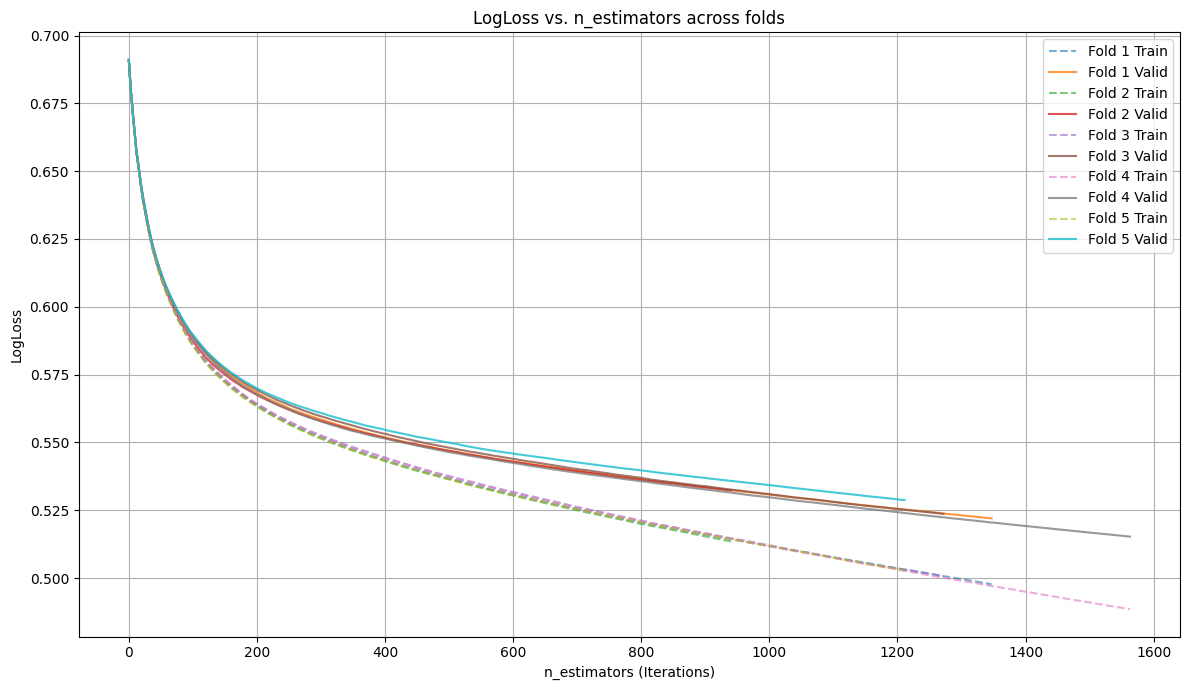

In [ ]:
plot_loss_vs_n_estimators_kfold(evals_result_list_1)

In [ ]:
metrics_1

,fold,train,valid
0,0,0.842716,0.784627
1,1,0.828400,0.782959
2,2,0.840396,0.788452
3,3,0.851201,0.787744
4,4,0.838314,0.781982
5,overall,0.840205,0.785140


In [ ]:
submission_1.to_csv('baseline_lgb.csv', index = False)

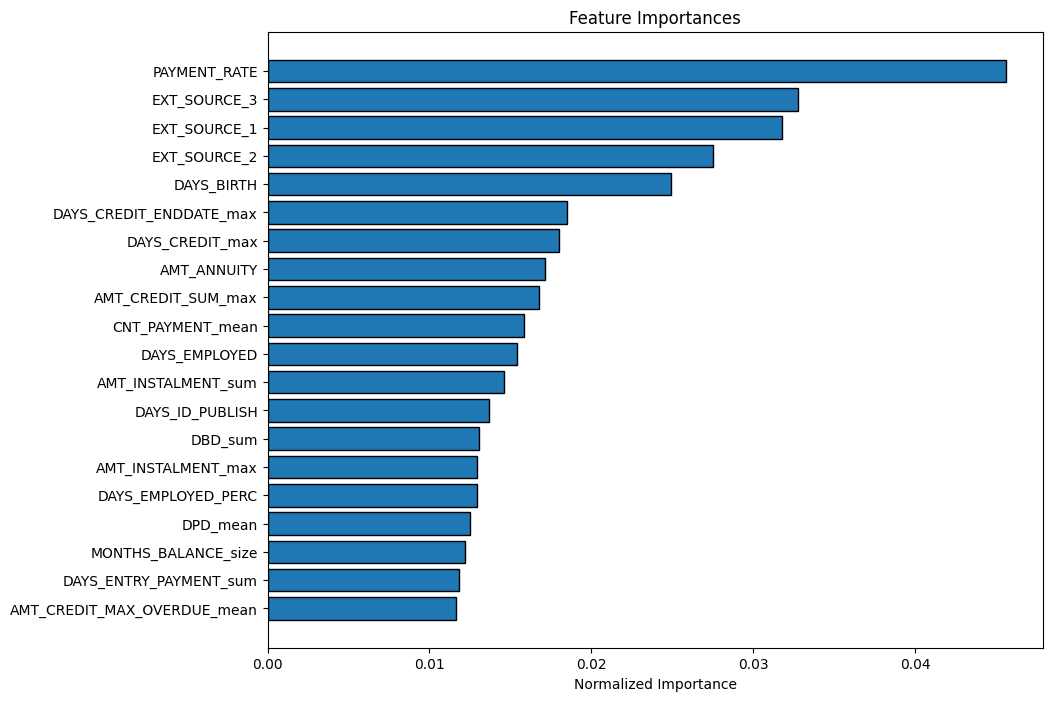

In [ ]:
fi_sorted_1 = plot_feature_importances(fi_1)

In [ ]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = train_clean_missing[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'PAYMENT_RATE']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,PAYMENT_RATE
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239,0.012704
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610,-0.115239
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996,-0.045899
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478,-0.001274
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000,0.092095
PAYMENT_RATE,0.012704,-0.115239,-0.045899,-0.001274,0.092095,1.000000


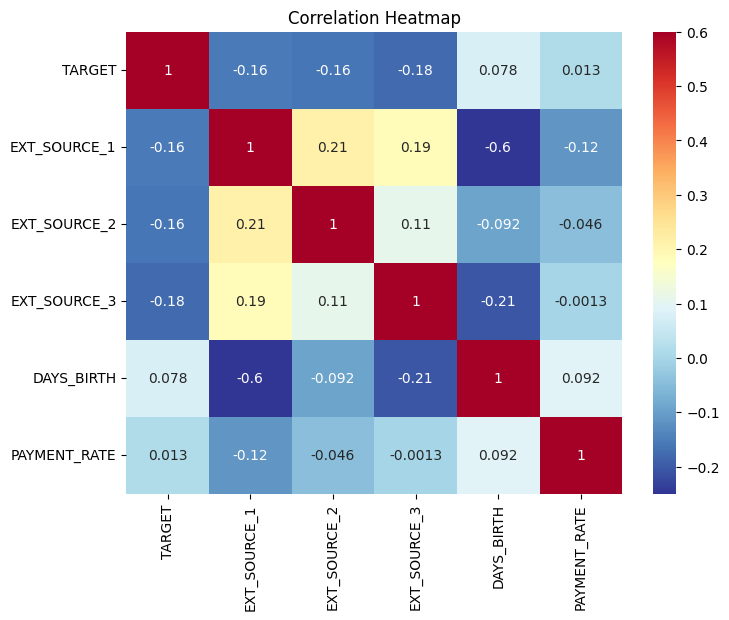

In [ ]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [ ]:
# Find the features with zero importance
zero_features = list(fi_1[fi_1['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))

There are 13 features with 0.0 importance


In [ ]:
train_for_lgb = train_for_lgb.drop(columns = zero_features)
test_for_lgb = test_for_lgb.drop(columns = zero_features)

In [ ]:
def model_LightGBM_2(train, test, n_folds=5):

    #Remove special characters
    train.columns = train.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)
    test.columns = test.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

    # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']

    # Extract the labels for training
    labels = train['TARGET']

    # Remove the ids and target
    train = train.drop(columns=['SK_ID_CURR', 'TARGET'])
    test = test.drop(columns=['SK_ID_CURR'])

    # Identify categorical features and convert them to 'category' type
    cat_features = [col for col in train.columns if train[col].dtype == 'object']

    for col in cat_features:
        train[col] = train[col].astype('category')
        test[col] = test[col].astype('category')

    print('Training Data Shape: ', train.shape)
    print('Testing Data Shape: ', test.shape)

    # Create the kfold object
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)

    # Empty array for feature importances
    feature_importance_values = np.zeros(len(train.columns))

    # Empty array for test predictions
    test_predictions = np.zeros(test.shape[0])

    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(train.shape[0])

    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    evals_result_list = []
    model = None

    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(train):

        # Training data for the fold
        train_features, train_labels = train.iloc[train_indices], labels.iloc[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = train.iloc[valid_indices], labels.iloc[valid_indices]

        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective='binary',
                                   class_weight='balanced', learning_rate=0.025,
                                   max_depth=5, num_leaves=20,
                                   colsample_bytree=0.6, min_split_gain=0.05,
                                   min_child_weight=40,
                                   bagging_fraction = 0.7, bagging_freq = 3,
                                   reg_alpha=0.3, reg_lambda=2,
                                   subsample=0.7, n_jobs=-1,
                                   verbose=-1, random_state=50)

        # Train the model
        model.fit(train_features, train_labels, eval_metric='auc',
                  eval_set=[(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names=['valid', 'train'], categorical_feature=cat_features,
                  callbacks=[lgb.early_stopping(50), lgb.log_evaluation(50)]
                  )

        evals_result_list.append(model.evals_result_)

        # Record the best iteration
        best_iteration = model.best_iteration_

        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits

        # Make predictions
        test_predictions += model.predict_proba(test, num_iteration=best_iteration)[:, 1] / k_fold.n_splits

        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration=best_iteration)[:, 1]

        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']

        valid_scores.append(valid_score)
        train_scores.append(train_score)

        # Clean up memory
        gc.enable()
        del train_features, valid_features
        gc.collect()

    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})

    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': train.columns, 'importance': feature_importance_values})

    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)

    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))

    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')

    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores})

    return submission, feature_importances, metrics, model, evals_result_list


In [ ]:
submission_2, fi_2, metrics_2, model_2, evals_result_list_2 = model_LightGBM_2(train_for_lgb, test_for_lgb)

Training Data Shape:  (307511, 252)
Testing Data Shape:  (48744, 252)
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.755163	train's binary_logloss: 0.616193	valid's auc: 0.743458	valid's binary_logloss: 0.617492
[100]	train's auc: 0.768251	train's binary_logloss: 0.589461	valid's auc: 0.755205	valid's binary_logloss: 0.592175
[150]	train's auc: 0.778992	train's binary_logloss: 0.574708	valid's auc: 0.763791	valid's binary_logloss: 0.577663
[200]	train's auc: 0.786359	train's binary_logloss: 0.565148	valid's auc: 0.768643	valid's binary_logloss: 0.568976
[250]	train's auc: 0.792202	train's binary_logloss: 0.557868	valid's auc: 0.772055	valid's binary_logloss: 0.562904
[300]	train's auc: 0.797005	train's binary_logloss: 0.552134	valid's auc: 0.774369	valid's binary_logloss: 0.558355
[350]	train's auc: 0.801112	train's binary_logloss: 0.547087	valid's auc: 0.776136	valid's binary_logloss: 0.554367
[400]	train's auc: 0.804652	train's binary_logloss: 0.5428

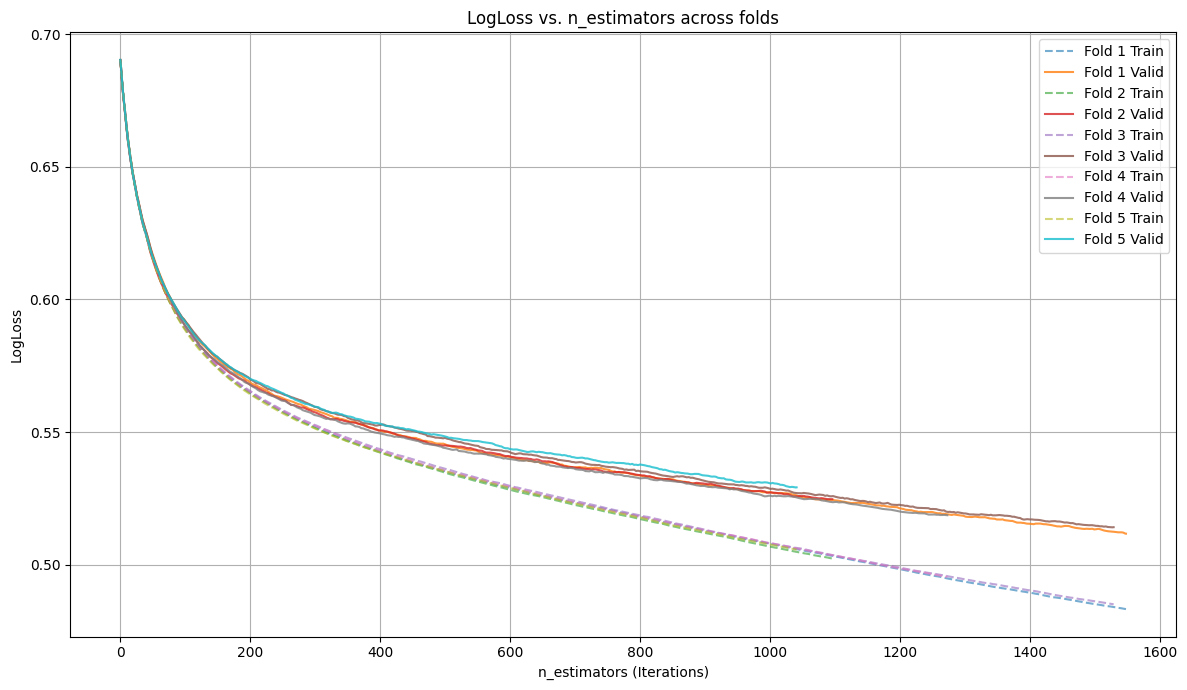

In [ ]:
plot_loss_vs_n_estimators_kfold(evals_result_list_2)

In [ ]:
metrics_2

,fold,train,valid
0,0,0.854998,0.785644
1,1,0.838211,0.784019
2,2,0.853921,0.789908
3,3,0.844468,0.788352
4,4,0.835191,0.782602
5,overall,0.845358,0.786096


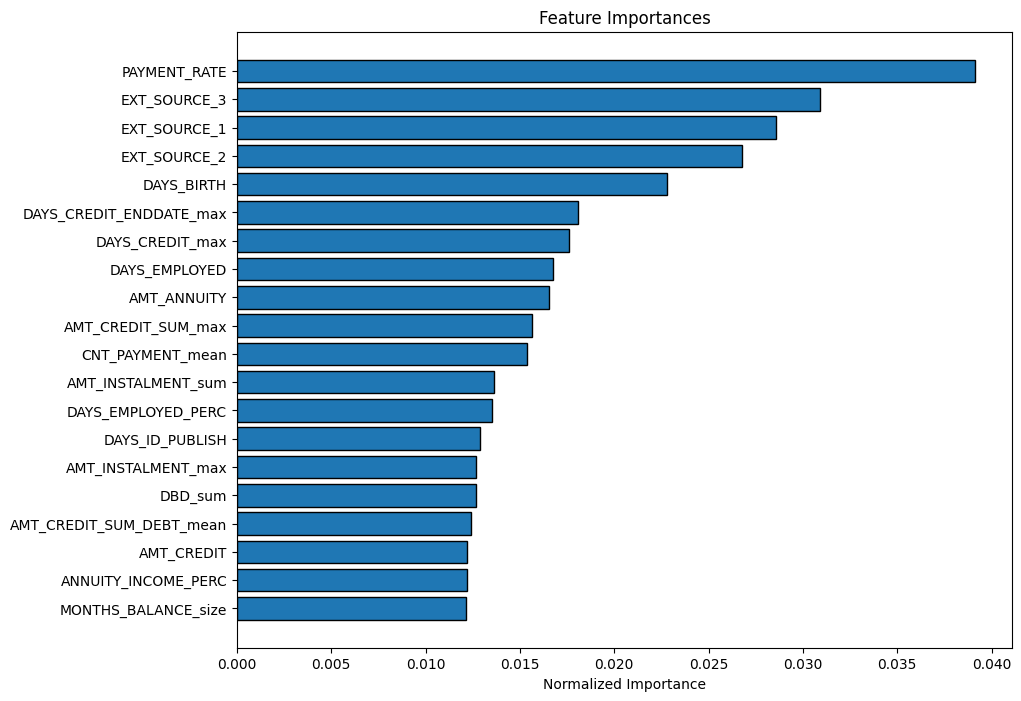

In [ ]:
fi_sorted_2 = plot_feature_importances(fi_2)

In [ ]:
submission_2.to_csv('lgb_2.csv', index = False)

In [ ]:
import optuna
from sklearn.model_selection import StratifiedKFold
import gc

def optuna_objective(trial, X, y, cat_features, n_folds=3):

    param = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'class_weight': 'balanced',
        'verbose': -1,
        'random_state': 50,
        'n_estimators': 3000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'num_leaves': trial.suggest_int('num_leaves', 15, 50),
        'min_child_weight': trial.suggest_float('min_child_weight', 1, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 0.3),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.9),
        'subsample': trial.suggest_float('subsample', 0.5, 0.9),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 0.9),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 5.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 5.0, log=True),
        'max_bin': trial.suggest_int('max_bin', 64, 255),
        'device': 'gpu',
        'gpu_platform_id': 0,
        'gpu_device_id': 0
    }

    print(f"\n🔍 Trial {trial.number} - Trying Parameters:")
    for k, v in trial.params.items():
        print(f"  {k}: {v}")

    kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=50)
    aucs = []

    for train_idx, valid_idx in kf.split(X, y):
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

        model = lgb.LGBMClassifier(**param)
        model.fit(
            X_train, y_train,
            eval_set=[(X_valid, y_valid), (X_train, y_train)],
            eval_names=['valid', 'train'],
            eval_metric='auc',
            callbacks=[lgb.early_stopping(50), lgb.log_evaluation(50)],
            categorical_feature=cat_features
        )

        # Predicting train & validation chances at optimal iteration
        best_iter = model.best_iteration_
        train_pred = model.predict_proba(X_train, num_iteration=best_iter)[:, 1]
        valid_pred = model.predict_proba(X_valid, num_iteration=best_iter)[:, 1]

        # Calculate AUC
        train_auc = roc_auc_score(y_train, train_pred)
        valid_auc = roc_auc_score(y_valid, valid_pred)
        aucs.append(valid_auc)

        # Showing the performance of the best iteration of this fold
        print(f"✅ Fold done | Best Iter: {best_iter} | Train AUC: {train_auc:.6f} | Valid AUC: {valid_auc:.6f}")


    return np.mean(aucs)

In [ ]:
def run_optuna_search(train, n_trials=30, n_folds=3):
    train.columns = train.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)
    train_ids = train['SK_ID_CURR']
    labels = train['TARGET']
    train = train.drop(columns=['SK_ID_CURR', 'TARGET'])

    cat_features = [col for col in train.columns if train[col].dtype == 'object']
    for col in cat_features:
        train[col] = train[col].astype('category')

    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: optuna_objective(trial, train, labels, cat_features, n_folds), n_trials=n_trials)

    print("Best AUC Score:", study.best_value)
    print("Best Parameters:")
    for k, v in study.best_params.items():
        print(f"{k}: {v}")

    return study.best_params, study.best_value

In [ ]:
best_params, best_auc = run_optuna_search(train_for_lgb)

[I 2025-03-25 03:27:35,003] A new study created in memory with name: no-name-3eef2e1a-e96f-47e3-9c40-3e3d2f871f78



🔍 Trial 0 - Trying Parameters:
  learning_rate: 0.03628345716190791
  max_depth: 6
  num_leaves: 39
  min_child_weight: 33.64924474683486
  min_child_samples: 43
  min_split_gain: 0.10525573912752031
  colsample_bytree: 0.781476715965254
  subsample: 0.6457804382649011
  bagging_fraction: 0.833114255202855
  bagging_freq: 1
  reg_alpha: 0.11103303421974835
  reg_lambda: 0.03880196758056408
  max_bin: 165
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.775913	valid's auc: 0.752312
[100]	train's auc: 0.798336	valid's auc: 0.766085
[150]	train's auc: 0.812002	valid's auc: 0.77203
[200]	train's auc: 0.822134	valid's auc: 0.775203
[250]	train's auc: 0.829866	valid's auc: 0.777201
[300]	train's auc: 0.837428	valid's auc: 0.778668
[350]	train's auc: 0.844219	valid's auc: 0.779671
[400]	train's auc: 0.850664	valid's auc: 0.780501
[450]	train's auc: 0.856803	valid's auc: 0.780906
[500]	train's auc: 0.862895	valid's auc: 0.7814
[550]	train's auc: 0.86824	valid's

[I 2025-03-25 03:30:13,351] Trial 0 finished with value: 0.7839831808082925 and parameters: {'learning_rate': 0.03628345716190791, 'max_depth': 6, 'num_leaves': 39, 'min_child_weight': 33.64924474683486, 'min_child_samples': 43, 'min_split_gain': 0.10525573912752031, 'colsample_bytree': 0.781476715965254, 'subsample': 0.6457804382649011, 'bagging_fraction': 0.833114255202855, 'bagging_freq': 1, 'reg_alpha': 0.11103303421974835, 'reg_lambda': 0.03880196758056408, 'max_bin': 165}. Best is trial 0 with value: 0.7839831808082925.


✅ Fold done | Best Iter: 717 | Train AUC: 0.886757 | Valid AUC: 0.784188

🔍 Trial 1 - Trying Parameters:
  learning_rate: 0.021663797406519157
  max_depth: 4
  num_leaves: 38
  min_child_weight: 14.34256728155062
  min_child_samples: 58
  min_split_gain: 0.1733533551888313
  colsample_bytree: 0.6431376914786133
  subsample: 0.8041380036006265
  bagging_fraction: 0.5667311746591328
  bagging_freq: 2
  reg_alpha: 0.02056031591430088
  reg_lambda: 2.132125306714276
  max_bin: 119
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.747787	valid's auc: 0.736444
[100]	train's auc: 0.759702	valid's auc: 0.746252
[150]	train's auc: 0.770929	valid's auc: 0.755288
[200]	train's auc: 0.778606	valid's auc: 0.761138
[250]	train's auc: 0.784098	valid's auc: 0.764964
[300]	train's auc: 0.788641	valid's auc: 0.767954
[350]	train's auc: 0.7923	valid's auc: 0.770069
[400]	train's auc: 0.795552	valid's auc: 0.771766
[450]	train's auc: 0.798366	valid's auc: 0.773203
[500]	trai

[I 2025-03-25 03:34:27,238] Trial 1 finished with value: 0.7839515572274408 and parameters: {'learning_rate': 0.021663797406519157, 'max_depth': 4, 'num_leaves': 38, 'min_child_weight': 14.34256728155062, 'min_child_samples': 58, 'min_split_gain': 0.1733533551888313, 'colsample_bytree': 0.6431376914786133, 'subsample': 0.8041380036006265, 'bagging_fraction': 0.5667311746591328, 'bagging_freq': 2, 'reg_alpha': 0.02056031591430088, 'reg_lambda': 2.132125306714276, 'max_bin': 119}. Best is trial 0 with value: 0.7839831808082925.


✅ Fold done | Best Iter: 1504 | Train AUC: 0.838793 | Valid AUC: 0.784069

🔍 Trial 2 - Trying Parameters:
  learning_rate: 0.043116345732062515
  max_depth: 4
  num_leaves: 50
  min_child_weight: 65.59674320289548
  min_child_samples: 67
  min_split_gain: 0.23588580361821182
  colsample_bytree: 0.7685939736545682
  subsample: 0.7677314194470655
  bagging_fraction: 0.7606339262177981
  bagging_freq: 4
  reg_alpha: 0.9750173194300695
  reg_lambda: 2.237014821226619
  max_bin: 213
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.758142	valid's auc: 0.74532
[100]	train's auc: 0.778114	valid's auc: 0.760873
[150]	train's auc: 0.787766	valid's auc: 0.767351
[200]	train's auc: 0.794877	valid's auc: 0.771397
[250]	train's auc: 0.800125	valid's auc: 0.773926
[300]	train's auc: 0.80465	valid's auc: 0.776084
[350]	train's auc: 0.808904	valid's auc: 0.777564
[400]	train's auc: 0.812789	valid's auc: 0.778596
[450]	train's auc: 0.815766	valid's auc: 0.779469
[500]	tra

[I 2025-03-25 03:37:22,560] Trial 2 finished with value: 0.7846106482938273 and parameters: {'learning_rate': 0.043116345732062515, 'max_depth': 4, 'num_leaves': 50, 'min_child_weight': 65.59674320289548, 'min_child_samples': 67, 'min_split_gain': 0.23588580361821182, 'colsample_bytree': 0.7685939736545682, 'subsample': 0.7677314194470655, 'bagging_fraction': 0.7606339262177981, 'bagging_freq': 4, 'reg_alpha': 0.9750173194300695, 'reg_lambda': 2.237014821226619, 'max_bin': 213}. Best is trial 2 with value: 0.7846106482938273.


✅ Fold done | Best Iter: 1193 | Train AUC: 0.853976 | Valid AUC: 0.784775

🔍 Trial 3 - Trying Parameters:
  learning_rate: 0.04806773601452343
  max_depth: 4
  num_leaves: 40
  min_child_weight: 75.99286810098528
  min_child_samples: 55
  min_split_gain: 0.15610568526043864
  colsample_bytree: 0.5448679947548088
  subsample: 0.7990622516898067
  bagging_fraction: 0.753343545821529
  bagging_freq: 1
  reg_alpha: 0.014722902524534549
  reg_lambda: 0.0036775528761250065
  max_bin: 213
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.762316	valid's auc: 0.748456
[100]	train's auc: 0.780823	valid's auc: 0.762805
[150]	train's auc: 0.790777	valid's auc: 0.769623
[200]	train's auc: 0.797291	valid's auc: 0.77301
[250]	train's auc: 0.802546	valid's auc: 0.775237
[300]	train's auc: 0.807005	valid's auc: 0.776914
[350]	train's auc: 0.810964	valid's auc: 0.778222
[400]	train's auc: 0.814823	valid's auc: 0.779194
[450]	train's auc: 0.818295	valid's auc: 0.780053
[500

[I 2025-03-25 03:40:22,632] Trial 3 finished with value: 0.7849243861646213 and parameters: {'learning_rate': 0.04806773601452343, 'max_depth': 4, 'num_leaves': 40, 'min_child_weight': 75.99286810098528, 'min_child_samples': 55, 'min_split_gain': 0.15610568526043864, 'colsample_bytree': 0.5448679947548088, 'subsample': 0.7990622516898067, 'bagging_fraction': 0.753343545821529, 'bagging_freq': 1, 'reg_alpha': 0.014722902524534549, 'reg_lambda': 0.0036775528761250065, 'max_bin': 213}. Best is trial 3 with value: 0.7849243861646213.


✅ Fold done | Best Iter: 886 | Train AUC: 0.843618 | Valid AUC: 0.784846

🔍 Trial 4 - Trying Parameters:
  learning_rate: 0.02019700588389858
  max_depth: 3
  num_leaves: 18
  min_child_weight: 41.32456092424532
  min_child_samples: 27
  min_split_gain: 0.15570495302866907
  colsample_bytree: 0.8870085573665827
  subsample: 0.6039772440334477
  bagging_fraction: 0.8295993326538136
  bagging_freq: 4
  reg_alpha: 0.010164316260039354
  reg_lambda: 0.017447728679930375
  max_bin: 207
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.727487	valid's auc: 0.720639
[100]	train's auc: 0.743705	valid's auc: 0.735187
[150]	train's auc: 0.755697	valid's auc: 0.745567
[200]	train's auc: 0.764289	valid's auc: 0.752985
[250]	train's auc: 0.770168	valid's auc: 0.757627
[300]	train's auc: 0.774417	valid's auc: 0.76093
[350]	train's auc: 0.777786	valid's auc: 0.763408
[400]	train's auc: 0.780515	valid's auc: 0.765449
[450]	train's auc: 0.783051	valid's auc: 0.767358
[500]

[I 2025-03-25 03:46:00,142] Trial 4 finished with value: 0.7841301268252724 and parameters: {'learning_rate': 0.02019700588389858, 'max_depth': 3, 'num_leaves': 18, 'min_child_weight': 41.32456092424532, 'min_child_samples': 27, 'min_split_gain': 0.15570495302866907, 'colsample_bytree': 0.8870085573665827, 'subsample': 0.6039772440334477, 'bagging_fraction': 0.8295993326538136, 'bagging_freq': 4, 'reg_alpha': 0.010164316260039354, 'reg_lambda': 0.017447728679930375, 'max_bin': 207}. Best is trial 3 with value: 0.7849243861646213.


✅ Fold done | Best Iter: 2465 | Train AUC: 0.824413 | Valid AUC: 0.784340

🔍 Trial 5 - Trying Parameters:
  learning_rate: 0.04833194594172346
  max_depth: 4
  num_leaves: 40
  min_child_weight: 6.448941557481312
  min_child_samples: 53
  min_split_gain: 0.07128176239836632
  colsample_bytree: 0.7124753667398381
  subsample: 0.5778658842679615
  bagging_fraction: 0.6505304099707757
  bagging_freq: 3
  reg_alpha: 0.19010015395918642
  reg_lambda: 0.061514998252894165
  max_bin: 242
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.762386	valid's auc: 0.748231
[100]	train's auc: 0.781288	valid's auc: 0.762196
[150]	train's auc: 0.791625	valid's auc: 0.768462
[200]	train's auc: 0.799025	valid's auc: 0.772179
[250]	train's auc: 0.805139	valid's auc: 0.774655
[300]	train's auc: 0.810394	valid's auc: 0.776333
[350]	train's auc: 0.814973	valid's auc: 0.777519
[400]	train's auc: 0.819503	valid's auc: 0.778525
[450]	train's auc: 0.823781	valid's auc: 0.779185
[500

[I 2025-03-25 03:47:54,366] Trial 5 finished with value: 0.7825550304075225 and parameters: {'learning_rate': 0.04833194594172346, 'max_depth': 4, 'num_leaves': 40, 'min_child_weight': 6.448941557481312, 'min_child_samples': 53, 'min_split_gain': 0.07128176239836632, 'colsample_bytree': 0.7124753667398381, 'subsample': 0.5778658842679615, 'bagging_fraction': 0.6505304099707757, 'bagging_freq': 3, 'reg_alpha': 0.19010015395918642, 'reg_lambda': 0.061514998252894165, 'max_bin': 242}. Best is trial 3 with value: 0.7849243861646213.


✅ Fold done | Best Iter: 657 | Train AUC: 0.839463 | Valid AUC: 0.782944

🔍 Trial 6 - Trying Parameters:
  learning_rate: 0.04896506363769869
  max_depth: 6
  num_leaves: 21
  min_child_weight: 90.26654804203432
  min_child_samples: 57
  min_split_gain: 0.2125018671265179
  colsample_bytree: 0.5844827053402524
  subsample: 0.6281689726184306
  bagging_fraction: 0.8366145771703927
  bagging_freq: 1
  reg_alpha: 0.022502693546731244
  reg_lambda: 2.476863363299731
  max_bin: 172
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.772478	valid's auc: 0.754849
[100]	train's auc: 0.790571	valid's auc: 0.767248
[150]	train's auc: 0.801788	valid's auc: 0.773191
[200]	train's auc: 0.810069	valid's auc: 0.77633
[250]	train's auc: 0.816924	valid's auc: 0.778132
[300]	train's auc: 0.823305	valid's auc: 0.779682
[350]	train's auc: 0.82905	valid's auc: 0.7806
[400]	train's auc: 0.834608	valid's auc: 0.781192
[450]	train's auc: 0.839673	valid's auc: 0.781597
[500]	train'

[I 2025-03-25 03:50:26,565] Trial 6 finished with value: 0.7848930062336471 and parameters: {'learning_rate': 0.04896506363769869, 'max_depth': 6, 'num_leaves': 21, 'min_child_weight': 90.26654804203432, 'min_child_samples': 57, 'min_split_gain': 0.2125018671265179, 'colsample_bytree': 0.5844827053402524, 'subsample': 0.6281689726184306, 'bagging_fraction': 0.8366145771703927, 'bagging_freq': 1, 'reg_alpha': 0.022502693546731244, 'reg_lambda': 2.476863363299731, 'max_bin': 172}. Best is trial 3 with value: 0.7849243861646213.


✅ Fold done | Best Iter: 679 | Train AUC: 0.861063 | Valid AUC: 0.784963

🔍 Trial 7 - Trying Parameters:
  learning_rate: 0.011781557819064297
  max_depth: 5
  num_leaves: 50
  min_child_weight: 53.713661154638416
  min_child_samples: 61
  min_split_gain: 0.24811171427585343
  colsample_bytree: 0.6495474031613526
  subsample: 0.6116477414189527
  bagging_fraction: 0.817889073955411
  bagging_freq: 1
  reg_alpha: 3.924675783165407
  reg_lambda: 0.06835328362415971
  max_bin: 196
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.754429	valid's auc: 0.738243
[100]	train's auc: 0.762818	valid's auc: 0.744711
[150]	train's auc: 0.769931	valid's auc: 0.75012
[200]	train's auc: 0.776475	valid's auc: 0.754777
[250]	train's auc: 0.782534	valid's auc: 0.759065
[300]	train's auc: 0.787806	valid's auc: 0.762593
[350]	train's auc: 0.792222	valid's auc: 0.76517
[400]	train's auc: 0.796082	valid's auc: 0.767549
[450]	train's auc: 0.799361	valid's auc: 0.769278
[500]	tra

[I 2025-03-25 03:58:53,293] Trial 7 finished with value: 0.7857585937216977 and parameters: {'learning_rate': 0.011781557819064297, 'max_depth': 5, 'num_leaves': 50, 'min_child_weight': 53.713661154638416, 'min_child_samples': 61, 'min_split_gain': 0.24811171427585343, 'colsample_bytree': 0.6495474031613526, 'subsample': 0.6116477414189527, 'bagging_fraction': 0.817889073955411, 'bagging_freq': 1, 'reg_alpha': 3.924675783165407, 'reg_lambda': 0.06835328362415971, 'max_bin': 196}. Best is trial 7 with value: 0.7857585937216977.


✅ Fold done | Best Iter: 2619 | Train AUC: 0.864941 | Valid AUC: 0.785867

🔍 Trial 8 - Trying Parameters:
  learning_rate: 0.019671625843250752
  max_depth: 4
  num_leaves: 34
  min_child_weight: 1.252616709064465
  min_child_samples: 67
  min_split_gain: 0.022805273653084778
  colsample_bytree: 0.8912829751527338
  subsample: 0.6321640663311765
  bagging_fraction: 0.7419984281130418
  bagging_freq: 1
  reg_alpha: 0.01647358035756907
  reg_lambda: 0.06929327810650096
  max_bin: 248
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.738762	valid's auc: 0.729021
[100]	train's auc: 0.755723	valid's auc: 0.743203
[150]	train's auc: 0.769137	valid's auc: 0.753984
[200]	train's auc: 0.77734	valid's auc: 0.760231
[250]	train's auc: 0.783434	valid's auc: 0.764247
[300]	train's auc: 0.788222	valid's auc: 0.767263
[350]	train's auc: 0.79217	valid's auc: 0.769515
[400]	train's auc: 0.795647	valid's auc: 0.771305
[450]	train's auc: 0.798922	valid's auc: 0.772844
[500]

[I 2025-03-25 04:04:08,602] Trial 8 finished with value: 0.7848117628445183 and parameters: {'learning_rate': 0.019671625843250752, 'max_depth': 4, 'num_leaves': 34, 'min_child_weight': 1.252616709064465, 'min_child_samples': 67, 'min_split_gain': 0.022805273653084778, 'colsample_bytree': 0.8912829751527338, 'subsample': 0.6321640663311765, 'bagging_fraction': 0.7419984281130418, 'bagging_freq': 1, 'reg_alpha': 0.01647358035756907, 'reg_lambda': 0.06929327810650096, 'max_bin': 248}. Best is trial 7 with value: 0.7857585937216977.


✅ Fold done | Best Iter: 1758 | Train AUC: 0.846329 | Valid AUC: 0.784797

🔍 Trial 9 - Trying Parameters:
  learning_rate: 0.04954615000166127
  max_depth: 6
  num_leaves: 34
  min_child_weight: 65.16772237437804
  min_child_samples: 96
  min_split_gain: 0.22638251525922537
  colsample_bytree: 0.6019909983751444
  subsample: 0.585355306094698
  bagging_fraction: 0.796833867488268
  bagging_freq: 1
  reg_alpha: 0.06901672697504635
  reg_lambda: 1.6994362501671791
  max_bin: 89
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.781768	valid's auc: 0.758376
[100]	train's auc: 0.801977	valid's auc: 0.769819
[150]	train's auc: 0.815021	valid's auc: 0.775216
[200]	train's auc: 0.824709	valid's auc: 0.777412
[250]	train's auc: 0.833127	valid's auc: 0.778983
[300]	train's auc: 0.840856	valid's auc: 0.780074
[350]	train's auc: 0.848118	valid's auc: 0.780713
[400]	train's auc: 0.854779	valid's auc: 0.781049
[450]	train's auc: 0.8614	valid's auc: 0.781002
Early stopp

[I 2025-03-25 04:06:07,885] Trial 9 finished with value: 0.7835542140815956 and parameters: {'learning_rate': 0.04954615000166127, 'max_depth': 6, 'num_leaves': 34, 'min_child_weight': 65.16772237437804, 'min_child_samples': 96, 'min_split_gain': 0.22638251525922537, 'colsample_bytree': 0.6019909983751444, 'subsample': 0.585355306094698, 'bagging_fraction': 0.796833867488268, 'bagging_freq': 1, 'reg_alpha': 0.06901672697504635, 'reg_lambda': 1.6994362501671791, 'max_bin': 89}. Best is trial 7 with value: 0.7857585937216977.


✅ Fold done | Best Iter: 544 | Train AUC: 0.873830 | Valid AUC: 0.783953

🔍 Trial 10 - Trying Parameters:
  learning_rate: 0.01114524316587066
  max_depth: 7
  num_leaves: 50
  min_child_weight: 94.94822137085157
  min_child_samples: 81
  min_split_gain: 0.2897487967749347
  colsample_bytree: 0.5106432733564612
  subsample: 0.5040664287202163
  bagging_fraction: 0.8893208351232423
  bagging_freq: 5
  reg_alpha: 0.001314422975907464
  reg_lambda: 0.36899387060046707
  max_bin: 135
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.770834	valid's auc: 0.748758
[100]	train's auc: 0.780175	valid's auc: 0.754841
[150]	train's auc: 0.787968	valid's auc: 0.759892
[200]	train's auc: 0.793593	valid's auc: 0.762869
[250]	train's auc: 0.799047	valid's auc: 0.765657
[300]	train's auc: 0.804411	valid's auc: 0.768349
[350]	train's auc: 0.809208	valid's auc: 0.770487
[400]	train's auc: 0.813513	valid's auc: 0.772258
[450]	train's auc: 0.817521	valid's auc: 0.773821
[500]

[I 2025-03-25 04:14:59,191] Trial 10 finished with value: 0.7859242751561043 and parameters: {'learning_rate': 0.01114524316587066, 'max_depth': 7, 'num_leaves': 50, 'min_child_weight': 94.94822137085157, 'min_child_samples': 81, 'min_split_gain': 0.2897487967749347, 'colsample_bytree': 0.5106432733564612, 'subsample': 0.5040664287202163, 'bagging_fraction': 0.8893208351232423, 'bagging_freq': 5, 'reg_alpha': 0.001314422975907464, 'reg_lambda': 0.36899387060046707, 'max_bin': 135}. Best is trial 10 with value: 0.7859242751561043.


✅ Fold done | Best Iter: 1990 | Train AUC: 0.883326 | Valid AUC: 0.785722

🔍 Trial 11 - Trying Parameters:
  learning_rate: 0.010119510186347656
  max_depth: 7
  num_leaves: 49
  min_child_weight: 96.05001191578458
  min_child_samples: 86
  min_split_gain: 0.29634102959637054
  colsample_bytree: 0.5002686244776221
  subsample: 0.5122895566135851
  bagging_fraction: 0.8771636589147171
  bagging_freq: 5
  reg_alpha: 0.0015607404065920859
  reg_lambda: 0.37282609381990106
  max_bin: 126
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.770385	valid's auc: 0.748711
[100]	train's auc: 0.77937	valid's auc: 0.754941
[150]	train's auc: 0.786405	valid's auc: 0.759531
[200]	train's auc: 0.791744	valid's auc: 0.762518
[250]	train's auc: 0.796653	valid's auc: 0.765401
[300]	train's auc: 0.801465	valid's auc: 0.767887
[350]	train's auc: 0.805738	valid's auc: 0.769805
[400]	train's auc: 0.809671	valid's auc: 0.771451
[450]	train's auc: 0.813449	valid's auc: 0.772876
[5

[I 2025-03-25 04:24:40,098] Trial 11 finished with value: 0.7860460561287942 and parameters: {'learning_rate': 0.010119510186347656, 'max_depth': 7, 'num_leaves': 49, 'min_child_weight': 96.05001191578458, 'min_child_samples': 86, 'min_split_gain': 0.29634102959637054, 'colsample_bytree': 0.5002686244776221, 'subsample': 0.5122895566135851, 'bagging_fraction': 0.8771636589147171, 'bagging_freq': 5, 'reg_alpha': 0.0015607404065920859, 'reg_lambda': 0.37282609381990106, 'max_bin': 126}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 2484 | Train AUC: 0.889359 | Valid AUC: 0.786242

🔍 Trial 12 - Trying Parameters:
  learning_rate: 0.01057264873551454
  max_depth: 7
  num_leaves: 46
  min_child_weight: 98.15999425938614
  min_child_samples: 86
  min_split_gain: 0.2986013278879023
  colsample_bytree: 0.5120818798620465
  subsample: 0.5111641401146164
  bagging_fraction: 0.8988970319680095
  bagging_freq: 5
  reg_alpha: 0.0011907994914783409
  reg_lambda: 0.4260028257811438
  max_bin: 124
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.768578	valid's auc: 0.748201
[100]	train's auc: 0.777264	valid's auc: 0.754009
[150]	train's auc: 0.784642	valid's auc: 0.758847
[200]	train's auc: 0.790219	valid's auc: 0.761953
[250]	train's auc: 0.795429	valid's auc: 0.765012
[300]	train's auc: 0.800466	valid's auc: 0.767727
[350]	train's auc: 0.804949	valid's auc: 0.769898
[400]	train's auc: 0.809049	valid's auc: 0.771692
[450]	train's auc: 0.813084	valid's auc: 0.773236
[500

[I 2025-03-25 04:33:44,443] Trial 12 finished with value: 0.7859153499574822 and parameters: {'learning_rate': 0.01057264873551454, 'max_depth': 7, 'num_leaves': 46, 'min_child_weight': 98.15999425938614, 'min_child_samples': 86, 'min_split_gain': 0.2986013278879023, 'colsample_bytree': 0.5120818798620465, 'subsample': 0.5111641401146164, 'bagging_fraction': 0.8988970319680095, 'bagging_freq': 5, 'reg_alpha': 0.0011907994914783409, 'reg_lambda': 0.4260028257811438, 'max_bin': 124}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 2482 | Train AUC: 0.889762 | Valid AUC: 0.785706

🔍 Trial 13 - Trying Parameters:
  learning_rate: 0.02583408439881512
  max_depth: 7
  num_leaves: 24
  min_child_weight: 84.52339917564551
  min_child_samples: 81
  min_split_gain: 0.29544016716733995
  colsample_bytree: 0.5119459845449819
  subsample: 0.5012684053881717
  bagging_fraction: 0.8998021168032153
  bagging_freq: 5
  reg_alpha: 0.0010341766002534166
  reg_lambda: 0.3246425089835708
  max_bin: 130
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.764307	valid's auc: 0.748447
[100]	train's auc: 0.778125	valid's auc: 0.758636
[150]	train's auc: 0.788529	valid's auc: 0.765703
[200]	train's auc: 0.796517	valid's auc: 0.770411
[250]	train's auc: 0.803012	valid's auc: 0.773745
[300]	train's auc: 0.808551	valid's auc: 0.776091
[350]	train's auc: 0.813513	valid's auc: 0.777658
[400]	train's auc: 0.817826	valid's auc: 0.778876
[450]	train's auc: 0.822079	valid's auc: 0.779861
[50

[I 2025-03-25 04:37:52,725] Trial 13 finished with value: 0.7852211535685952 and parameters: {'learning_rate': 0.02583408439881512, 'max_depth': 7, 'num_leaves': 24, 'min_child_weight': 84.52339917564551, 'min_child_samples': 81, 'min_split_gain': 0.29544016716733995, 'colsample_bytree': 0.5119459845449819, 'subsample': 0.5012684053881717, 'bagging_fraction': 0.8998021168032153, 'bagging_freq': 5, 'reg_alpha': 0.0010341766002534166, 'reg_lambda': 0.3246425089835708, 'max_bin': 130}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 1113 | Train AUC: 0.864502 | Valid AUC: 0.786136

🔍 Trial 14 - Trying Parameters:
  learning_rate: 0.015099465201703986
  max_depth: 7
  num_leaves: 45
  min_child_weight: 97.44451513395433
  min_child_samples: 82
  min_split_gain: 0.2684782146551139
  colsample_bytree: 0.5749349125669198
  subsample: 0.8836301349478026
  bagging_fraction: 0.655771048897092
  bagging_freq: 4
  reg_alpha: 0.003479614301667152
  reg_lambda: 0.39191461112530424
  max_bin: 79
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.770884	valid's auc: 0.749906
[100]	train's auc: 0.781478	valid's auc: 0.757191
[150]	train's auc: 0.789244	valid's auc: 0.761805
[200]	train's auc: 0.796247	valid's auc: 0.765827
[250]	train's auc: 0.802664	valid's auc: 0.768992
[300]	train's auc: 0.808686	valid's auc: 0.771895
[350]	train's auc: 0.813596	valid's auc: 0.773863
[400]	train's auc: 0.817928	valid's auc: 0.775506
[450]	train's auc: 0.821646	valid's auc: 0.776728
[500]

[I 2025-03-25 04:44:04,014] Trial 14 finished with value: 0.785042291911723 and parameters: {'learning_rate': 0.015099465201703986, 'max_depth': 7, 'num_leaves': 45, 'min_child_weight': 97.44451513395433, 'min_child_samples': 82, 'min_split_gain': 0.2684782146551139, 'colsample_bytree': 0.5749349125669198, 'subsample': 0.8836301349478026, 'bagging_fraction': 0.655771048897092, 'bagging_freq': 4, 'reg_alpha': 0.003479614301667152, 'reg_lambda': 0.39191461112530424, 'max_bin': 79}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 1678 | Train AUC: 0.884688 | Valid AUC: 0.785238

🔍 Trial 15 - Trying Parameters:
  learning_rate: 0.030533445158417195
  max_depth: 6
  num_leaves: 28
  min_child_weight: 78.6494661569314
  min_child_samples: 98
  min_split_gain: 0.19552691613681622
  colsample_bytree: 0.5019120300591934
  subsample: 0.709914421350546
  bagging_fraction: 0.518190576522191
  bagging_freq: 5
  reg_alpha: 0.002998483350379044
  reg_lambda: 0.3083926364441702
  max_bin: 144
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.770224	valid's auc: 0.752812
[100]	train's auc: 0.784833	valid's auc: 0.763278
[150]	train's auc: 0.795322	valid's auc: 0.769389
[200]	train's auc: 0.802872	valid's auc: 0.773183
[250]	train's auc: 0.809236	valid's auc: 0.775853
[300]	train's auc: 0.814709	valid's auc: 0.777598
[350]	train's auc: 0.819622	valid's auc: 0.779061
[400]	train's auc: 0.824099	valid's auc: 0.77976
[450]	train's auc: 0.828211	valid's auc: 0.780495
[500]	t

[I 2025-03-25 04:46:58,828] Trial 15 finished with value: 0.7836805946720671 and parameters: {'learning_rate': 0.030533445158417195, 'max_depth': 6, 'num_leaves': 28, 'min_child_weight': 78.6494661569314, 'min_child_samples': 98, 'min_split_gain': 0.19552691613681622, 'colsample_bytree': 0.5019120300591934, 'subsample': 0.709914421350546, 'bagging_fraction': 0.518190576522191, 'bagging_freq': 5, 'reg_alpha': 0.002998483350379044, 'reg_lambda': 0.3083926364441702, 'max_bin': 144}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 656 | Train AUC: 0.844727 | Valid AUC: 0.783577

🔍 Trial 16 - Trying Parameters:
  learning_rate: 0.01576306746640694
  max_depth: 7
  num_leaves: 45
  min_child_weight: 65.78192685528468
  min_child_samples: 75
  min_split_gain: 0.2681494942730172
  colsample_bytree: 0.6216091865906468
  subsample: 0.5436276228443011
  bagging_fraction: 0.8721728620892137
  bagging_freq: 3
  reg_alpha: 0.0038597447654293436
  reg_lambda: 0.0010761363430717734
  max_bin: 96
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.769938	valid's auc: 0.747974
[100]	train's auc: 0.781357	valid's auc: 0.755538
[150]	train's auc: 0.790799	valid's auc: 0.761345
[200]	train's auc: 0.7988	valid's auc: 0.765809
[250]	train's auc: 0.806329	valid's auc: 0.76967
[300]	train's auc: 0.812799	valid's auc: 0.772444
[350]	train's auc: 0.818389	valid's auc: 0.774466
[400]	train's auc: 0.823108	valid's auc: 0.775862
[450]	train's auc: 0.827236	valid's auc: 0.777092
[500]	

[I 2025-03-25 04:51:56,465] Trial 16 finished with value: 0.7843966182362223 and parameters: {'learning_rate': 0.01576306746640694, 'max_depth': 7, 'num_leaves': 45, 'min_child_weight': 65.78192685528468, 'min_child_samples': 75, 'min_split_gain': 0.2681494942730172, 'colsample_bytree': 0.6216091865906468, 'subsample': 0.5436276228443011, 'bagging_fraction': 0.8721728620892137, 'bagging_freq': 3, 'reg_alpha': 0.0038597447654293436, 'reg_lambda': 0.0010761363430717734, 'max_bin': 96}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 1219 | Train AUC: 0.876609 | Valid AUC: 0.784342

🔍 Trial 17 - Trying Parameters:
  learning_rate: 0.032322069417645316
  max_depth: 5
  num_leaves: 46
  min_child_weight: 99.52305797546484
  min_child_samples: 90
  min_split_gain: 0.10466243777499804
  colsample_bytree: 0.6929055130634963
  subsample: 0.6911300303305202
  bagging_fraction: 0.6692979777208639
  bagging_freq: 4
  reg_alpha: 0.005057022741991277
  reg_lambda: 0.7502340255100545
  max_bin: 103
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.764919	valid's auc: 0.747416
[100]	train's auc: 0.783458	valid's auc: 0.760906
[150]	train's auc: 0.793672	valid's auc: 0.767531
[200]	train's auc: 0.801339	valid's auc: 0.77177
[250]	train's auc: 0.807208	valid's auc: 0.774415
[300]	train's auc: 0.811622	valid's auc: 0.776438
[350]	train's auc: 0.815906	valid's auc: 0.777929
[400]	train's auc: 0.819646	valid's auc: 0.779058
[450]	train's auc: 0.822902	valid's auc: 0.780012
[500

[I 2025-03-25 04:55:11,711] Trial 17 finished with value: 0.7847835551187679 and parameters: {'learning_rate': 0.032322069417645316, 'max_depth': 5, 'num_leaves': 46, 'min_child_weight': 99.52305797546484, 'min_child_samples': 90, 'min_split_gain': 0.10466243777499804, 'colsample_bytree': 0.6929055130634963, 'subsample': 0.6911300303305202, 'bagging_fraction': 0.6692979777208639, 'bagging_freq': 4, 'reg_alpha': 0.005057022741991277, 'reg_lambda': 0.7502340255100545, 'max_bin': 103}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 1124 | Train AUC: 0.862313 | Valid AUC: 0.785341

🔍 Trial 18 - Trying Parameters:
  learning_rate: 0.026146674876478197
  max_depth: 7
  num_leaves: 28
  min_child_weight: 87.03815157609615
  min_child_samples: 72
  min_split_gain: 0.2682034506393842
  colsample_bytree: 0.5516138614668546
  subsample: 0.5429514482503552
  bagging_fraction: 0.713934992439908
  bagging_freq: 5
  reg_alpha: 0.0017575433642143187
  reg_lambda: 0.16249893370241733
  max_bin: 148
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.767432	valid's auc: 0.750645
[100]	train's auc: 0.781771	valid's auc: 0.76092
[150]	train's auc: 0.792486	valid's auc: 0.76772
[200]	train's auc: 0.80045	valid's auc: 0.771741
[250]	train's auc: 0.807318	valid's auc: 0.774804
[300]	train's auc: 0.81306	valid's auc: 0.776897
[350]	train's auc: 0.818423	valid's auc: 0.778337
[400]	train's auc: 0.823404	valid's auc: 0.779348
[450]	train's auc: 0.827869	valid's auc: 0.780241
[500]	t

[I 2025-03-25 04:59:21,347] Trial 18 finished with value: 0.784871521637449 and parameters: {'learning_rate': 0.026146674876478197, 'max_depth': 7, 'num_leaves': 28, 'min_child_weight': 87.03815157609615, 'min_child_samples': 72, 'min_split_gain': 0.2682034506393842, 'colsample_bytree': 0.5516138614668546, 'subsample': 0.5429514482503552, 'bagging_fraction': 0.713934992439908, 'bagging_freq': 5, 'reg_alpha': 0.0017575433642143187, 'reg_lambda': 0.16249893370241733, 'max_bin': 148}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 888 | Train AUC: 0.860634 | Valid AUC: 0.784659

🔍 Trial 19 - Trying Parameters:
  learning_rate: 0.01527386147032037
  max_depth: 6
  num_leaves: 43
  min_child_weight: 27.389272491267647
  min_child_samples: 90
  min_split_gain: 0.1976069273681344
  colsample_bytree: 0.547785350659475
  subsample: 0.5421246084449736
  bagging_fraction: 0.5982030278714406
  bagging_freq: 5
  reg_alpha: 0.042781430323562526
  reg_lambda: 0.020781857000579076
  max_bin: 66
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.768661	valid's auc: 0.747955
[100]	train's auc: 0.780052	valid's auc: 0.756145
[150]	train's auc: 0.788433	valid's auc: 0.761322
[200]	train's auc: 0.794944	valid's auc: 0.764797
[250]	train's auc: 0.801443	valid's auc: 0.768069
[300]	train's auc: 0.807522	valid's auc: 0.770797
[350]	train's auc: 0.812418	valid's auc: 0.772815
[400]	train's auc: 0.816704	valid's auc: 0.774106
[450]	train's auc: 0.820641	valid's auc: 0.775528
[500]

[I 2025-03-25 05:04:55,605] Trial 19 finished with value: 0.7841921610415836 and parameters: {'learning_rate': 0.01527386147032037, 'max_depth': 6, 'num_leaves': 43, 'min_child_weight': 27.389272491267647, 'min_child_samples': 90, 'min_split_gain': 0.1976069273681344, 'colsample_bytree': 0.547785350659475, 'subsample': 0.5421246084449736, 'bagging_fraction': 0.5982030278714406, 'bagging_freq': 5, 'reg_alpha': 0.042781430323562526, 'reg_lambda': 0.020781857000579076, 'max_bin': 66}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 1583 | Train AUC: 0.882734 | Valid AUC: 0.785259

🔍 Trial 20 - Trying Parameters:
  learning_rate: 0.010073996967653239
  max_depth: 5
  num_leaves: 50
  min_child_weight: 52.7933033589289
  min_child_samples: 43
  min_split_gain: 0.11769835132859366
  colsample_bytree: 0.7078157315215781
  subsample: 0.6829943317822822
  bagging_fraction: 0.8656039378311174
  bagging_freq: 2
  reg_alpha: 0.3353297964995772
  reg_lambda: 0.1384586803891624
  max_bin: 174
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.751399	valid's auc: 0.735495
[100]	train's auc: 0.758628	valid's auc: 0.741474
[150]	train's auc: 0.765338	valid's auc: 0.746434
[200]	train's auc: 0.771888	valid's auc: 0.751211
[250]	train's auc: 0.777679	valid's auc: 0.755399
[300]	train's auc: 0.783463	valid's auc: 0.759331
[350]	train's auc: 0.788182	valid's auc: 0.762442
[400]	train's auc: 0.792061	valid's auc: 0.764906
[450]	train's auc: 0.795475	valid's auc: 0.766903
[500]	

[I 2025-03-25 05:13:51,545] Trial 20 finished with value: 0.7852905163833186 and parameters: {'learning_rate': 0.010073996967653239, 'max_depth': 5, 'num_leaves': 50, 'min_child_weight': 52.7933033589289, 'min_child_samples': 43, 'min_split_gain': 0.11769835132859366, 'colsample_bytree': 0.7078157315215781, 'subsample': 0.6829943317822822, 'bagging_fraction': 0.8656039378311174, 'bagging_freq': 2, 'reg_alpha': 0.3353297964995772, 'reg_lambda': 0.1384586803891624, 'max_bin': 174}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 2992 | Train AUC: 0.864167 | Valid AUC: 0.786005

🔍 Trial 21 - Trying Parameters:
  learning_rate: 0.012878748109338544
  max_depth: 7
  num_leaves: 47
  min_child_weight: 99.73074360378679
  min_child_samples: 84
  min_split_gain: 0.28508729859941634
  colsample_bytree: 0.5002467292814796
  subsample: 0.5002398153991577
  bagging_fraction: 0.8907075102019772
  bagging_freq: 5
  reg_alpha: 0.001142630389375174
  reg_lambda: 0.8013590599000077
  max_bin: 116
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.771383	valid's auc: 0.749043
[100]	train's auc: 0.781432	valid's auc: 0.755894
[150]	train's auc: 0.78979	valid's auc: 0.761542
[200]	train's auc: 0.795692	valid's auc: 0.764621
[250]	train's auc: 0.801233	valid's auc: 0.767367
[300]	train's auc: 0.806526	valid's auc: 0.769871
[350]	train's auc: 0.811453	valid's auc: 0.771926
[400]	train's auc: 0.815688	valid's auc: 0.773537
[450]	train's auc: 0.819824	valid's auc: 0.775159
[500

[I 2025-03-25 05:21:24,443] Trial 21 finished with value: 0.7856678862955282 and parameters: {'learning_rate': 0.012878748109338544, 'max_depth': 7, 'num_leaves': 47, 'min_child_weight': 99.73074360378679, 'min_child_samples': 84, 'min_split_gain': 0.28508729859941634, 'colsample_bytree': 0.5002467292814796, 'subsample': 0.5002398153991577, 'bagging_fraction': 0.8907075102019772, 'bagging_freq': 5, 'reg_alpha': 0.001142630389375174, 'reg_lambda': 0.8013590599000077, 'max_bin': 116}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 1820 | Train AUC: 0.882655 | Valid AUC: 0.785507

🔍 Trial 22 - Trying Parameters:
  learning_rate: 0.010172183963834226
  max_depth: 7
  num_leaves: 42
  min_child_weight: 74.7346324362529
  min_child_samples: 90
  min_split_gain: 0.2992272540994801
  colsample_bytree: 0.5388738770791259
  subsample: 0.5299057307480637
  bagging_fraction: 0.7880388563715305
  bagging_freq: 4
  reg_alpha: 0.006048645062364644
  reg_lambda: 4.569753418169625
  max_bin: 134
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.766209	valid's auc: 0.746701
[100]	train's auc: 0.774917	valid's auc: 0.752772
[150]	train's auc: 0.781292	valid's auc: 0.757031
[200]	train's auc: 0.786806	valid's auc: 0.760337
[250]	train's auc: 0.791857	valid's auc: 0.763363
[300]	train's auc: 0.796665	valid's auc: 0.766026
[350]	train's auc: 0.801008	valid's auc: 0.768348
[400]	train's auc: 0.804995	valid's auc: 0.77011
[450]	train's auc: 0.808716	valid's auc: 0.77176
[500]	tr

[I 2025-03-25 05:31:17,775] Trial 22 finished with value: 0.785899377144645 and parameters: {'learning_rate': 0.010172183963834226, 'max_depth': 7, 'num_leaves': 42, 'min_child_weight': 74.7346324362529, 'min_child_samples': 90, 'min_split_gain': 0.2992272540994801, 'colsample_bytree': 0.5388738770791259, 'subsample': 0.5299057307480637, 'bagging_fraction': 0.7880388563715305, 'bagging_freq': 4, 'reg_alpha': 0.006048645062364644, 'reg_lambda': 4.569753418169625, 'max_bin': 134}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 2175 | Train AUC: 0.879011 | Valid AUC: 0.786169

🔍 Trial 23 - Trying Parameters:
  learning_rate: 0.01756702394619941
  max_depth: 7
  num_leaves: 48
  min_child_weight: 90.70307602952569
  min_child_samples: 79
  min_split_gain: 0.24997322050745324
  colsample_bytree: 0.5265795747367008
  subsample: 0.5718679620733788
  bagging_fraction: 0.8582881050251341
  bagging_freq: 5
  reg_alpha: 0.001973545647127559
  reg_lambda: 0.7862018888565089
  max_bin: 113
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.773542	valid's auc: 0.751087
[100]	train's auc: 0.786004	valid's auc: 0.758889
[150]	train's auc: 0.795744	valid's auc: 0.764513
[200]	train's auc: 0.803618	valid's auc: 0.768257
[250]	train's auc: 0.810693	valid's auc: 0.771374
[300]	train's auc: 0.816991	valid's auc: 0.773817
[350]	train's auc: 0.822442	valid's auc: 0.775801
[400]	train's auc: 0.826709	valid's auc: 0.777118
[450]	train's auc: 0.831064	valid's auc: 0.778254
[500

[I 2025-03-25 05:37:24,745] Trial 23 finished with value: 0.7851570262659987 and parameters: {'learning_rate': 0.01756702394619941, 'max_depth': 7, 'num_leaves': 48, 'min_child_weight': 90.70307602952569, 'min_child_samples': 79, 'min_split_gain': 0.24997322050745324, 'colsample_bytree': 0.5265795747367008, 'subsample': 0.5718679620733788, 'bagging_fraction': 0.8582881050251341, 'bagging_freq': 5, 'reg_alpha': 0.001973545647127559, 'reg_lambda': 0.7862018888565089, 'max_bin': 113}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 1120 | Train AUC: 0.875815 | Valid AUC: 0.784828

🔍 Trial 24 - Trying Parameters:
  learning_rate: 0.023237990047166902
  max_depth: 6
  num_leaves: 43
  min_child_weight: 80.01433747412052
  min_child_samples: 88
  min_split_gain: 0.2678510065641798
  colsample_bytree: 0.5743487052409512
  subsample: 0.5011608953404948
  bagging_fraction: 0.8925368860983627
  bagging_freq: 5
  reg_alpha: 0.007995758141760083
  reg_lambda: 0.18711167792825076
  max_bin: 153
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.773488	valid's auc: 0.751275
[100]	train's auc: 0.787782	valid's auc: 0.760226
[150]	train's auc: 0.798416	valid's auc: 0.76596
[200]	train's auc: 0.807344	valid's auc: 0.77023
[250]	train's auc: 0.814585	valid's auc: 0.773602
[300]	train's auc: 0.819921	valid's auc: 0.775569
[350]	train's auc: 0.82532	valid's auc: 0.777179
[400]	train's auc: 0.829227	valid's auc: 0.778245
[450]	train's auc: 0.833674	valid's auc: 0.779275
[500]	

[I 2025-03-25 05:42:04,557] Trial 24 finished with value: 0.7849160247409683 and parameters: {'learning_rate': 0.023237990047166902, 'max_depth': 6, 'num_leaves': 43, 'min_child_weight': 80.01433747412052, 'min_child_samples': 88, 'min_split_gain': 0.2678510065641798, 'colsample_bytree': 0.5743487052409512, 'subsample': 0.5011608953404948, 'bagging_fraction': 0.8925368860983627, 'bagging_freq': 5, 'reg_alpha': 0.007995758141760083, 'reg_lambda': 0.18711167792825076, 'max_bin': 153}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 1288 | Train AUC: 0.884144 | Valid AUC: 0.784926

🔍 Trial 25 - Trying Parameters:
  learning_rate: 0.012828466362011539
  max_depth: 7
  num_leaves: 47
  min_child_weight: 92.11156577254664
  min_child_samples: 98
  min_split_gain: 0.29783399430576174
  colsample_bytree: 0.6138044851392142
  subsample: 0.5597852027204164
  bagging_fraction: 0.8527588773662813
  bagging_freq: 4
  reg_alpha: 0.002254967524702662
  reg_lambda: 0.529597081283314
  max_bin: 133
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.769312	valid's auc: 0.74788
[100]	train's auc: 0.779378	valid's auc: 0.754309
[150]	train's auc: 0.786976	valid's auc: 0.758924
[200]	train's auc: 0.793978	valid's auc: 0.762734
[250]	train's auc: 0.800793	valid's auc: 0.766494
[300]	train's auc: 0.806774	valid's auc: 0.769449
[350]	train's auc: 0.811996	valid's auc: 0.771789
[400]	train's auc: 0.816451	valid's auc: 0.773502
[450]	train's auc: 0.820521	valid's auc: 0.775
[500]	tr

[I 2025-03-25 05:49:20,749] Trial 25 finished with value: 0.7855238594892953 and parameters: {'learning_rate': 0.012828466362011539, 'max_depth': 7, 'num_leaves': 47, 'min_child_weight': 92.11156577254664, 'min_child_samples': 98, 'min_split_gain': 0.29783399430576174, 'colsample_bytree': 0.6138044851392142, 'subsample': 0.5597852027204164, 'bagging_fraction': 0.8527588773662813, 'bagging_freq': 4, 'reg_alpha': 0.002254967524702662, 'reg_lambda': 0.529597081283314, 'max_bin': 133}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 2020 | Train AUC: 0.892466 | Valid AUC: 0.785926

🔍 Trial 26 - Trying Parameters:
  learning_rate: 0.017719139367774837
  max_depth: 6
  num_leaves: 50
  min_child_weight: 83.62201661242759
  min_child_samples: 72
  min_split_gain: 0.24798225936395743
  colsample_bytree: 0.8455681158669646
  subsample: 0.5167010307105158
  bagging_fraction: 0.7997527588255652
  bagging_freq: 5
  reg_alpha: 0.001153473917825248
  reg_lambda: 1.226172988448774
  max_bin: 187
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.763581	valid's auc: 0.742426
[100]	train's auc: 0.779135	valid's auc: 0.752397
[150]	train's auc: 0.792569	valid's auc: 0.761334
[200]	train's auc: 0.801421	valid's auc: 0.766425
[250]	train's auc: 0.80894	valid's auc: 0.769989
[300]	train's auc: 0.81451	valid's auc: 0.772454
[350]	train's auc: 0.819151	valid's auc: 0.774375
[400]	train's auc: 0.822924	valid's auc: 0.775769
[450]	train's auc: 0.826552	valid's auc: 0.776848
[500]	

[I 2025-03-25 05:54:14,433] Trial 26 finished with value: 0.7845204091143058 and parameters: {'learning_rate': 0.017719139367774837, 'max_depth': 6, 'num_leaves': 50, 'min_child_weight': 83.62201661242759, 'min_child_samples': 72, 'min_split_gain': 0.24798225936395743, 'colsample_bytree': 0.8455681158669646, 'subsample': 0.5167010307105158, 'bagging_fraction': 0.7997527588255652, 'bagging_freq': 5, 'reg_alpha': 0.001153473917825248, 'reg_lambda': 1.226172988448774, 'max_bin': 187}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 1329 | Train AUC: 0.872867 | Valid AUC: 0.784577

🔍 Trial 27 - Trying Parameters:
  learning_rate: 0.014290883584293765
  max_depth: 7
  num_leaves: 37
  min_child_weight: 72.78767309155796
  min_child_samples: 78
  min_split_gain: 0.21027004960380258
  colsample_bytree: 0.6747178966957061
  subsample: 0.6590307565033215
  bagging_fraction: 0.8711432673846824
  bagging_freq: 3
  reg_alpha: 0.00201547320833151
  reg_lambda: 0.14344125758537005
  max_bin: 107
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.7626	valid's auc: 0.744524
[100]	train's auc: 0.773881	valid's auc: 0.752691
[150]	train's auc: 0.782762	valid's auc: 0.75816
[200]	train's auc: 0.790515	valid's auc: 0.763066
[250]	train's auc: 0.797646	valid's auc: 0.767347
[300]	train's auc: 0.803436	valid's auc: 0.770307
[350]	train's auc: 0.808706	valid's auc: 0.772694
[400]	train's auc: 0.81329	valid's auc: 0.774531
[450]	train's auc: 0.817343	valid's auc: 0.776015
[500]	t

[I 2025-03-25 06:00:17,649] Trial 27 finished with value: 0.7850296885431497 and parameters: {'learning_rate': 0.014290883584293765, 'max_depth': 7, 'num_leaves': 37, 'min_child_weight': 72.78767309155796, 'min_child_samples': 78, 'min_split_gain': 0.21027004960380258, 'colsample_bytree': 0.6747178966957061, 'subsample': 0.6590307565033215, 'bagging_fraction': 0.8711432673846824, 'bagging_freq': 3, 'reg_alpha': 0.00201547320833151, 'reg_lambda': 0.14344125758537005, 'max_bin': 107}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 1669 | Train AUC: 0.880416 | Valid AUC: 0.785450

🔍 Trial 28 - Trying Parameters:
  learning_rate: 0.03679285441684334
  max_depth: 5
  num_leaves: 15
  min_child_weight: 94.01359758218223
  min_child_samples: 67
  min_split_gain: 0.27473885494624795
  colsample_bytree: 0.563737618311112
  subsample: 0.7326390616064861
  bagging_fraction: 0.7790177795696164
  bagging_freq: 4
  reg_alpha: 0.03274483010137643
  reg_lambda: 0.24248208499421484
  max_bin: 125
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.758999	valid's auc: 0.746336
[100]	train's auc: 0.775555	valid's auc: 0.759681
[150]	train's auc: 0.7856	valid's auc: 0.766984
[200]	train's auc: 0.792672	valid's auc: 0.771382
[250]	train's auc: 0.798336	valid's auc: 0.774359
[300]	train's auc: 0.802772	valid's auc: 0.776401
[350]	train's auc: 0.807045	valid's auc: 0.777943
[400]	train's auc: 0.810796	valid's auc: 0.779231
[450]	train's auc: 0.814048	valid's auc: 0.779941
[500]	t

[I 2025-03-25 06:03:14,022] Trial 28 finished with value: 0.784689345733718 and parameters: {'learning_rate': 0.03679285441684334, 'max_depth': 5, 'num_leaves': 15, 'min_child_weight': 94.01359758218223, 'min_child_samples': 67, 'min_split_gain': 0.27473885494624795, 'colsample_bytree': 0.563737618311112, 'subsample': 0.7326390616064861, 'bagging_fraction': 0.7790177795696164, 'bagging_freq': 4, 'reg_alpha': 0.03274483010137643, 'reg_lambda': 0.24248208499421484, 'max_bin': 125}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 789 | Train AUC: 0.833969 | Valid AUC: 0.784147

🔍 Trial 29 - Trying Parameters:
  learning_rate: 0.017537817589235172
  max_depth: 6
  num_leaves: 43
  min_child_weight: 43.529121736431186
  min_child_samples: 28
  min_split_gain: 0.04297371832620736
  colsample_bytree: 0.760369329763468
  subsample: 0.8933112345811589
  bagging_fraction: 0.827150876201263
  bagging_freq: 5
  reg_alpha: 0.008361201827682052
  reg_lambda: 0.028016098343877856
  max_bin: 160
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.763324	valid's auc: 0.743133
[100]	train's auc: 0.778256	valid's auc: 0.753145
[150]	train's auc: 0.79033	valid's auc: 0.76105
[200]	train's auc: 0.799704	valid's auc: 0.766344
[250]	train's auc: 0.807655	valid's auc: 0.770153
[300]	train's auc: 0.813872	valid's auc: 0.772616
[350]	train's auc: 0.819036	valid's auc: 0.774613
[400]	train's auc: 0.823378	valid's auc: 0.776199
[450]	train's auc: 0.827681	valid's auc: 0.777386
[500]

[I 2025-03-25 06:08:49,842] Trial 29 finished with value: 0.7849238090287601 and parameters: {'learning_rate': 0.017537817589235172, 'max_depth': 6, 'num_leaves': 43, 'min_child_weight': 43.529121736431186, 'min_child_samples': 28, 'min_split_gain': 0.04297371832620736, 'colsample_bytree': 0.760369329763468, 'subsample': 0.8933112345811589, 'bagging_fraction': 0.827150876201263, 'bagging_freq': 5, 'reg_alpha': 0.008361201827682052, 'reg_lambda': 0.028016098343877856, 'max_bin': 160}. Best is trial 11 with value: 0.7860460561287942.


✅ Fold done | Best Iter: 1493 | Train AUC: 0.886114 | Valid AUC: 0.784839
Best AUC Score: 0.7860460561287942
Best Parameters:
learning_rate: 0.010119510186347656
max_depth: 7
num_leaves: 49
min_child_weight: 96.05001191578458
min_child_samples: 86
min_split_gain: 0.29634102959637054
colsample_bytree: 0.5002686244776221
subsample: 0.5122895566135851
bagging_fraction: 0.8771636589147171
bagging_freq: 5
reg_alpha: 0.0015607404065920859
reg_lambda: 0.37282609381990106
max_bin: 126


In [ ]:
def model_LightGBM_3(train, test, n_folds=5):

    #Remove special characters
    train.columns = train.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)
    test.columns = test.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

    # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']

    # Extract the labels for training
    labels = train['TARGET']

    # Remove the ids and target
    train = train.drop(columns=['SK_ID_CURR', 'TARGET'])
    test = test.drop(columns=['SK_ID_CURR'])

    # Identify categorical features and convert them to 'category' type
    cat_features = [col for col in train.columns if train[col].dtype == 'object']

    for col in cat_features:
        train[col] = train[col].astype('category')
        test[col] = test[col].astype('category')

    print('Training Data Shape: ', train.shape)
    print('Testing Data Shape: ', test.shape)

    # Create the kfold object
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)

    # Empty array for feature importances
    feature_importance_values = np.zeros(len(train.columns))

    # Empty array for test predictions
    test_predictions = np.zeros(test.shape[0])

    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(train.shape[0])

    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    evals_result_list = []
    model = None

    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(train):

        # Training data for the fold
        train_features, train_labels = train.iloc[train_indices], labels.iloc[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = train.iloc[valid_indices], labels.iloc[valid_indices]

        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective='binary',
                                   class_weight='balanced', learning_rate=0.010119510186347656,
                                   max_depth=7, num_leaves=49,
                                   colsample_bytree=0.5002686244776221, min_split_gain=0.29634102959637054,
                                   min_child_weight=96.05001191578458,  min_child_samples=86,
                                   bagging_fraction = 0.8771636589147171, bagging_freq = 5,
                                   reg_alpha=0.0015607404065920859, reg_lambda=0.37282609381990106,
                                   subsample=0.5122895566135851, n_jobs=-1,
                                   max_bin=126,
                                   verbose=-1, random_state=50)

        # Train the model
        model.fit(train_features, train_labels, eval_metric='auc',
                  eval_set=[(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names=['valid', 'train'], categorical_feature=cat_features,
                  callbacks=[lgb.early_stopping(50), lgb.log_evaluation(50)]
                  )

        evals_result_list.append(model.evals_result_)

        # Record the best iteration
        best_iteration = model.best_iteration_

        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits

        # Make predictions
        test_predictions += model.predict_proba(test, num_iteration=best_iteration)[:, 1] / k_fold.n_splits

        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration=best_iteration)[:, 1]

        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']

        valid_scores.append(valid_score)
        train_scores.append(train_score)

        # Clean up memory
        gc.enable()
        del train_features, valid_features
        gc.collect()

    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})

    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': train.columns, 'importance': feature_importance_values})

    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)

    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))

    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')

    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores})

    return submission, feature_importances, metrics, out_of_fold, test_predictions, model, evals_result_list


In [ ]:
submission_3, fi_3, metrics_3, out_of_fold_3, test_predictions_3, model_3, evals_result_list_3 = model_LightGBM_3(train_for_lgb, test_for_lgb)

Training Data Shape:  (307511, 252)
Testing Data Shape:  (48744, 252)
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.766348	train's binary_logloss: 0.644255	valid's auc: 0.747343	valid's binary_logloss: 0.645135
[100]	train's auc: 0.774838	train's binary_logloss: 0.615116	valid's auc: 0.754068	valid's binary_logloss: 0.617195
[150]	train's auc: 0.781801	train's binary_logloss: 0.596159	valid's auc: 0.7591	valid's binary_logloss: 0.599436
[200]	train's auc: 0.786649	train's binary_logloss: 0.58253	valid's auc: 0.76221	valid's binary_logloss: 0.586871
[250]	train's auc: 0.791457	train's binary_logloss: 0.572205	valid's auc: 0.765198	valid's binary_logloss: 0.577476
[300]	train's auc: 0.796237	train's binary_logloss: 0.563847	valid's auc: 0.768077	valid's binary_logloss: 0.570212
[350]	train's auc: 0.800349	train's binary_logloss: 0.557147	valid's auc: 0.77029	valid's binary_logloss: 0.564621
[400]	train's auc: 0.80414	train's binary_logloss: 0.551368	val

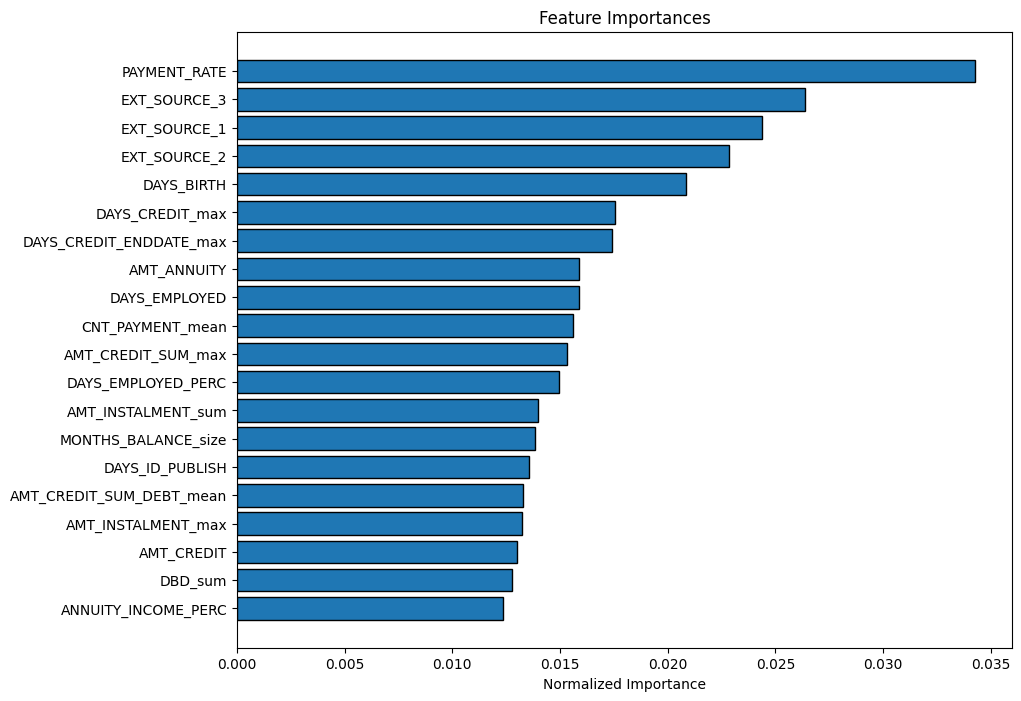

In [ ]:
fi_sorted_2 = plot_feature_importances(fi_3)

In [ ]:
metrics_3

,fold,train,valid
0,0,0.873714,0.785934
1,1,0.871384,0.784491
2,2,0.879914,0.790127
3,3,0.867485,0.788604
4,4,0.871432,0.783625
5,overall,0.872786,0.786545


In [ ]:
submission_3.to_csv('lgb_3.csv', index = False)

In [ ]:
# Find the features with zero importance
zero_features = list(fi_3[fi_3['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
print(zero_features)

There are 4 features with 0.0 importance
['FLAG_DOCUMENT_14', 'ORGANIZATION_TYPE_Realtor', 'ORGANIZATION_TYPE_Tradetype6', 'NAME_CONTRACT_STATUS_Sentproposal_max']


In [ ]:
train_for_lgb = train_for_lgb.drop(columns = zero_features)
test_for_lgb = test_for_lgb.drop(columns = zero_features)

### Feature selection (SHAP) - lgb

In [ ]:
import shap
import time

In [ ]:
# Setting Matplotlib backend to 'inline' for Kaggle Notebook
%matplotlib inline

def shap_analysis_lgb(train, test, sample_size=10000):
    start_time = time.time()

    # Remove special characters to ensure valid column names
    train.columns = train.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

    # Extract labels and remove ID and target columns
    labels = train['TARGET']
    train = train.drop(columns=['SK_ID_CURR', 'TARGET'])

    # Ensure categorical features are correctly converted
    cat_features = [col for col in train.columns if train[col].dtype == 'object']
    for col in cat_features:
        train[col] = train[col].astype('category')

    # Select numeric columns and clean up infinite values
    numeric_cols_train = train.select_dtypes(include=[np.number]).columns
    numeric_cols_test = test.select_dtypes(include=[np.number]).columns
    train[numeric_cols_train] = train[numeric_cols_train].replace([np.inf, -np.inf], np.nan)
    test[numeric_cols_test] = test[numeric_cols_test].replace([np.inf, -np.inf], np.nan)

    # Check cleanup results
    print("Train contains inf after cleaning:", np.any(np.isinf(train[numeric_cols_train])))
    print("Test contains inf after cleaning:", np.any(np.isinf(test[numeric_cols_test])))
    print("Train max value after cleaning:", train[numeric_cols_train].max().max())
    print("Test max value after cleaning:", test[numeric_cols_test].max().max())

    # Train LightGBM model with GPU support
    model = lgb.LGBMClassifier(
        n_estimators=2000,
        objective='binary',
        class_weight='balanced',
        learning_rate=0.010119510186347656,
        max_depth=7,
        num_leaves=49,
        colsample_bytree=0.5002686244776221,
        min_split_gain=0.29634102959637054,
        min_child_weight=96.05001191578458,
        min_child_samples=86,
        bagging_fraction=0.8771636589147171,
        bagging_freq=5,
        reg_alpha=0.0015607404065920859,
        reg_lambda=0.37282609381990106,
        subsample=0.5122895566135851,
        max_bin=126,
        verbose=-1,
        random_state=50,
        device='gpu',
        gpu_platform_id=0,
        gpu_device_id=0
    )

    model.fit(train, labels, categorical_feature=cat_features)
    print(f"\nModel training completed in {(time.time() - start_time) / 60:.2f} minutes.")

    # Randomly sampling a portion of the data for SHAP analysis
    if len(train) > sample_size:
        sampled_indices = np.random.choice(train.index, size=sample_size, replace=False)
        train_sampled = train.loc[sampled_indices]
        labels_sampled = labels.loc[sampled_indices]
    else:
        train_sampled = train
        labels_sampled = labels
    print(f"Using {len(train_sampled)} samples for SHAP analysis.")

    # Create SHAP explainer
    start_shap = time.time()
    explainer = shap.TreeExplainer(model)
    shap_values = explainer(train_sampled)
    print(f"SHAP value computation completed in {(time.time() - start_shap) / 60:.2f} minutes.")

    # Extract the SHAP value for the positive class (TARGET = 1) and make sure it is a numpy array
    shap_values_positive = shap_values[:, :, 1] if shap_values.values.ndim == 3 else shap_values
    # Extract the underlying numeric arrays to avoid SHAP logic.
    if isinstance(shap_values_positive, shap.Explanation):
        shap_values_positive = shap_values_positive.values
    print("shap_values_positive type:", type(shap_values_positive))
    print("shap_values_positive shape:", shap_values_positive.shape)

    # Generate SHAP Summary Plot for TARGET = 1
    start_plot = time.time()
    print("\nSHAP Summary Plot (Impact on TARGET = 1: Default)")
    shap.summary_plot(shap_values_positive, train_sampled, feature_names=train.columns.tolist(), plot_type="dot", max_display=20)
    plt.close()  # Close Chart, Release Resources
    print(f"SHAP Summary Plot completed in {(time.time() - start_plot) / 60:.2f} minutes.")

    # Generate SHAP Feature Importance Bar Plot for TARGET = 1
    start_importance = time.time()
    print("\nSHAP Feature Importance ranking plot (for TARGET = 1)")
    # Make sure shap_values_positive is a numpy array, and calculate it directly
    shap_importance = np.abs(shap_values_positive).mean(axis=0)
    feature_importance_df = pd.DataFrame({
        "feature": train.columns,
        "shap_importance": shap_importance
    }).sort_values(by="shap_importance", ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df["feature"].head(20), feature_importance_df["shap_importance"].head(20), color='skyblue')
    plt.xlabel("Average |SHAP Value| (Impact on Default)")
    plt.ylabel("Feature")
    plt.title("Top 20 SHAP Feature Importance for TARGET = 1 (Default)")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    plt.close()  # Close Chart, Release Resources
    print(f"SHAP Feature Importance Plot completed in {(time.time() - start_importance) / 60:.2f} minutes.")

    # Display SHAP Waterfall Plot for a sample predicted as TARGET = 1
    start_waterfall = time.time()
    default_samples = train_sampled[labels_sampled == 1].index
    if len(default_samples) > 0:
        sample_idx = default_samples[0]
        print(f"\nSHAP Waterfall Plot for sample {sample_idx} (TARGET = 1: Default)")
        # Extract SHAP explanation of a single sample
        single_sample_shap = shap_values[train_sampled.index.get_loc(sample_idx)]
        # Extracts the SHAP value for the positive class (TARGET = 1) and constructs a new Explanation object
        single_sample_shap_positive = shap.Explanation(
            values=single_sample_shap.values[:, 1],  # Extract the SHAP value of the positive class
            base_values=single_sample_shap.base_values[1],  # Extracting the base value of the positive class
            data=single_sample_shap.data,
            feature_names=single_sample_shap.feature_names
        )
        shap.plots.waterfall(single_sample_shap_positive)
        plt.close()  # Close Chart, Release Resources
    else:
        print("\nNo samples with TARGET = 1 found in sampled data.")
    print(f"SHAP Waterfall Plot completed in {(time.time() - start_waterfall) / 60:.2f} minutes.")

    print(f"\nTotal execution time: {(time.time() - start_time) / 60:.2f} minutes.")
    return feature_importance_df

Train contains inf after cleaning: False
Test contains inf after cleaning: False
Train max value after cleaning: 969732915200.0
Test max value after cleaning: 435812597760.0

Model training completed in 1.61 minutes.
Using 10000 samples for SHAP analysis.
SHAP value computation completed in 1.86 minutes.
shap_values_positive type: <class 'numpy.ndarray'>
shap_values_positive shape: (10000, 248)

SHAP Summary Plot (Impact on TARGET = 1: Default)


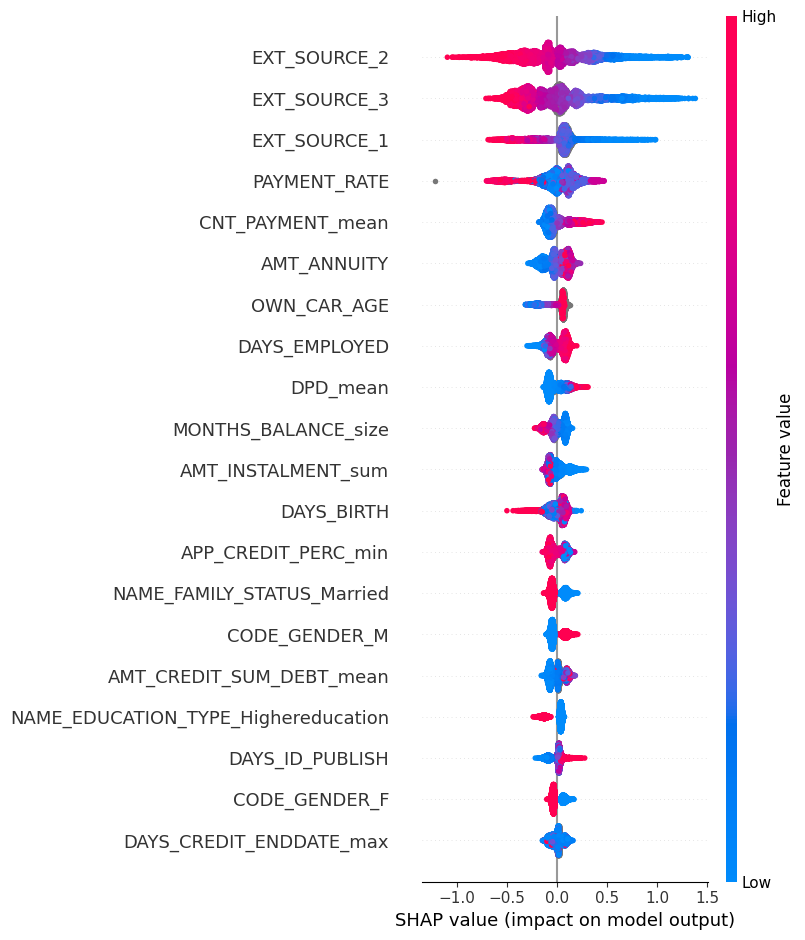

SHAP Summary Plot completed in 0.03 minutes.

SHAP Feature Importance ranking plot (for TARGET = 1)


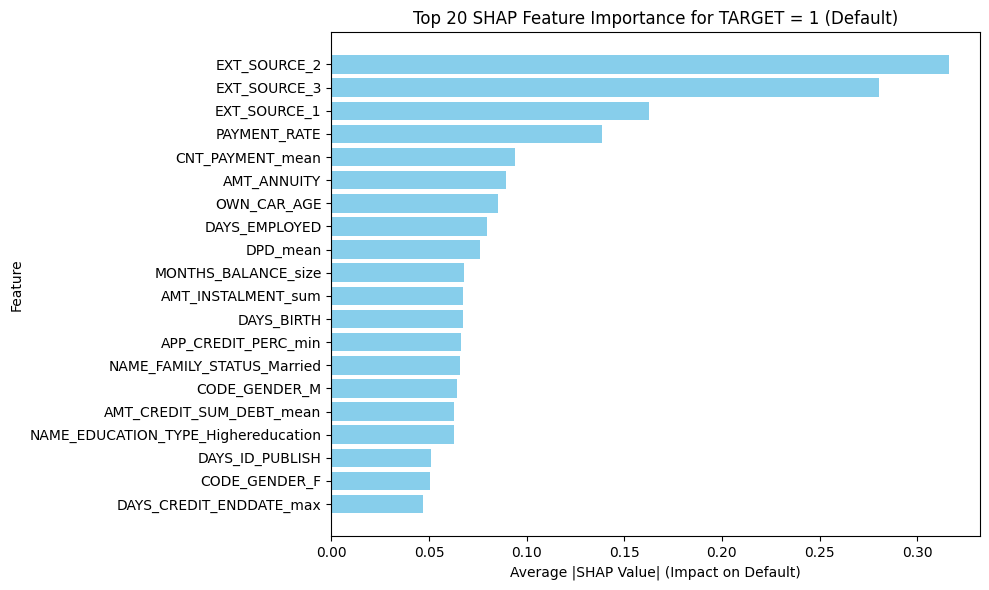

SHAP Feature Importance Plot completed in 0.00 minutes.

SHAP Waterfall Plot for sample 28736 (TARGET = 1: Default)


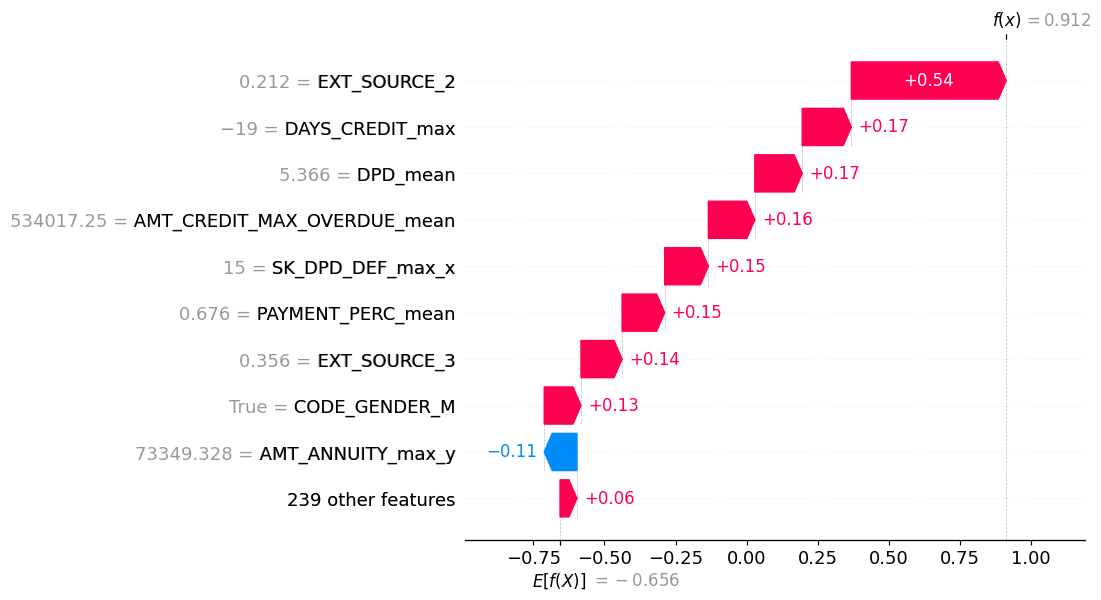

SHAP Waterfall Plot completed in 0.03 minutes.

Total execution time: 3.58 minutes.


In [ ]:
lgb_SHAP_fi =  shap_analysis_lgb(train_for_lgb, test_for_lgb)

In [ ]:
# Find the features of SHAP that have an importance of 0
lgb_zero_shap_features = list(lgb_SHAP_fi[lgb_SHAP_fi['shap_importance'] == 0.0]['feature'])

print(f'{len(lgb_zero_shap_features)} features has 0 importance in SHAP')
print(lgb_zero_shap_features)

6 features has 0 importance in SHAP
['NAME_TYPE_SUITE_Other_A', 'OCCUPATION_TYPE_Cookingstaff', 'ORGANIZATION_TYPE_Security', 'ORGANIZATION_TYPE_Services', 'ORGANIZATION_TYPE_Tradetype7', 'ORGANIZATION_TYPE_Transporttype2']


In [ ]:
train_for_lgb = train_for_lgb.drop(columns = lgb_zero_shap_features)
test_for_lgb = test_for_lgb.drop(columns = lgb_zero_shap_featuress)

In [ ]:
# Setting Matplotlib backend to 'inline' for Kaggle Notebook%matplotlib inline
def shap_analysis_lgb_2(train, test):
    start_time = time.time()

    # Remove special characters to ensure valid column names
    train.columns = train.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

    # Extract labels and remove ID and target columns
    labels = train['TARGET']
    train = train.drop(columns=['SK_ID_CURR', 'TARGET'])

    # Ensure categorical features are correctly converted
    cat_features = [col for col in train.columns if train[col].dtype == 'object']
    for col in cat_features:
        train[col] = train[col].astype('category')

    # Select numeric columns and clean up infinite values
    numeric_cols_train = train.select_dtypes(include=[np.number]).columns
    numeric_cols_test = test.select_dtypes(include=[np.number]).columns
    train[numeric_cols_train] = train[numeric_cols_train].replace([np.inf, -np.inf], np.nan)
    test[numeric_cols_test] = test[numeric_cols_test].replace([np.inf, -np.inf], np.nan)

    # Train LightGBM model with GPU support
    model = lgb.LGBMClassifier(
        n_estimators=2000,
        objective='binary',
        class_weight='balanced',
        learning_rate=0.010119510186347656,
        max_depth=7,
        num_leaves=49,
        colsample_bytree=0.5002686244776221,
        min_split_gain=0.29634102959637054,
        min_child_weight=96.05001191578458,
        min_child_samples=86,
        bagging_fraction=0.8771636589147171,
        bagging_freq=5,
        reg_alpha=0.0015607404065920859,
        reg_lambda=0.37282609381990106,
        subsample=0.5122895566135851,
        max_bin=126,
        verbose=-1,
        random_state=50,
        device='gpu',
        gpu_platform_id=0,
        gpu_device_id=0
    )

    model.fit(train, labels, categorical_feature=cat_features)
    print(f"\nModel training completed in {(time.time() - start_time) / 60:.2f} minutes.")

    # Create SHAP explainer
    start_shap = time.time()
    explainer = shap.TreeExplainer(model)
    shap_values = explainer(train)
    print(f"SHAP value computation completed in {(time.time() - start_shap) / 60:.2f} minutes.")

    # Extract the SHAP value against the positive class (TARGET = 1)
    shap_values_positive = shap_values[:, :, 1].values   # Directly extract an array of values for a positive class

    # Generate SHAP Summary Plot for TARGET = 1
    start_plot = time.time()
    print("\nSHAP Summary Plot (Impact on TARGET = 1: Default)")
    shap.summary_plot(shap_values_positive, train, feature_names=train.columns.tolist(), plot_type="dot", max_display=20)
    plt.close()
    print(f"SHAP Summary Plot completed in {(time.time() - start_plot) / 60:.2f} minutes.")

    # Generate SHAP Feature Importance Bar Plot for TARGET = 1
    start_importance = time.time()
    print("\nSHAP Feature Importance ranking plot (for TARGET = 1)")
    shap_importance = np.abs(shap_values_positive).mean(axis=0)
    feature_importance_df = pd.DataFrame({
        "feature": train.columns,
        "shap_importance": shap_importance
    }).sort_values(by="shap_importance", ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df["feature"].head(20), feature_importance_df["shap_importance"].head(20), color='skyblue')
    plt.xlabel("Average |SHAP Value| (Impact on Default)")
    plt.ylabel("Feature")
    plt.title("Top 20 SHAP Feature Importance for TARGET = 1 (Default)")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    plt.close()
    print(f"SHAP Feature Importance Plot completed in {(time.time() - start_importance) / 60:.2f} minutes.")

    # Display SHAP Waterfall Plot for a sample predicted as TARGET = 1
    start_waterfall = time.time()
    default_samples = train[labels == 1].index
    sample_idx = default_samples[0]
    print(f"\nSHAP Waterfall Plot for sample {sample_idx} (TARGET = 1: Default)")
    single_sample_shap = shap_values[train.index.get_loc(sample_idx)]
    single_sample_shap_positive = shap.Explanation(
        values=single_sample_shap.values[:, 1],
        base_values=single_sample_shap.base_values[1],
        data=single_sample_shap.data,
        feature_names=single_sample_shap.feature_names
    )
    shap.plots.waterfall(single_sample_shap_positive)
    plt.close()
    print(f"SHAP Waterfall Plot completed in {(time.time() - start_waterfall) / 60:.2f} minutes.")

    print(f"\nTotal execution time: {(time.time() - start_time) / 60:.2f} minutes.")
    return feature_importance_df


Model training completed in 1.60 minutes.
SHAP value computation completed in 56.36 minutes.

SHAP Summary Plot (Impact on TARGET = 1: Default)


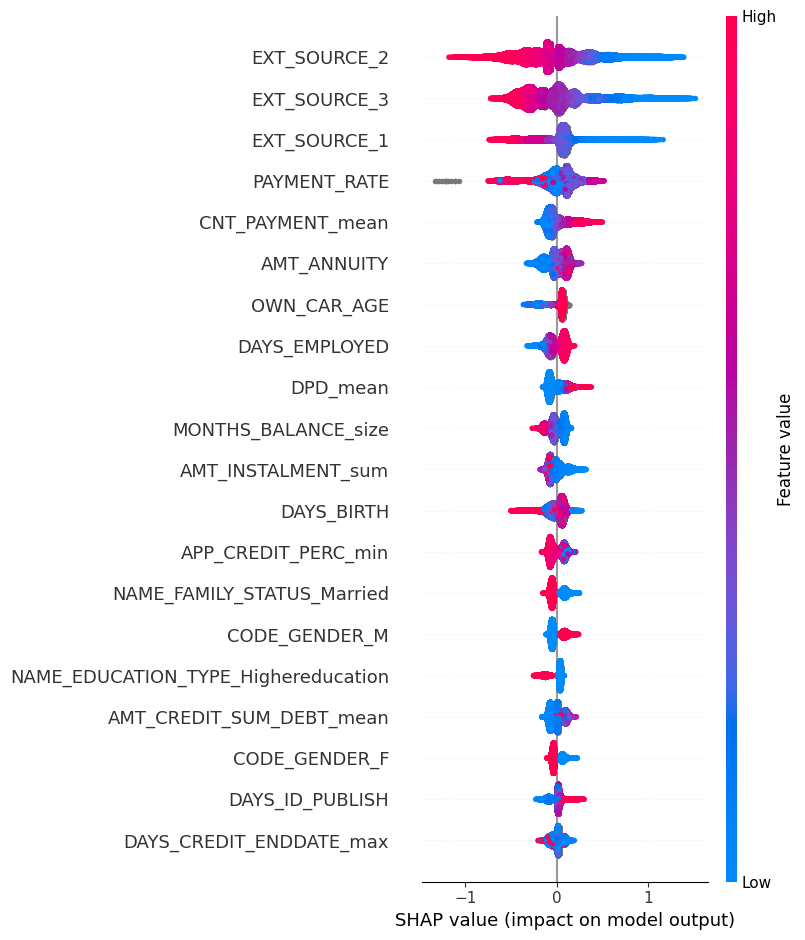

SHAP Summary Plot completed in 0.66 minutes.

SHAP Feature Importance ranking plot (for TARGET = 1)


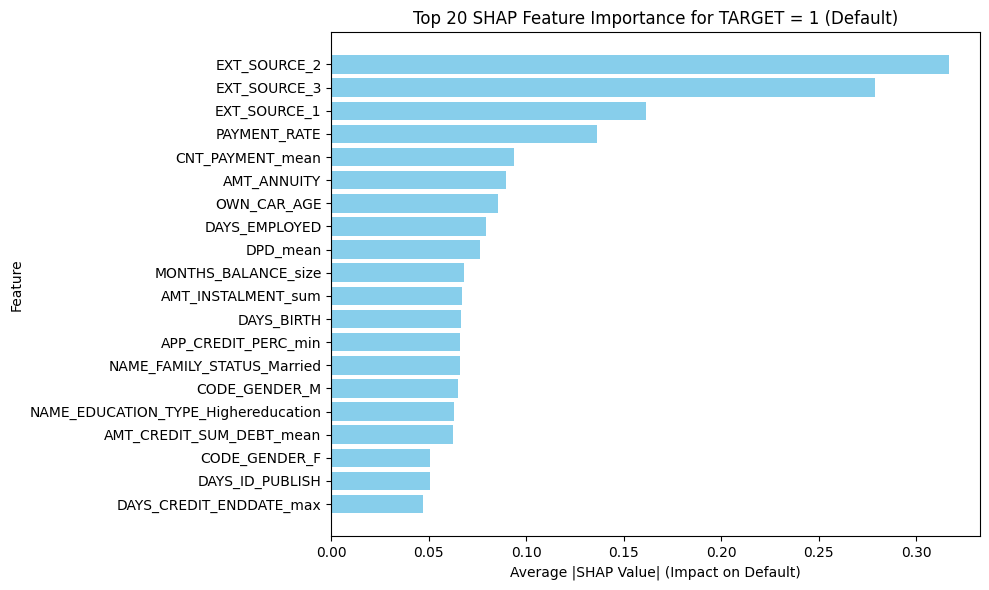

SHAP Feature Importance Plot completed in 0.01 minutes.

SHAP Waterfall Plot for sample 0 (TARGET = 1: Default)


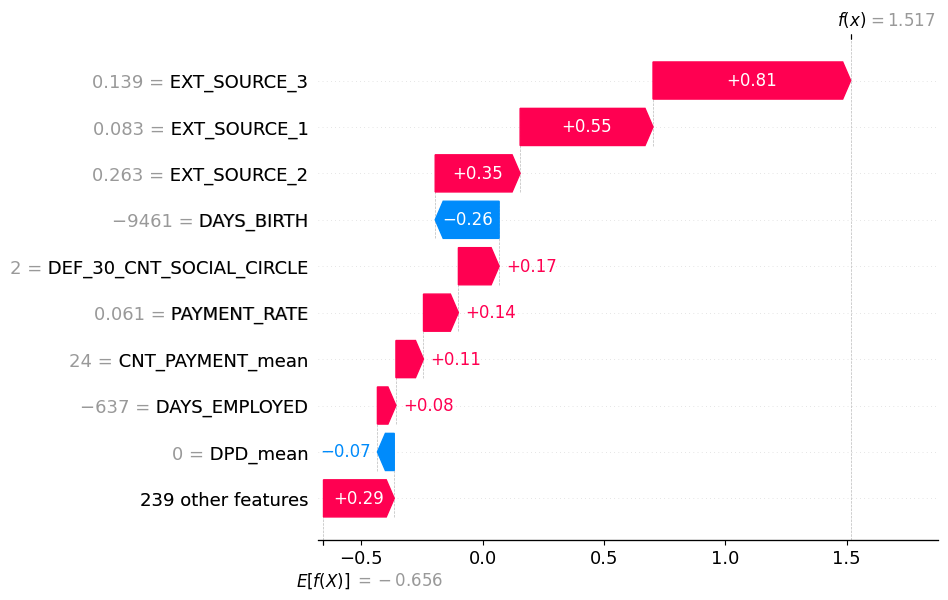

SHAP Waterfall Plot completed in 0.64 minutes.

Total execution time: 60.55 minutes.


In [ ]:
lgb_SHAP_fi_2 =  shap_analysis_lgb_2(train_for_lgb, test_for_lgb)

In [ ]:
# Find the features of SHAP that have an importance of 0
lgb_zero_shap_features_2 = list(lgb_SHAP_fi_2[lgb_SHAP_fi_2['shap_importance'] == 0.0]['feature'])

print(f'{len(lgb_zero_shap_features)} features has 0 importance in SHAP')
print(lgb_zero_shap_features)

6 features has 0 importance in SHAP
['ORGANIZATION_TYPE_Transporttype2', 'OCCUPATION_TYPE_Cookingstaff', 'ORGANIZATION_TYPE_Security', 'NAME_TYPE_SUITE_Other_A', 'ORGANIZATION_TYPE_Services', 'ORGANIZATION_TYPE_Tradetype7']


In [ ]:
train_for_lgb = train_for_lgb.drop(columns = lgb_zero_shap_features_2)
test_for_lgb = test_for_lgb.drop(columns = lgb_zero_shap_features_2)

### LightGBM (After SHAP analysis)

In [ ]:
def model_LightGBM_4(train, test, n_folds=5):
    # Remove special characters
    train.columns = train.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)
    test.columns = test.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

    # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']

    # Extract the labels for training
    labels = train['TARGET']

    # Remove the ids and target
    train = train.drop(columns=['SK_ID_CURR', 'TARGET'])
    test = test.drop(columns=['SK_ID_CURR'])

    # Identify categorical features and convert them to 'category' type
    cat_features = [col for col in train.columns if train[col].dtype == 'object']
    for col in cat_features:
        train[col] = train[col].astype('category')
        test[col] = test[col].astype('category')

    print('Training Data Shape: ', train.shape)
    print('Testing Data Shape: ', test.shape)

    # Create the kfold object
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)

    # Empty array for feature importances
    feature_importance_values = np.zeros(len(train.columns))

    # Empty array for test predictions
    test_predictions = np.zeros(test.shape[0])

    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(train.shape[0])

    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    evals_result_list = []
    model = None

    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(train):
        # Training data for the fold
        train_features, train_labels = train.iloc[train_indices], labels.iloc[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = train.iloc[valid_indices], labels.iloc[valid_indices]

        # Create the model with adjusted parameters to reduce overfitting
        model = lgb.LGBMClassifier(
            n_estimators=10000,
            objective='binary',
            class_weight='balanced',
            learning_rate=0.010119510186347656,
            max_depth=6,
            num_leaves=49,
            colsample_bytree=0.5002686244776221,
            min_split_gain=0.29634102959637054,
            min_child_weight=96.05001191578458,
            min_child_samples=86,
            bagging_fraction=0.8771636589147171,
            bagging_freq=5,
            reg_alpha=0.0015607404065920859,
            reg_lambda=0.37282609381990106,
            subsample=0.5122895566135851,
            max_bin=126,
            verbose=-1,
            random_state=50,
            device='gpu',
            gpu_platform_id=0,
            gpu_device_id=0
        )

        # Train the model
        model.fit(
            train_features, train_labels,
            eval_metric='auc',
            eval_set=[(valid_features, valid_labels), (train_features, train_labels)],
            eval_names=['valid', 'train'],
            categorical_feature=cat_features,
            callbacks=[lgb.early_stopping(50), lgb.log_evaluation(50)]
        )

        evals_result_list.append(model.evals_result_)

        # Record the best iteration
        best_iteration = model.best_iteration_

        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits

        # Make predictions
        test_predictions += model.predict_proba(test, num_iteration=best_iteration)[:, 1] / k_fold.n_splits

        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration=best_iteration)[:, 1]

        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']

        valid_scores.append(valid_score)
        train_scores.append(train_score)

        # Clean up memory
        gc.enable()
        del train_features, valid_features
        gc.collect()

    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})

    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': train.columns, 'importance': feature_importance_values})

    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)

    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))

    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')

    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names, 'train': train_scores, 'valid': valid_scores})

    return submission, feature_importances, metrics, out_of_fold, test_predictions, model, evals_result_list

In [ ]:
submission_4, fi_4, metrics_4, out_of_fold_4, test_predictions_4, model_4, evals_result_list_4 = model_LightGBM_4(train_for_lgb, test_for_lgb)

Training Data Shape:  (307511, 242)
Testing Data Shape:  (48744, 242)
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.766209	train's binary_logloss: 0.64613	valid's auc: 0.747628	valid's binary_logloss: 0.647022
[100]	train's auc: 0.772838	train's binary_logloss: 0.61729	valid's auc: 0.752673	valid's binary_logloss: 0.619342
[150]	train's auc: 0.779419	train's binary_logloss: 0.598635	valid's auc: 0.757688	valid's binary_logloss: 0.601811
[200]	train's auc: 0.784045	train's binary_logloss: 0.585288	valid's auc: 0.761187	valid's binary_logloss: 0.589336
[250]	train's auc: 0.788552	train's binary_logloss: 0.575343	valid's auc: 0.764157	valid's binary_logloss: 0.580063
[300]	train's auc: 0.793047	train's binary_logloss: 0.567506	valid's auc: 0.766708	valid's binary_logloss: 0.573287
[350]	train's auc: 0.79699	train's binary_logloss: 0.56093	valid's auc: 0.768899	valid's binary_logloss: 0.567687
[400]	train's auc: 0.800634	train's binary_logloss: 0.555381	v

In [ ]:
metrics_4

,fold,train,valid
0,0,0.862952,0.786309
1,1,0.848785,0.784026
2,2,0.863844,0.789497
3,3,0.862848,0.788388
4,4,0.854562,0.783258
5,overall,0.858598,0.786284


In [ ]:
submission_4.to_csv('lgb_4.csv', index = False)

### XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
def model_XGBoost_1(train, test, n_folds=5):
    # Remove special characters from column names
    train.columns = train.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)
    test.columns = test.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

    # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']

    # Extract the labels for training
    labels = train['TARGET']

    # Remove the ids and target
    train = train.drop(columns=['SK_ID_CURR', 'TARGET'])
    test = test.drop(columns=['SK_ID_CURR'])

    # Identify categorical features and convert them to category dtype
    cat_features = [col for col in train.columns if train[col].dtype == 'object']
    for col in cat_features:
        train[col] = train[col].astype('category')
        test[col] = test[col].astype('category')

    # Select numeric columns and clean up the inf
    numeric_cols_train = train.select_dtypes(include=[np.number]).columns
    numeric_cols_test = test.select_dtypes(include=[np.number]).columns
    train[numeric_cols_train] = train[numeric_cols_train].replace([np.inf, -np.inf], np.nan)
    test[numeric_cols_test] = test[numeric_cols_test].replace([np.inf, -np.inf], np.nan)

    # Check the cleanup results
    print("Train contains inf after cleaning:", np.any(np.isinf(train[numeric_cols_train])))
    print("Test contains inf after cleaning:", np.any(np.isinf(test[numeric_cols_test])))
    print("Train max value after cleaning:", train[numeric_cols_train].max().max())
    print("Test max value after cleaning:", test[numeric_cols_test].max().max())

    print('Training Data Shape: ', train.shape)
    print('Testing Data Shape: ', test.shape)

    # Create the kfold object
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)

    # Empty array for feature importances
    feature_importance_values = np.zeros(len(train.columns))

    # Empty array for test predictions
    test_predictions = np.zeros(test.shape[0])

    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(train.shape[0])

    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    model = None

    # Iterate through each fold
    for fold_idx, (train_indices, valid_indices) in enumerate(k_fold.split(train)):
        print(f"\nFold {fold_idx + 1}/{n_folds}")

        # Training data for the fold
        train_features, train_labels = train.iloc[train_indices], labels.iloc[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = train.iloc[valid_indices], labels.iloc[valid_indices]

        # Create the model
        model = xgb.XGBClassifier(
            n_estimators=10000,
            objective='binary:logistic',
            learning_rate=0.02,
            max_depth=5,
            min_child_weight=30,
            colsample_bytree=0.78,
            subsample=0.98,
            gamma=0.01,
            reg_alpha=0.15,
            reg_lambda=0.3,
            random_state=50,
            enable_categorical=True,
            tree_method='gpu_hist',
            scale_pos_weight=sum(train_labels==0)/sum(train_labels==1)
        )

        # Train the model
        model.fit(
            train_features, train_labels,
            eval_metric=['auc', 'logloss'],
            eval_set=[(train_features, train_labels), (valid_features, valid_labels)],
            early_stopping_rounds=100,
            verbose=100
        )

        # Record the best iteration
        best_iteration = model.best_iteration

        # Obtaining evaluation results for training and validation
        evals_result = model.evals_result()
        train_auc = evals_result['validation_0']['auc'][best_iteration]
        train_logloss = evals_result['validation_0']['logloss'][best_iteration]
        valid_auc = evals_result['validation_1']['auc'][best_iteration]
        valid_logloss = evals_result['validation_1']['logloss'][best_iteration]

        # Print Early Stopping Information
        print(f"Early stopping, best iteration is:")
        print(f"[{best_iteration}] train's auc: {train_auc:.6f} train's binary_logloss: {train_logloss:.6f} "
              f"valid's auc: {valid_auc:.6f} valid's binary_logloss: {valid_logloss:.6f}")

        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits

        # Make predictions
        test_predictions += model.predict_proba(test)[:, 1] / k_fold.n_splits

        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features)[:, 1]

        # Record the best score
        valid_score = roc_auc_score(valid_labels, model.predict_proba(valid_features)[:, 1])
        train_score = roc_auc_score(train_labels, model.predict_proba(train_features)[:, 1])

        valid_scores.append(valid_score)
        train_scores.append(train_score)

        # Clean up memory
        gc.enable()
        del train_features, valid_features
        gc.collect()

    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})

    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': train.columns, 'importance': feature_importance_values})

    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)

    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))

    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')

    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                           'train': train_scores,
                           'valid': valid_scores})

    return submission, feature_importances, metrics, model

In [ ]:
submission_4, fi_4, metrics_4, model_4 = model_XGBoost_1(train_for_lgb, test_for_lgb)

Train contains inf after cleaning: False
Test contains inf after cleaning: False
Train max value after cleaning: 969732915200.0
Test max value after cleaning: 435812597760.0
Training Data Shape:  (307511, 242)
Testing Data Shape:  (48744, 242)

Fold 1/5
[0]	validation_0-auc:0.66548	validation_0-logloss:0.69144	validation_1-auc:0.65125	validation_1-logloss:0.69148
[100]	validation_0-auc:0.76704	validation_0-logloss:0.59339	validation_1-auc:0.75126	validation_1-logloss:0.59605
[200]	validation_0-auc:0.78847	validation_0-logloss:0.56702	validation_1-auc:0.76622	validation_1-logloss:0.57187
[300]	validation_0-auc:0.80081	validation_0-logloss:0.55230	validation_1-auc:0.77252	validation_1-logloss:0.55912
[400]	validation_0-auc:0.80932	validation_0-logloss:0.54255	validation_1-auc:0.77578	validation_1-logloss:0.55101
[500]	validation_0-auc:0.81612	validation_0-logloss:0.53501	validation_1-auc:0.77792	validation_1-logloss:0.54501
[600]	validation_0-auc:0.82208	validation_0-logloss:0.52851	vali

In [ ]:
plot_feature_importances(model_4)

In [ ]:
metrics_4

,fold,train,valid
0,0,0.981085,0.773569
1,1,0.981811,0.771392
2,2,0.981443,0.776340
3,3,0.981937,0.773846
4,4,0.981397,0.769842
5,overall,0.981535,0.772986


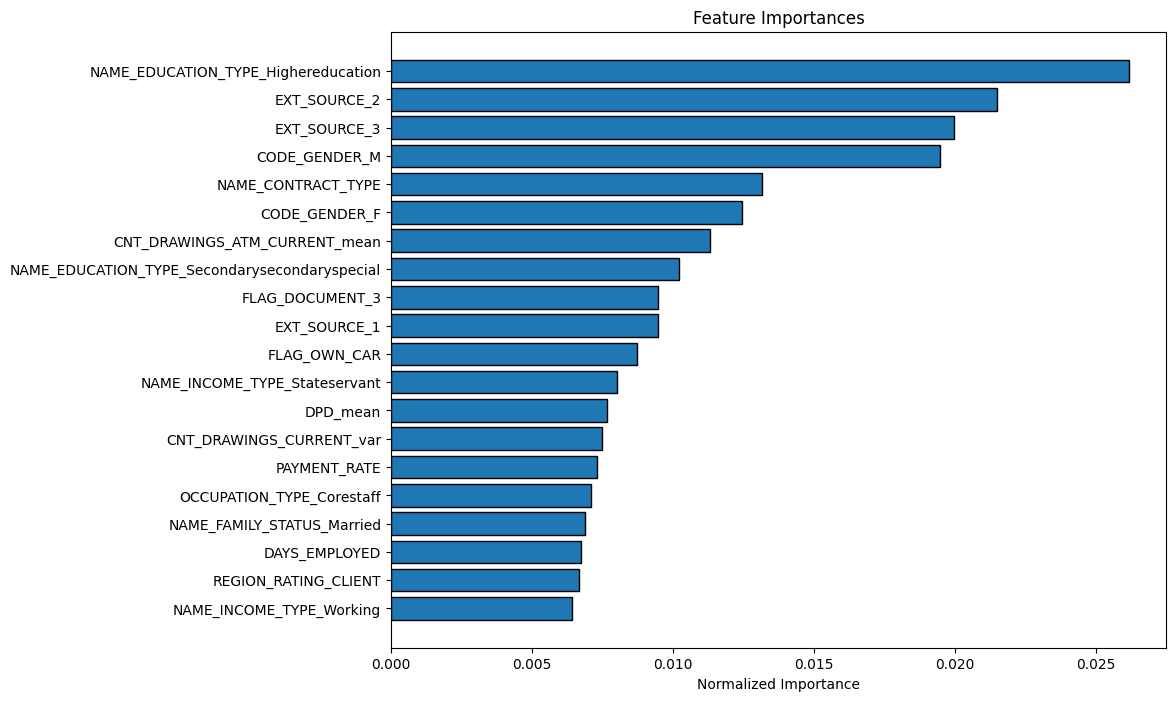

In [ ]:
fi_sorted_4 = plot_feature_importances(fi_4)

In [ ]:
# Find the features with zero importance
zero_features_4 = list(fi_4[fi_4['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features_4))

There are 0 features with 0.0 importance


In [ ]:
submission_4.to_csv('xgb_1.csv', index = False)

In [ ]:
def model_XGBoost_2(train, test, n_folds=5):
    # Remove special characters from column names
    train.columns = train.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)
    test.columns = test.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

    # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']

    # Extract the labels for training
    labels = train['TARGET']

    # Remove the ids and target
    train = train.drop(columns=['SK_ID_CURR', 'TARGET'])
    test = test.drop(columns=['SK_ID_CURR'])

    # Identify categorical features and convert them to category dtype
    cat_features = [col for col in train.columns if train[col].dtype == 'object']
    for col in cat_features:
        train[col] = train[col].astype('category')
        test[col] = test[col].astype('category')

    # Select numeric columns and clean up the inf
    numeric_cols_train = train.select_dtypes(include=[np.number]).columns
    numeric_cols_test = test.select_dtypes(include=[np.number]).columns
    train[numeric_cols_train] = train[numeric_cols_train].replace([np.inf, -np.inf], np.nan)
    test[numeric_cols_test] = test[numeric_cols_test].replace([np.inf, -np.inf], np.nan)

    # Check the cleanup results
    print("Train contains inf after cleaning:", np.any(np.isinf(train[numeric_cols_train])))
    print("Test contains inf after cleaning:", np.any(np.isinf(test[numeric_cols_test])))
    print("Train max value after cleaning:", train[numeric_cols_train].max().max())
    print("Test max value after cleaning:", test[numeric_cols_test].max().max())

    print('Training Data Shape: ', train.shape)
    print('Testing Data Shape: ', test.shape)

    # Create the kfold object
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)

    # Empty array for feature importances
    feature_importance_values = np.zeros(len(train.columns))

    # Empty array for test predictions
    test_predictions = np.zeros(test.shape[0])

    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(train.shape[0])

    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    model = None

    # Iterate through each fold
    for fold_idx, (train_indices, valid_indices) in enumerate(k_fold.split(train)):
        print(f"\nFold {fold_idx + 1}/{n_folds}")

        # Training data for the fold
        train_features, train_labels = train.iloc[train_indices], labels.iloc[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = train.iloc[valid_indices], labels.iloc[valid_indices]

        # Create the model
        model = xgb.XGBClassifier(
            n_estimators=4000,
            objective='binary:logistic',
            learning_rate=0.02,
            max_depth=4,
            min_child_weight=50,
            colsample_bytree=0.85,
            subsample=0.98,
            gamma=0.2,
            reg_alpha=0.2,
            reg_lambda=1,
            random_state=50,
            enable_categorical=True,
            tree_method='gpu_hist',
            scale_pos_weight=7
        )

        # Train the model
        model.fit(
            train_features, train_labels,
            eval_metric=['auc', 'logloss'],
            eval_set=[(train_features, train_labels), (valid_features, valid_labels)],
            early_stopping_rounds=100,
            verbose=100
        )

        # Record the best iteration
        best_iteration = model.best_iteration

        # Obtaining evaluation results for training and validation
        evals_result = model.evals_result()
        train_auc = evals_result['validation_0']['auc'][best_iteration]
        train_logloss = evals_result['validation_0']['logloss'][best_iteration]
        valid_auc = evals_result['validation_1']['auc'][best_iteration]
        valid_logloss = evals_result['validation_1']['logloss'][best_iteration]

        # Print Early Stopping Information
        print(f"Early stopping, best iteration is:")
        print(f"[{best_iteration}] train's auc: {train_auc:.6f} train's binary_logloss: {train_logloss:.6f} "
              f"valid's auc: {valid_auc:.6f} valid's binary_logloss: {valid_logloss:.6f}")

        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits

        # Make predictions
        test_predictions += model.predict_proba(test)[:, 1] / k_fold.n_splits

        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features)[:, 1]

        # Record the best score
        valid_score = roc_auc_score(valid_labels, model.predict_proba(valid_features)[:, 1])
        train_score = roc_auc_score(train_labels, model.predict_proba(train_features)[:, 1])

        valid_scores.append(valid_score)
        train_scores.append(train_score)

        # Clean up memory
        gc.enable()
        del train_features, valid_features
        gc.collect()

    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})

    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': train.columns, 'importance': feature_importance_values})

    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)

    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))

    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')

    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                           'train': train_scores,
                           'valid': valid_scores})

    return submission, feature_importances, metrics, out_of_fold, test_predictions, model

In [ ]:
submission_5, fi_5, metrics_5, out_of_fold_5, test_predictions_5, model_5 = model_XGBoost_2(train_for_lgb, test_for_lgb)

Train contains inf after cleaning: False
Test contains inf after cleaning: False
Train max value after cleaning: 969732915200.0
Test max value after cleaning: 435812597760.0
Training Data Shape:  (307511, 242)
Testing Data Shape:  (48744, 242)

Fold 1/5
[0]	validation_0-auc:0.68172	validation_0-logloss:0.52088	validation_1-auc:0.67533	validation_1-logloss:0.52034
[100]	validation_0-auc:0.75324	validation_0-logloss:0.45928	validation_1-auc:0.74339	validation_1-logloss:0.46030
[200]	validation_0-auc:0.77421	validation_0-logloss:0.44228	validation_1-auc:0.76096	validation_1-logloss:0.44452
[300]	validation_0-auc:0.78491	validation_0-logloss:0.43318	validation_1-auc:0.76845	validation_1-logloss:0.43645
[400]	validation_0-auc:0.79187	validation_0-logloss:0.42727	validation_1-auc:0.77266	validation_1-logloss:0.43141
[500]	validation_0-auc:0.79705	validation_0-logloss:0.42305	validation_1-auc:0.77537	validation_1-logloss:0.42800
[600]	validation_0-auc:0.80125	validation_0-logloss:0.41967	vali

In [ ]:
metrics_5

,fold,train,valid
0,0,0.874870,0.785189
1,1,0.875980,0.784544
2,2,0.875601,0.789186
3,3,0.874648,0.787130
4,4,0.875539,0.782302
5,overall,0.875328,0.785657


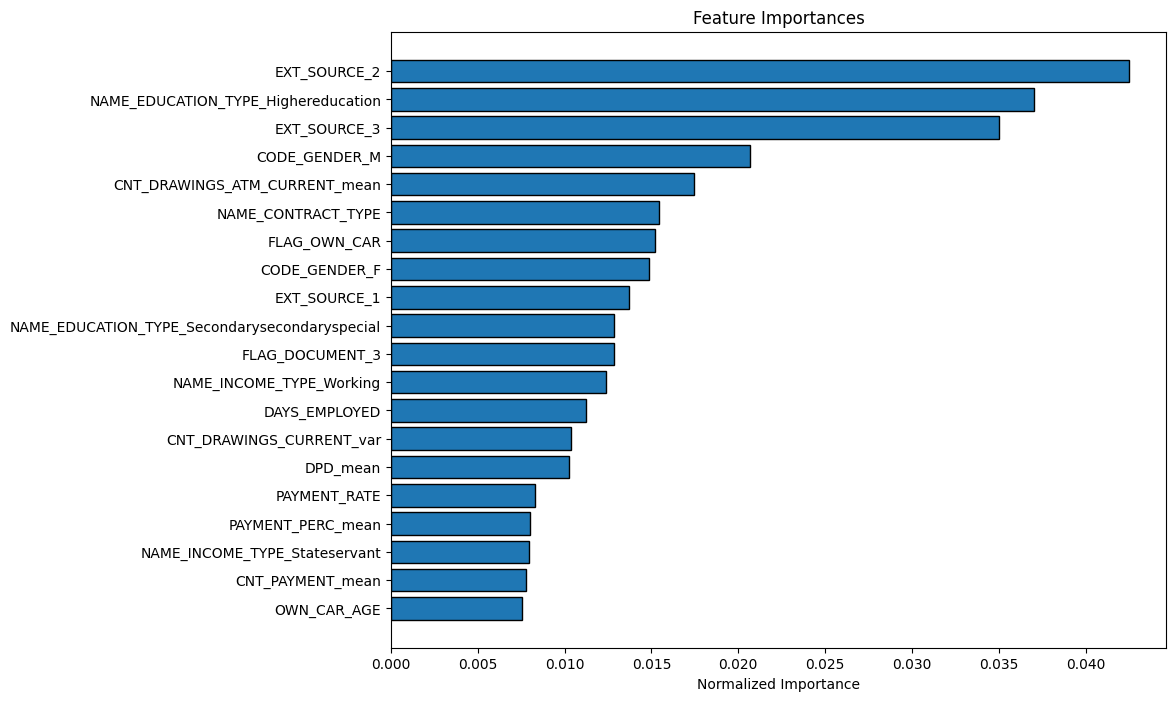

In [ ]:
fi_sorted_5 = plot_feature_importances(fi_5)

In [ ]:
# Find the features with zero importance
zero_features_5 = list(fi_5[fi_5['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features_5))

There are 0 features with 0.0 importance


In [ ]:
submission_5.to_csv('xgb_2.csv', index = False)

In [ ]:
def model_XGBoost_3(train, test, n_folds=5):
    # Remove special characters from column names
    train.columns = train.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)
    test.columns = test.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

    # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']

    # Extract the labels for training
    labels = train['TARGET']

    # Remove the ids and target
    train = train.drop(columns=['SK_ID_CURR', 'TARGET'])
    test = test.drop(columns=['SK_ID_CURR'])

    # Identify categorical features and convert them to category dtype
    cat_features = [col for col in train.columns if train[col].dtype == 'object']
    for col in cat_features:
        train[col] = train[col].astype('category')
        test[col] = test[col].astype('category')

    # Select numeric columns and clean up the inf
    numeric_cols_train = train.select_dtypes(include=[np.number]).columns
    numeric_cols_test = test.select_dtypes(include=[np.number]).columns
    train[numeric_cols_train] = train[numeric_cols_train].replace([np.inf, -np.inf], np.nan)
    test[numeric_cols_test] = test[numeric_cols_test].replace([np.inf, -np.inf], np.nan)

    # Check the cleanup results
    print("Train contains inf after cleaning:", np.any(np.isinf(train[numeric_cols_train])))
    print("Test contains inf after cleaning:", np.any(np.isinf(test[numeric_cols_test])))
    print("Train max value after cleaning:", train[numeric_cols_train].max().max())
    print("Test max value after cleaning:", test[numeric_cols_test].max().max())

    print('Training Data Shape: ', train.shape)
    print('Testing Data Shape: ', test.shape)

    # Create the kfold object
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)

    # Empty array for feature importances
    feature_importance_values = np.zeros(len(train.columns))

    # Empty array for test predictions
    test_predictions = np.zeros(test.shape[0])

    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(train.shape[0])

    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    model = None

    # Iterate through each fold
    for fold_idx, (train_indices, valid_indices) in enumerate(k_fold.split(train)):
        print(f"\nFold {fold_idx + 1}/{n_folds}")

        # Training data for the fold
        train_features, train_labels = train.iloc[train_indices], labels.iloc[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = train.iloc[valid_indices], labels.iloc[valid_indices]

        # Create the model
        model = xgb.XGBClassifier(
            n_estimators=3500,
            objective='binary:logistic',
            learning_rate=0.02,
            max_depth=3,
            min_child_weight=50,
            colsample_bytree=0.85,
            subsample=0.98,
            gamma=0.4,
            reg_alpha=0.2,
            reg_lambda=1.5,
            random_state=50,
            enable_categorical=True,
            tree_method='gpu_hist',
            scale_pos_weight=6
        )

        # Train the model
        model.fit(
            train_features, train_labels,
            eval_metric=['auc', 'logloss'],
            eval_set=[(train_features, train_labels), (valid_features, valid_labels)],
            early_stopping_rounds=100,
            verbose=100
        )

        # Record the best iteration
        best_iteration = model.best_iteration

        # Obtaining evaluation results for training and validation
        evals_result = model.evals_result()
        train_auc = evals_result['validation_0']['auc'][best_iteration]
        train_logloss = evals_result['validation_0']['logloss'][best_iteration]
        valid_auc = evals_result['validation_1']['auc'][best_iteration]
        valid_logloss = evals_result['validation_1']['logloss'][best_iteration]

        # Print Early Stopping Information
        print(f"Early stopping, best iteration is:")
        print(f"[{best_iteration}] train's auc: {train_auc:.6f} train's binary_logloss: {train_logloss:.6f} "
              f"valid's auc: {valid_auc:.6f} valid's binary_logloss: {valid_logloss:.6f}")

        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits

        # Make predictions
        test_predictions += model.predict_proba(test)[:, 1] / k_fold.n_splits

        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features)[:, 1]

        # Record the best score
        valid_score = roc_auc_score(valid_labels, model.predict_proba(valid_features)[:, 1])
        train_score = roc_auc_score(train_labels, model.predict_proba(train_features)[:, 1])

        valid_scores.append(valid_score)
        train_scores.append(train_score)

        # Clean up memory
        gc.enable()
        del train_features, valid_features
        gc.collect()

    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})

    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': train.columns, 'importance': feature_importance_values})

    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)

    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))

    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')

    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                           'train': train_scores,
                           'valid': valid_scores})

    return submission, feature_importances, metrics, model

In [ ]:
submission_6, fi_6, metrics_6, model_6 = model_XGBoost_3(train_for_lgb, test_for_lgb)

Train contains inf after cleaning: False
Test contains inf after cleaning: False
Train max value after cleaning: 969732915200.0
Test max value after cleaning: 435812597760.0
Training Data Shape:  (307511, 242)
Testing Data Shape:  (48744, 242)

Fold 1/5
[0]	validation_0-auc:0.66492	validation_0-logloss:0.48038	validation_1-auc:0.65734	validation_1-logloss:0.47967
[100]	validation_0-auc:0.74148	validation_0-logloss:0.42898	validation_1-auc:0.73456	validation_1-logloss:0.42931
[200]	validation_0-auc:0.76192	validation_0-logloss:0.41481	validation_1-auc:0.75384	validation_1-logloss:0.41558
[300]	validation_0-auc:0.77171	validation_0-logloss:0.40737	validation_1-auc:0.76215	validation_1-logloss:0.40870
[400]	validation_0-auc:0.77804	validation_0-logloss:0.40257	validation_1-auc:0.76694	validation_1-logloss:0.40442
[500]	validation_0-auc:0.78256	validation_0-logloss:0.39912	validation_1-auc:0.77020	validation_1-logloss:0.40139
[600]	validation_0-auc:0.78605	validation_0-logloss:0.39654	vali

In [ ]:
metrics_6

,fold,train,valid
0,0,0.828829,0.784605
1,1,0.829467,0.783904
2,2,0.828778,0.788814
3,3,0.828292,0.787629
4,4,0.829126,0.782814
5,overall,0.828898,0.785542


In [ ]:
submission_6.to_csv('xgb_3.csv', index = False)

### Feature selection (SHAP) - xgb

In [ ]:
def shap_analysis_xgb(train, test):

    # Remove special characters to ensure valid column names
    train.columns = train.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

    # Extract labels and remove ID and target columns
    labels = train['TARGET']
    train = train.drop(columns=['SK_ID_CURR', 'TARGET'])

    # Ensure categorical features are correctly converted
    cat_features = [col for col in train.columns if train[col].dtype == 'object']
    for col in cat_features:
        train[col] = train[col].astype('category')

    # Select numeric columns and clean up infinite values
    numeric_cols_train = train.select_dtypes(include=[np.number]).columns
    numeric_cols_test = test.select_dtypes(include=[np.number]).columns
    train[numeric_cols_train] = train[numeric_cols_train].replace([np.inf, -np.inf], np.nan)
    test[numeric_cols_test] = test[numeric_cols_test].replace([np.inf, -np.inf], np.nan)

    # Check cleanup results
    print("Train contains inf after cleaning:", np.any(np.isinf(train[numeric_cols_train])))
    print("Test contains inf after cleaning:", np.any(np.isinf(test[numeric_cols_test])))
    print("Train max value after cleaning:", train[numeric_cols_train].max().max())
    print("Test max value after cleaning:", test[numeric_cols_test].max().max())

    # Train XGBoost model
    model = xgb.XGBClassifier(
        n_estimators=4000,
        objective='binary:logistic',
        learning_rate=0.02,
        max_depth=4,
        min_child_weight=50,
        colsample_bytree=0.85,
        subsample=0.98,
        gamma=0.2,
        reg_alpha=0.2,
        reg_lambda=1,
        random_state=50,
        enable_categorical=True,
        tree_method='gpu_hist',
        scale_pos_weight=7
    )

    model.fit(train, labels)
    print("\nModel training completed. Starting SHAP value computation...")

    # Create SHAP explainer
    explainer = shap.Explainer(model)
    shap_values = explainer(train)

    # Generate SHAP Summary Plot
    print("\nSHAP Summary Plot")
    shap.summary_plot(shap_values, train)

    # Generate SHAP Feature Importance Bar Plot
    print("\nSHAP Feature Importance ranking plot")
    shap_importance = np.abs(shap_values.values).mean(axis=0)
    feature_importance_df = pd.DataFrame({
        "feature": train.columns,
        "shap_importance": shap_importance
    }).sort_values(by="shap_importance", ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df["feature"].head(20), feature_importance_df["shap_importance"].head(20), color='skyblue')
    plt.xlabel("Average |SHAP Value|")
    plt.ylabel("Feature")
    plt.title("Top 20 SHAP Feature Importance")
    plt.gca().invert_yaxis()
    plt.show()

    # Display SHAP Waterfall Plot (for the 10th sample)
    print("\nSHAP Waterfall Plot (for the 10th sample)")
    shap.plots.waterfall(shap_values[10])

    return feature_importance_df


Train contains inf after cleaning: False
Test contains inf after cleaning: False
Train max value after cleaning: 969732915200.0
Test max value after cleaning: 435812597760.0

Model training completed. Starting SHAP value computation...

SHAP Summary Plot


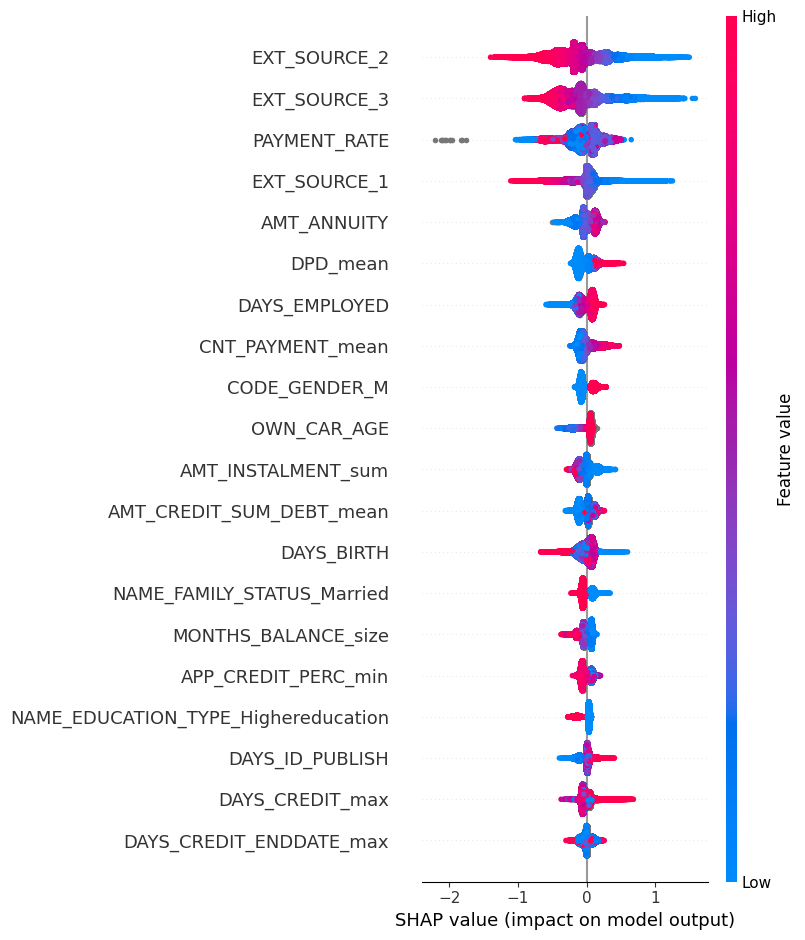


SHAP Feature Importance ranking plot


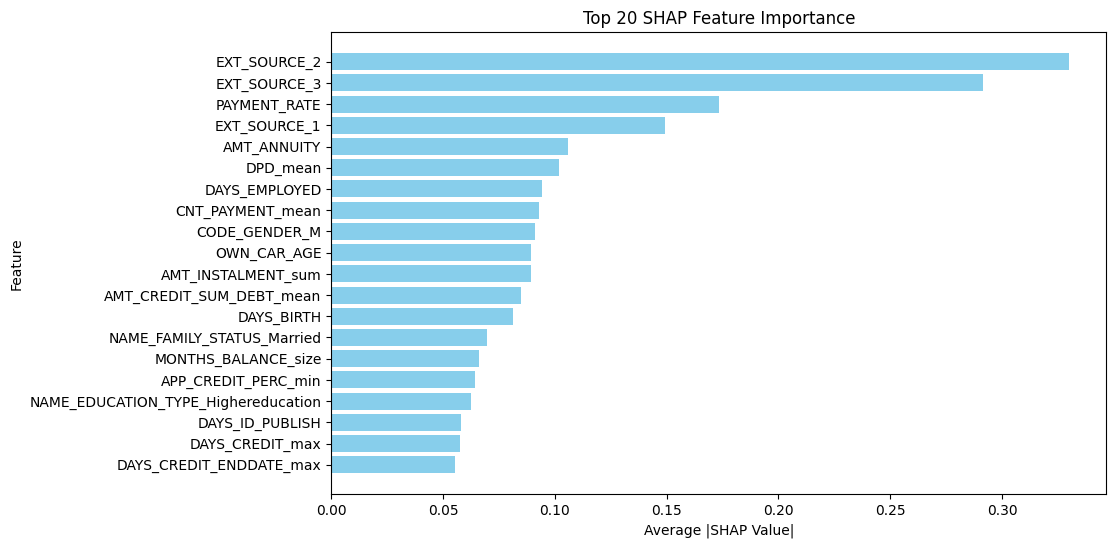


SHAP Waterfall Plot (for the 10th sample)


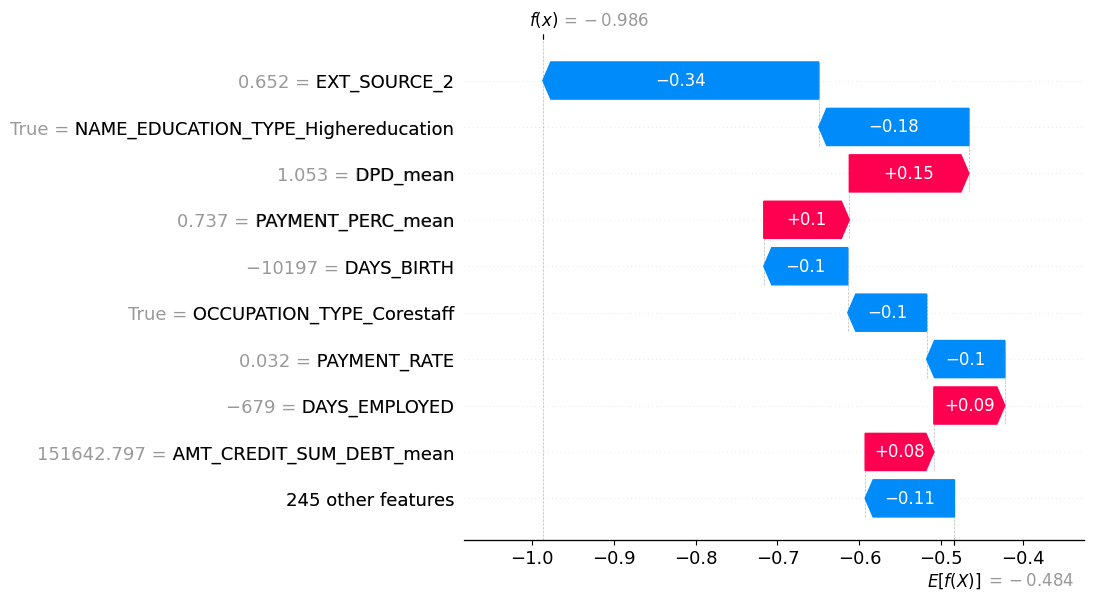

In [ ]:
feature_importance_df = shap_analysis_xgb(train_for_lgb, test_for_lgb)

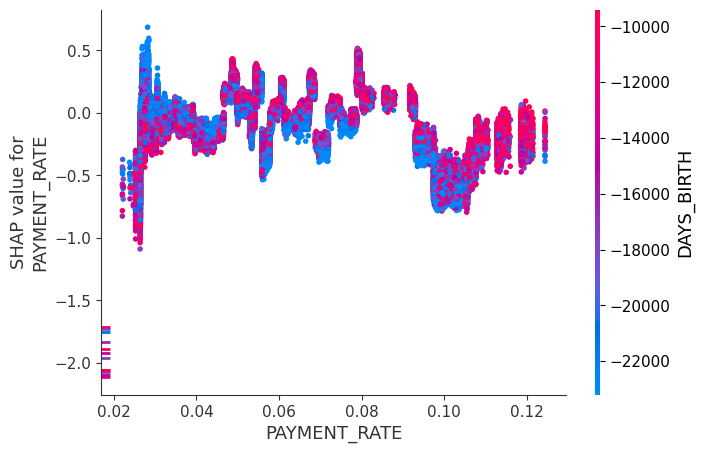

In [ ]:
shap.dependence_plot("PAYMENT_RATE", result["shap_values"].values, result["X"])

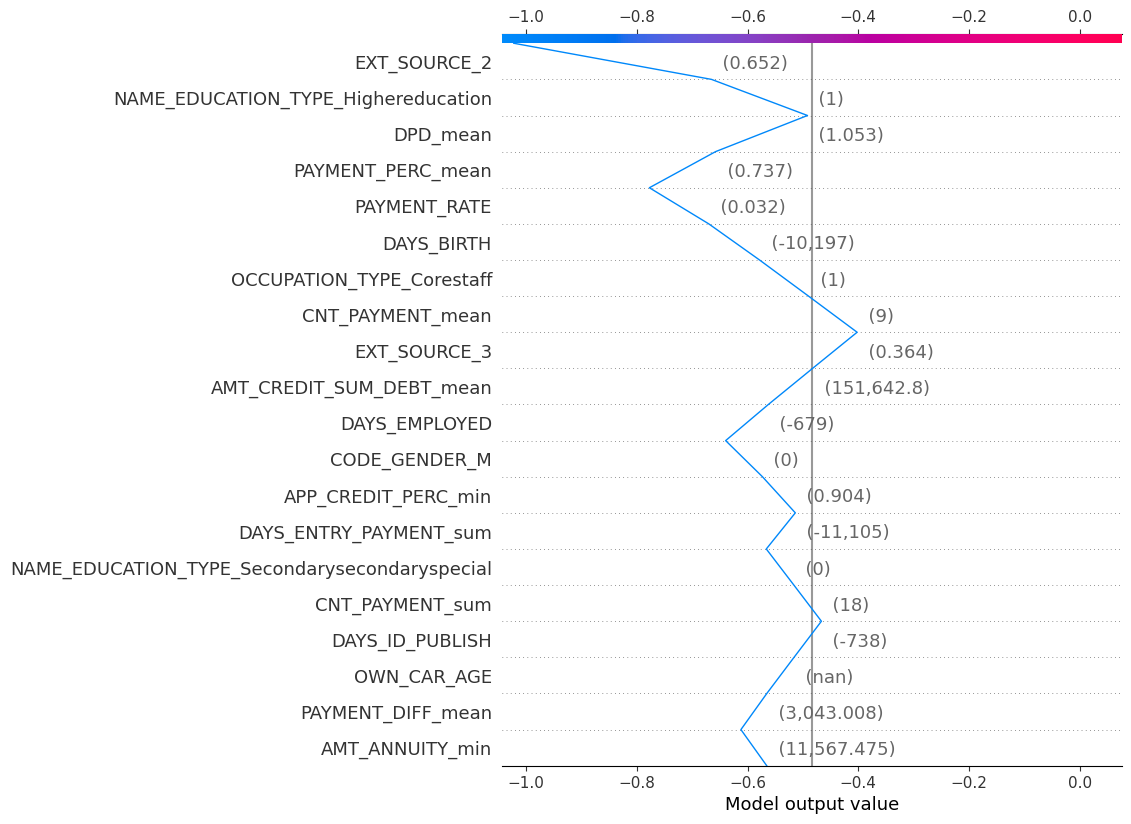

In [ ]:
# Obtaining SHAP Results
shap_values = result["shap_values"]
explainer = result["explainer"]
X = result["X"]

# Specify the sample to be observed, e.g. the 10th stroke.
i = 10
shap.decision_plot(explainer.expected_value, shap_values[i].values, X.iloc[i])

In [ ]:
# Find the features of SHAP that have an importance of 0
zero_shap_features = list(feature_importance_df[feature_importance_df['shap_importance'] == 0.0]['feature'])

print(f'{len(zero_shap_features)} features has 0 importance in SHAP')
print(zero_shap_features)

2 features has 0 importance in SHAP
['NAME_CONTRACT_STATUS_Signed_max', 'NAME_HOUSING_TYPE_Withparents']


In [ ]:
# Deletion of the 10 least influential features
low_important_features = feature_importance_df.sort_values(by="shap_importance", ascending=True).head(10)["feature"].tolist()

In [ ]:
# Deletion of the 20 least influential features
train_SHAP = train_for_lgb.drop(columns=low_important_features)
test_SHAP = test_for_lgb.drop(columns=low_important_features)

### XGBoost (After SHAP analysis)


In [ ]:
submission_7, fi_7, metrics_7, out_of_fold_7, test_predictions_7 = model_XGBoost_2(train_SHAP, test_SHAP)

Train contains inf after cleaning: False
Test contains inf after cleaning: False
Train max value after cleaning: 969732900000.0
Test max value after cleaning: 435812600000.0
Training Data Shape:  (307511, 244)
Testing Data Shape:  (48744, 244)

Fold 1/5
[0]	validation_0-auc:0.68139	validation_0-logloss:0.52089	validation_1-auc:0.67550	validation_1-logloss:0.52035
[100]	validation_0-auc:0.75302	validation_0-logloss:0.45932	validation_1-auc:0.74347	validation_1-logloss:0.46034
[200]	validation_0-auc:0.77393	validation_0-logloss:0.44238	validation_1-auc:0.76114	validation_1-logloss:0.44454
[300]	validation_0-auc:0.78447	validation_0-logloss:0.43330	validation_1-auc:0.76835	validation_1-logloss:0.43658
[400]	validation_0-auc:0.79136	validation_0-logloss:0.42747	validation_1-auc:0.77251	validation_1-logloss:0.43162
[500]	validation_0-auc:0.79658	validation_0-logloss:0.42325	validation_1-auc:0.77521	validation_1-logloss:0.42821
[600]	validation_0-auc:0.80095	validation_0-logloss:0.41981	vali

In [ ]:
metrics_7

,fold,train,valid
0,0,0.873697,0.785651
1,1,0.874751,0.784469
2,2,0.875139,0.789351
3,3,0.874426,0.787889
4,4,0.873748,0.782552
5,overall,0.874352,0.785972


In [ ]:
submission_7.to_csv('xgb_SHAP_4.csv', index = False)

### Blending (lgb and xgb)

In [ ]:
# Merge two DataFrames based on SK_ID_CURR
df_merged = submission_4.merge(submission_7, on='SK_ID_CURR', suffixes=('_1', '_2'))

# Calculate the average of TARGET values
df_merged['TARGET_mean'] = (df_merged['TARGET_1'] + df_merged['TARGET_2']) / 2

# Select the required final columns
df_result = df_merged[['SK_ID_CURR', 'TARGET_mean']]

# Rename the column
df_result = df_result.rename(columns={'TARGET_mean': 'TARGET'})

In [ ]:
df_result.to_csv('Blending(LightGBM_and_XGBoost).csv', index = False)

### Stacking (lgb and xgb)

In [ ]:
submission_ls, fi_ls, metrics_ls, out_of_fold_lgb, test_predictions_lgb = model_LightGBM_3(train_SHAP, test_SHAP)

Training Data Shape:  (307511, 244)
Testing Data Shape:  (48744, 244)
Training until validation scores don't improve for 30 rounds
[50]	train's auc: 0.738807	train's binary_logloss: 0.627422	valid's auc: 0.729983	valid's binary_logloss: 0.628557
[100]	train's auc: 0.753773	train's binary_logloss: 0.603855	valid's auc: 0.743627	valid's binary_logloss: 0.60593
[150]	train's auc: 0.765463	train's binary_logloss: 0.589755	valid's auc: 0.753848	valid's binary_logloss: 0.592436
[200]	train's auc: 0.773838	train's binary_logloss: 0.579816	valid's auc: 0.760463	valid's binary_logloss: 0.583113
[250]	train's auc: 0.779965	train's binary_logloss: 0.572453	valid's auc: 0.764934	valid's binary_logloss: 0.576357
[300]	train's auc: 0.78476	train's binary_logloss: 0.56669	valid's auc: 0.76807	valid's binary_logloss: 0.571172
[350]	train's auc: 0.78862	train's binary_logloss: 0.561972	valid's auc: 0.770391	valid's binary_logloss: 0.566998
[400]	train's auc: 0.791762	train's binary_logloss: 0.558194	va

In [ ]:
submission_xs, fi_xs, metrics_xs, out_of_fold_xgb, test_predictions_xgb = model_XGBoost_2(train_SHAP, test_SHAP)

Train contains inf after cleaning: False
Test contains inf after cleaning: False
Train max value after cleaning: 969732900000.0
Test max value after cleaning: 435812600000.0
Training Data Shape:  (307511, 244)
Testing Data Shape:  (48744, 244)

Fold 1/5
[0]	validation_0-auc:0.68139	validation_0-logloss:0.52089	validation_1-auc:0.67550	validation_1-logloss:0.52035
[100]	validation_0-auc:0.75302	validation_0-logloss:0.45932	validation_1-auc:0.74347	validation_1-logloss:0.46034
[200]	validation_0-auc:0.77393	validation_0-logloss:0.44238	validation_1-auc:0.76114	validation_1-logloss:0.44454
[300]	validation_0-auc:0.78447	validation_0-logloss:0.43330	validation_1-auc:0.76835	validation_1-logloss:0.43658
[400]	validation_0-auc:0.79136	validation_0-logloss:0.42747	validation_1-auc:0.77251	validation_1-logloss:0.43162
[500]	validation_0-auc:0.79658	validation_0-logloss:0.42325	validation_1-auc:0.77521	validation_1-logloss:0.42821
[600]	validation_0-auc:0.80095	validation_0-logloss:0.41981	vali

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Ensure shape consistency
assert out_of_fold_xgb.shape == out_of_fold_lgb.shape
assert test_predictions_xgb.shape == test_predictions_lgb.shape

# Construct Stacking training data
train_stack = np.vstack([out_of_fold_xgb, out_of_fold_lgb]).T
labels = train_SHAP['TARGET']

# Construct Stacking testing data
test_stack = np.vstack([test_predictions_xgb, test_predictions_lgb]).T

# Use Logistic Regression as the Meta Model
meta_model = LogisticRegression(C=10)
meta_model.fit(train_stack, labels)

# Make final predictions
final_preds_LR = meta_model.predict_proba(test_stack)[:, 1]

# Create submission file
stack_LR = pd.DataFrame({'SK_ID_CURR': test_SHAP['SK_ID_CURR'], 'TARGET': final_preds_LR})

print("Stacking completed! 🚀")

Stacking completed! 🚀


In [ ]:
from sklearn.preprocessing import StandardScaler

# Ensure the shapes of XGBoost and LightGBM OOF predictions are identical
assert out_of_fold_xgb.shape == out_of_fold_lgb.shape
assert test_predictions_xgb.shape == test_predictions_lgb.shape

# Combine Stacking training data
train_stack = np.vstack([out_of_fold_xgb, out_of_fold_lgb]).T
test_stack = np.vstack([test_predictions_xgb, test_predictions_lgb]).T

# Standardize the data
scaler = StandardScaler()
train_stack = scaler.fit_transform(train_stack)
test_stack = scaler.transform(test_stack)

# Train Logistic Regression as the meta model
meta_model = LogisticRegression()
meta_model.fit(train_stack, train_SHAP['TARGET'])

# Perform final predictions
final_preds_SS = meta_model.predict_proba(test_stack)[:, 1]

# Generate submission file
stack_SS = pd.DataFrame({'SK_ID_CURR': test_SHAP['SK_ID_CURR'], 'TARGET': final_preds_SS})

print("Stacking completed! 🚀")


Stacking completed! 🚀


In [ ]:
# Ensure input data shapes are consistent
assert out_of_fold_xgb.shape == out_of_fold_lgb.shape
assert test_predictions_xgb.shape == test_predictions_lgb.shape

# Create Stacking training data
train_stack = np.vstack([out_of_fold_xgb, out_of_fold_lgb]).T
labels = train_SHAP['TARGET']

# Create Stacking test data
test_stack = np.vstack([test_predictions_xgb, test_predictions_lgb]).T

X_train, X_valid, y_train, y_valid = train_test_split(train_stack, labels, test_size=0.2, random_state=50)

# Build XGBoost as the Meta Model
meta_model = xgb.XGBClassifier(
            n_estimators=1000,
            objective='binary:logistic',
            learning_rate=0.03,
            max_depth=3,
            min_child_weight=30,
            colsample_bytree=0.85,
            subsample=0.98,
            gamma=0.2,
            reg_alpha=0.2,
            reg_lambda=2,
            random_state=50,
            enable_categorical=True,
            tree_method='gpu_hist',
            scale_pos_weight=6
)

# Train the Meta Model
meta_model.fit(X_train, y_train,
               eval_set=[(X_train, y_train), (X_valid, y_valid)],
               eval_metric=['auc', 'logloss'],
               early_stopping_rounds=100,
               verbose=100)

# Perform final predictions
final_preds_xgb = meta_model.predict_proba(test_stack)[:, 1]

# Create submission file
stack_xgb = pd.DataFrame({'SK_ID_CURR': test_SHAP['SK_ID_CURR'], 'TARGET': final_preds_xgb})

print("Stacking with XGBoost as Meta Model completed! 🚀")

[0]	validation_0-auc:0.78169	validation_0-logloss:0.47705	validation_1-auc:0.78075	validation_1-logloss:0.47632
[100]	validation_0-auc:0.78692	validation_0-logloss:0.39370	validation_1-auc:0.78579	validation_1-logloss:0.39153
[200]	validation_0-auc:0.78720	validation_0-logloss:0.39293	validation_1-auc:0.78573	validation_1-logloss:0.39087
[300]	validation_0-auc:0.78743	validation_0-logloss:0.39281	validation_1-auc:0.78566	validation_1-logloss:0.39086
[386]	validation_0-auc:0.78757	validation_0-logloss:0.39274	validation_1-auc:0.78561	validation_1-logloss:0.39088
Stacking with XGBoost as Meta Model completed! 🚀


In [ ]:
stack_xgb.to_csv("stacking_1.csv", index=False)

In [ ]:
# Ensure input data shapes are consistent
assert out_of_fold_xgb.shape == out_of_fold_lgb.shape
assert test_predictions_xgb.shape == test_predictions_lgb.shape

# Create Stacking training data
train_stack = np.vstack([out_of_fold_xgb, out_of_fold_lgb]).T
labels = train_SHAP['TARGET']

# Create Stacking test data
test_stack = np.vstack([test_predictions_xgb, test_predictions_lgb]).T

# Build XGBoost as the Meta Model
meta_model = xgb.XGBClassifier(
            n_estimators=700,
            objective='binary:logistic',
            learning_rate=0.07,
            max_depth=3,
            min_child_weight=10,
            colsample_bytree=1,
            subsample=0.95,
            gamma=0.2,
            reg_alpha=0.1,
            reg_lambda=1.5,
            random_state=50,
            enable_categorical=True,
            tree_method='gpu_hist',
            scale_pos_weight=7
)

# Train the Meta Model
meta_model.fit(train_stack, labels,
               eval_set=[(train_stack, labels)],
               eval_metric=['auc', 'logloss'],
               early_stopping_rounds=50,
               verbose=50)

# Perform final predictions
final_preds_xgb_1 = meta_model.predict_proba(test_stack)[:, 1]

# Create submission file
stack_xgb_1 = pd.DataFrame({'SK_ID_CURR': test_SHAP['SK_ID_CURR'], 'TARGET': final_preds_xgb_1})

print("Stacking with XGBoost as Meta Model completed! 🚀")

[0]	validation_0-auc:0.78157	validation_0-logloss:0.51012
[50]	validation_0-auc:0.78706	validation_0-logloss:0.42568
[100]	validation_0-auc:0.78760	validation_0-logloss:0.42515
[150]	validation_0-auc:0.78808	validation_0-logloss:0.42484
[200]	validation_0-auc:0.78853	validation_0-logloss:0.42461
[250]	validation_0-auc:0.78887	validation_0-logloss:0.42437
[300]	validation_0-auc:0.78927	validation_0-logloss:0.42441
[350]	validation_0-auc:0.78968	validation_0-logloss:0.42398
[400]	validation_0-auc:0.79007	validation_0-logloss:0.42396
[450]	validation_0-auc:0.79039	validation_0-logloss:0.42376
[500]	validation_0-auc:0.79068	validation_0-logloss:0.42363
[550]	validation_0-auc:0.79101	validation_0-logloss:0.42339
[584]	validation_0-auc:0.79122	validation_0-logloss:0.42331
Stacking with XGBoost as Meta Model completed! 🚀


In [ ]:
stack_xgb_1.to_csv('Stacking_2.csv', index = False)

In [ ]:
# Ensure input data shapes are consistent
assert out_of_fold_xgb.shape == out_of_fold_lgb.shape
assert test_predictions_xgb.shape == test_predictions_lgb.shape

# Create Stacking training data
train_stack = np.vstack([out_of_fold_xgb, out_of_fold_lgb]).T
labels = train_SHAP['TARGET']

# Create Stacking test data
test_stack = np.vstack([test_predictions_xgb, test_predictions_lgb]).T

# Build XGBoost as the Meta Model
meta_model = xgb.XGBClassifier(
            n_estimators=700,
            objective='binary:logistic',
            learning_rate=0.035,
            max_depth=2,
            min_child_weight=5,
            colsample_bytree=1,
            subsample=0.95,
            gamma=0.5,
            reg_alpha=0.1,
            reg_lambda=1.5,
            random_state=50,
            enable_categorical=True,
            tree_method='gpu_hist',
            scale_pos_weight=6
)

# Train the Meta Model
meta_model.fit(train_stack, labels,
               eval_set=[(train_stack, labels)],
               eval_metric=['auc', 'logloss'],
               early_stopping_rounds=50,
               verbose=50)

# Perform final predictions
final_preds_xgb_2 = meta_model.predict_proba(test_stack)[:, 1]

# Create submission file
stack_xgb_2 = pd.DataFrame({'SK_ID_CURR': test_SHAP['SK_ID_CURR'], 'TARGET': final_preds_xgb_2})

print("Stacking with XGBoost as Meta Model completed! 🚀")

[0]	validation_0-auc:0.76702	validation_0-logloss:0.47564
[50]	validation_0-auc:0.78674	validation_0-logloss:0.39873
[100]	validation_0-auc:0.78695	validation_0-logloss:0.39298
[150]	validation_0-auc:0.78703	validation_0-logloss:0.39230
[200]	validation_0-auc:0.78715	validation_0-logloss:0.39214
[250]	validation_0-auc:0.78724	validation_0-logloss:0.39208
[300]	validation_0-auc:0.78733	validation_0-logloss:0.39215
[302]	validation_0-auc:0.78733	validation_0-logloss:0.39215
Stacking with XGBoost as Meta Model completed! 🚀


In [ ]:
stack_xgb_2.to_csv('Stacking_3.csv', index = False)

In [ ]:
final_prediction = 0.9 * test_predictions_xgb + 0.1 * test_predictions_lgb
submission_blending = pd.DataFrame({'SK_ID_CURR': test_SHAP['SK_ID_CURR'], 'TARGET': final_prediction})

In [ ]:
submission_blending.to_csv('blending_0901.csv', index = False)

In [ ]:
# Ensure shape consistency
assert out_of_fold_xgb.shape == out_of_fold_lgb.shape
assert test_predictions_xgb.shape == test_predictions_lgb.shape

# Construct Stacking training data
train_stack = np.vstack([out_of_fold_xgb, out_of_fold_lgb]).T
labels = train_SHAP['TARGET']

# Construct Stacking testing data
test_stack = np.vstack([test_predictions_xgb, test_predictions_lgb]).T

# Use Logistic Regression as the Meta Model
meta_model = LogisticRegression(C=10, class_weight='balanced', random_state=50)
meta_model.fit(train_stack, labels)

# Make final predictions
final_preds_LR_bal = meta_model.predict_proba(test_stack)[:, 1]

# Create submission file
stack_LR_bal = pd.DataFrame({'SK_ID_CURR': test_SHAP['SK_ID_CURR'], 'TARGET': final_preds_LR_bal})

print("Stacking completed! 🚀")

Stacking completed! 🚀


In [ ]:
stack_LR_bal.to_csv('Stacking_4.csv', index = False)

### Deep Learning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
# Custom Dataset Class
class TabularDataset(Dataset):
    def __init__(self, features, labels=None):
        self.features = torch.tensor(features.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.float32) if labels is not None else None

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        if self.labels is not None:
            return self.features[idx], self.labels[idx]
        return self.features[idx]

# Neural Network Model Definition
class TabularNN(nn.Module):
    def __init__(self, input_size, hidden_size=256, dropout=0.2):
        super(TabularNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.network(x)

# Deep Learning Model Function with K-Fold Cross-Validation
def model_DeepLearning(train, test, n_folds=5, epochs=100, batch_size=512, device='cuda' if torch.cuda.is_available() else 'cpu'):
    # Clean column names
    train.columns = train.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)
    test.columns = test.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

    # Extract IDs and labels
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    labels = train['TARGET']

    # Remove ID and TARGET columns
    train = train.drop(columns=['SK_ID_CURR', 'TARGET'])
    test = test.drop(columns=['SK_ID_CURR'])

    # Handle categorical features by converting objects to numeric codes
    cat_features = [col for col in train.columns if train[col].dtype == 'object']
    for col in cat_features:
        combined = pd.concat([train[col], test[col]], axis=0).astype(str)
        codes, uniques = pd.factorize(combined.fillna('NaN'))
        train[col] = codes[:len(train)]
        test[col] = codes[len(train):]

    # Align features between train and test datasets
    all_columns = sorted(set(train.columns).union(set(test.columns)))  # Merge and sort all features
    for col in all_columns:
        if col not in train.columns:
            train[col] = 0
        if col not in test.columns:
            test[col] = 0

    # Ensure column order consistency
    train = train[all_columns]
    test = test[all_columns]

    # Replace infinity values and convert to float32
    train = train.replace([np.inf, -np.inf], np.nan).fillna(0).astype(np.float32)
    test = test.replace([np.inf, -np.inf], np.nan).fillna(0).astype(np.float32)

    # Standardize features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    train_values = scaler.fit_transform(train)
    test_values = scaler.transform(test)

    # Convert back to DataFrame to maintain column names
    train = pd.DataFrame(train_values, columns=train.columns)
    test = pd.DataFrame(test_values, columns=test.columns)

    print('Training Data Shape: ', train.shape)
    print('Testing Data Shape: ', test.shape)

    # Initialize K-Fold cross-validation
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)

    # Initialize arrays for results
    out_of_fold = np.zeros(train.shape[0])
    test_predictions = np.zeros(test.shape[0])
    valid_scores = []
    train_scores = []

    # Compute class weights for handling imbalanced data
    class_weights = torch.tensor([1.0, 282686 / 24825], dtype=torch.float32).to(device)  # Approx. 11.4 weight

    # Start K-Fold training
    for fold_idx, (train_indices, valid_indices) in enumerate(k_fold.split(train)):
        print(f"\nFold {fold_idx + 1}/{n_folds}")

        # Split data into training and validation sets
        train_features, train_labels = train.iloc[train_indices], labels.iloc[train_indices]
        valid_features, valid_labels = train.iloc[valid_indices], labels.iloc[valid_indices]

        # Create datasets and data loaders
        train_dataset = TabularDataset(train_features, train_labels)
        valid_dataset = TabularDataset(valid_features, valid_labels)
        test_dataset = TabularDataset(test)

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        # Initialize model, loss function, optimizer, and learning rate scheduler
        model = TabularNN(input_size=train.shape[1]).to(device)
        criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights[1])
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=5, verbose=True)

        # Training loop with early stopping
        best_auc = 0
        best_model_state = None
        patience = 20
        early_stop_counter = 0

        for epoch in range(epochs):
            model.train()
            for features, targets in train_loader:
                features, targets = features.to(device), targets.to(device)
                optimizer.zero_grad()
                outputs = model(features)
                loss = criterion(outputs.squeeze(), targets)
                loss.backward()
                optimizer.step()

            # Evaluate AUC for training and validation
            model.eval()
            valid_preds, valid_true = [], []
            train_preds, train_true = [], []
            with torch.no_grad():
                for features, targets in valid_loader:
                    features = features.to(device)
                    outputs = torch.sigmoid(model(features)).squeeze()
                    valid_preds.extend(outputs.cpu().numpy())
                    valid_true.extend(targets.numpy())

            valid_auc = roc_auc_score(valid_true, valid_preds)
            print(f"Epoch {epoch + 1}/{epochs}, Valid AUC: {valid_auc:.6f}")

            if valid_auc > best_auc:
                best_auc = valid_auc
                best_model_state = model.state_dict()
                early_stop_counter = 0
            else:
                early_stop_counter += 1
                if early_stop_counter >= patience:
                    print("Early stopping triggered")
                    break

            scheduler.step(valid_auc)

    return submission, metrics, out_of_fold, test_predictions

In [ ]:
submission_DL, metrics_DL, oof_preds_DL, test_preds_DL = model_DeepLearning(train_SHAP, test_SHAP, n_folds=5)

Training Data Shape:  (307511, 244)
Testing Data Shape:  (48744, 244)

Fold 1/5
Epoch 1/100, Train AUC: 0.766501, Valid AUC: 0.753524
Epoch 2/100, Train AUC: 0.776295, Valid AUC: 0.756553
Epoch 3/100, Train AUC: 0.784544, Valid AUC: 0.758651
Epoch 4/100, Train AUC: 0.792002, Valid AUC: 0.761482
Epoch 5/100, Train AUC: 0.799247, Valid AUC: 0.759823
Epoch 6/100, Train AUC: 0.805893, Valid AUC: 0.762121
Epoch 7/100, Train AUC: 0.811467, Valid AUC: 0.759608
Epoch 8/100, Train AUC: 0.818780, Valid AUC: 0.761167
Epoch 9/100, Train AUC: 0.824361, Valid AUC: 0.758768
Epoch 10/100, Train AUC: 0.830411, Valid AUC: 0.759161
Epoch 11/100, Train AUC: 0.835335, Valid AUC: 0.755305
Epoch 12/100, Train AUC: 0.840840, Valid AUC: 0.754476
Epoch 13/100, Train AUC: 0.844013, Valid AUC: 0.754875
Epoch 14/100, Train AUC: 0.859668, Valid AUC: 0.751904
Epoch 15/100, Train AUC: 0.863958, Valid AUC: 0.750904
Epoch 16/100, Train AUC: 0.867414, Valid AUC: 0.751032
Epoch 17/100, Train AUC: 0.867147, Valid AUC: 0.7

In [ ]:
metrics_DL

,fold,train,valid
0,0,0.895922,0.762121
1,1,0.889277,0.759723
2,2,0.892857,0.762501
3,3,0.897617,0.763189
4,4,0.893189,0.760051
5,overall,0.893772,0.745007


In [ ]:
submission_DL.to_csv('DL_1.csv', index = False)

In [ ]:
# Custom Dataset Class
class TabularDataset(Dataset):
    def __init__(self, features, labels=None):
        self.features = torch.tensor(features.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.float32) if labels is not None else None

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        if self.labels is not None:
            return self.features[idx], self.labels[idx]
        return self.features[idx]

# Define Neural Network Model
class TabularNN(nn.Module):
    def __init__(self, input_size, hidden_size=128, dropout=0.3):
        super(TabularNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.network(x)

# Deep Learning Model Function

def model_DeepLearning(train, test, n_folds=5, epochs=100, batch_size=512, device='cuda' if torch.cuda.is_available() else 'cpu'):
    # Clean column names
    train.columns = train.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)
    test.columns = test.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

    # Extract IDs and labels
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    labels = train['TARGET']

    # Remove ID and TARGET columns
    train = train.drop(columns=['SK_ID_CURR', 'TARGET'])
    test = test.drop(columns=['SK_ID_CURR'])

    # Handle categorical features: Convert object data to numeric encoding
    cat_features = [col for col in train.columns if train[col].dtype == 'object']
    for col in cat_features:
        combined = pd.concat([train[col], test[col]], axis=0).astype(str)
        codes, uniques = pd.factorize(combined.fillna('NaN'))
        train[col] = codes[:len(train)]
        test[col] = codes[len(train):]

    # Align train and test features
    all_columns = sorted(set(train.columns).union(set(test.columns)))
    for col in all_columns:
        if col not in train.columns:
            train[col] = 0
        if col not in test.columns:
            test[col] = 0

    # Ensure consistent column order
    train = train[all_columns]
    test = test[all_columns]

    # Handle infinite values and convert to float32
    train = train.replace([np.inf, -np.inf], np.nan).fillna(0).astype(np.float32)
    test = test.replace([np.inf, -np.inf], np.nan).fillna(0).astype(np.float32)

    # Standardize features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    train_values = scaler.fit_transform(train)
    test_values = scaler.transform(test)

    # Convert back to DataFrame to maintain column names
    train = pd.DataFrame(train_values, columns=train.columns)
    test = pd.DataFrame(test_values, columns=test.columns)

    print('Training Data Shape: ', train.shape)
    print('Testing Data Shape: ', test.shape)

    # Create KFold object
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)

    # Initialize arrays
    out_of_fold = np.zeros(train.shape[0])
    test_predictions = np.zeros(test.shape[0])
    valid_scores = []
    train_scores = []

    # Calculate class weights for imbalanced data
    class_weights = torch.tensor([1.0, 282686 / 24825], dtype=torch.float32).to(device)  # Approx. 11.4 weight ratio

    # Perform cross-validation
    for fold_idx, (train_indices, valid_indices) in enumerate(k_fold.split(train)):
        print(f"\nFold {fold_idx + 1}/{n_folds}")

        # Split data into training and validation sets
        train_features, train_labels = train.iloc[train_indices], labels.iloc[train_indices]
        valid_features, valid_labels = train.iloc[valid_indices], labels.iloc[valid_indices]

        # Create datasets and data loaders
        train_dataset = TabularDataset(train_features, train_labels)
        valid_dataset = TabularDataset(valid_features, valid_labels)
        test_dataset = TabularDataset(test)

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        # Initialize the model
        model = TabularNN(input_size=train.shape[1]).to(device)
        criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights[1])  # Apply positive class weight
        optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=0.00001)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.3, patience=3, verbose=True)

        # Train the model
        best_auc = 0
        best_model_state = None
        patience = 20
        early_stop_counter = 0

        for epoch in range(epochs):
            model.train()
            for features, targets in train_loader:
                features, targets = features.to(device), targets.to(device)
                optimizer.zero_grad()
                outputs = model(features)
                loss = criterion(outputs.squeeze(), targets)
                loss.backward()
                optimizer.step()

            # Evaluate training and validation AUC
            model.eval()
            valid_preds, valid_true = [], []
            train_preds, train_true = [], []
            with torch.no_grad():
                for features, targets in valid_loader:
                    features = features.to(device)
                    outputs = torch.sigmoid(model(features)).squeeze()
                    valid_preds.extend(outputs.cpu().numpy())
                    valid_true.extend(targets.numpy())

            valid_auc = roc_auc_score(valid_true, valid_preds)
            print(f"Epoch {epoch + 1}/{epochs}, Valid AUC: {valid_auc:.6f}")

            if valid_auc > best_auc:
                best_auc = valid_auc
                best_model_state = model.state_dict()
                early_stop_counter = 0
            else:
                early_stop_counter += 1
                if early_stop_counter >= patience:
                    print("Early stopping triggered")
                    break

            scheduler.step(valid_auc)

        model.load_state_dict(best_model_state)

    return submission, metrics, out_of_fold, test_predictions

In [ ]:
submission_DL_2, metrics_DL_2, oof_preds_DL_2, test_preds_DL_2 = model_DeepLearning(train_SHAP, test_SHAP, n_folds=5)

Training Data Shape:  (307511, 244)
Testing Data Shape:  (48744, 244)

Fold 1/5
Epoch 1/100, Train AUC: 0.758118, Valid AUC: 0.747751
Epoch 2/100, Train AUC: 0.767006, Valid AUC: 0.753745
Epoch 3/100, Train AUC: 0.773244, Valid AUC: 0.757374
Epoch 4/100, Train AUC: 0.777784, Valid AUC: 0.758721
Epoch 5/100, Train AUC: 0.782857, Valid AUC: 0.760988
Epoch 6/100, Train AUC: 0.787181, Valid AUC: 0.761334
Epoch 7/100, Train AUC: 0.790983, Valid AUC: 0.760870
Epoch 8/100, Train AUC: 0.794596, Valid AUC: 0.762085
Epoch 9/100, Train AUC: 0.798935, Valid AUC: 0.762908
Epoch 10/100, Train AUC: 0.801182, Valid AUC: 0.762254
Epoch 11/100, Train AUC: 0.803703, Valid AUC: 0.762226
Epoch 12/100, Train AUC: 0.808255, Valid AUC: 0.762799
Epoch 13/100, Train AUC: 0.811067, Valid AUC: 0.761913
Epoch 14/100, Train AUC: 0.815818, Valid AUC: 0.763171
Epoch 15/100, Train AUC: 0.817938, Valid AUC: 0.762827
Epoch 16/100, Train AUC: 0.820102, Valid AUC: 0.763002
Epoch 17/100, Train AUC: 0.821876, Valid AUC: 0.7

In [ ]:
metrics_DL_2

,fold,train,valid
0,0,0.826631,0.763171
1,1,0.820582,0.763288
2,2,0.830550,0.765181
3,3,0.829103,0.764807
4,4,0.829345,0.761606
5,overall,0.827242,0.761946


In [ ]:
submission_DL_2.to_csv('DL_2.csv', index = False)

In [ ]:
# Custom Dataset Class
class TabularDataset(Dataset):
    def __init__(self, features, labels=None):
        self.features = torch.tensor(features.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.float32) if labels is not None else None

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        if self.labels is not None:
            return self.features[idx], self.labels[idx]
        return self.features[idx]

# Define Neural Network Model
class TabularNN(nn.Module):
    def __init__(self, input_size, hidden_size=64, dropout=0.4):
        super(TabularNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, 32),  # Reduced from 64 to 32
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(32, 16),  # Added an extra layer
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(16, 1)  # Output layer
        )

    def forward(self, x):
        return self.network(x)

# Custom Focal Loss for handling imbalanced data
class FocalLoss(nn.Module):
    def __init__(self, gamma=2, alpha=0.25):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha

    def forward(self, inputs, targets):
        BCE_loss = nn.functional.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        return loss.mean()

# Main Deep Learning Model Function with K-Fold Cross Validation
def model_DeepLearning(train, test, n_folds=5, epochs=100, batch_size=512, device='cuda' if torch.cuda.is_available() else 'cpu'):
    # Clean column names
    train.columns = train.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)
    test.columns = test.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

    # Extract IDs and labels
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    labels = train['TARGET']

    # Remove ID and TARGET columns
    train = train.drop(columns=['SK_ID_CURR', 'TARGET'])
    test = test.drop(columns=['SK_ID_CURR'])

    # Handle categorical features by converting them to numeric values
    cat_features = [col for col in train.columns if train[col].dtype == 'object']
    for col in cat_features:
        combined = pd.concat([train[col], test[col]], axis=0).astype(str)
        codes, uniques = pd.factorize(combined.fillna('NaN'))
        train[col] = codes[:len(train)]
        test[col] = codes[len(train):]

    # Align train and test features
    all_columns = sorted(set(train.columns).union(set(test.columns)))
    for col in all_columns:
        if col not in train.columns:
            train[col] = 0
        if col not in test.columns:
            test[col] = 0

    # Ensure the column order matches
    train = train[all_columns]
    test = test[all_columns]

    # Handle infinite values and convert to float32
    train = train.replace([np.inf, -np.inf], np.nan).fillna(0).astype(np.float32)
    test = test.replace([np.inf, -np.inf], np.nan).fillna(0).astype(np.float32)

    # Standardize features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    train_values = scaler.fit_transform(train)
    test_values = scaler.transform(test)

    # Convert back to DataFrame to retain column names
    train = pd.DataFrame(train_values, columns=train.columns)
    test = pd.DataFrame(test_values, columns=test.columns)

    print('Training Data Shape: ', train.shape)
    print('Testing Data Shape: ', test.shape)

    # Create KFold object
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)

    # Initialize arrays
    out_of_fold = np.zeros(train.shape[0])
    test_predictions = np.zeros(test.shape[0])
    valid_scores = []
    train_scores = []

    # Calculate class weights for imbalanced data
    class_weights = torch.tensor([1.0, 282686 / 24825], dtype=torch.float32).to(device)

    # Start cross-validation
    for fold_idx, (train_indices, valid_indices) in enumerate(k_fold.split(train)):
        print(f"\nFold {fold_idx + 1}/{n_folds}")

        # Split data into train and validation sets
        train_features, train_labels = train.iloc[train_indices], labels.iloc[train_indices]
        valid_features, valid_labels = train.iloc[valid_indices], labels.iloc[valid_indices]

        # Create datasets and data loaders
        train_dataset = TabularDataset(train_features, train_labels)
        valid_dataset = TabularDataset(valid_features, valid_labels)
        test_dataset = TabularDataset(test)

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        # Initialize model, loss function, optimizer, and scheduler
        model = TabularNN(input_size=train.shape[1]).to(device)
        criterion = FocalLoss(gamma=2, alpha=0.25)
        optimizer = optim.Adam(model.parameters(), lr=0.0002, weight_decay=0.00001)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.2, patience=3, verbose=True)

        # Training loop with early stopping
        best_auc = 0
        best_model_state = None
        patience = 20
        early_stop_counter = 0

        for epoch in range(epochs):
            model.train()
            for features, targets in train_loader:
                features, targets = features.to(device), targets.to(device)
                optimizer.zero_grad()
                outputs = model(features)
                loss = criterion(outputs.squeeze(), targets)
                loss.backward()
                optimizer.step()

            # Validate and calculate AUC
            model.eval()
            valid_preds, valid_true = [], []
            with torch.no_grad():
                for features, targets in valid_loader:
                    features = features.to(device)
                    outputs = torch.sigmoid(model(features)).squeeze()
                    valid_preds.extend(outputs.cpu().numpy())
                    valid_true.extend(targets.numpy())

            valid_auc = roc_auc_score(valid_true, valid_preds)
            print(f"Epoch {epoch + 1}/{epochs}, Valid AUC: {valid_auc:.6f}")

            if valid_auc > best_auc:
                best_auc = valid_auc
                best_model_state = model.state_dict()
                early_stop_counter = 0
            else:
                early_stop_counter += 1
                if early_stop_counter >= patience:
                    print("Early stopping triggered")
                    break
            scheduler.step(valid_auc)

    return submission, metrics, out_of_fold, test_predictions

In [ ]:
submission_DL_3, metrics_DL_3, oof_preds_DL_3, test_preds_DL_3 = model_DeepLearning(train_SHAP, test_SHAP, n_folds=5)

Training Data Shape:  (307511, 244)
Testing Data Shape:  (48744, 244)

Fold 1/5
Epoch 1/100, Train AUC: 0.652932, Valid AUC: 0.649764
Epoch 2/100, Train AUC: 0.705183, Valid AUC: 0.696686
Epoch 3/100, Train AUC: 0.725924, Valid AUC: 0.717211
Epoch 4/100, Train AUC: 0.736945, Valid AUC: 0.728231
Epoch 5/100, Train AUC: 0.745058, Valid AUC: 0.736101
Epoch 6/100, Train AUC: 0.749890, Valid AUC: 0.740633
Epoch 7/100, Train AUC: 0.751734, Valid AUC: 0.742709
Epoch 8/100, Train AUC: 0.754859, Valid AUC: 0.745218
Epoch 9/100, Train AUC: 0.757926, Valid AUC: 0.747502
Epoch 10/100, Train AUC: 0.759332, Valid AUC: 0.748293
Epoch 11/100, Train AUC: 0.762355, Valid AUC: 0.751216
Epoch 12/100, Train AUC: 0.762947, Valid AUC: 0.750894
Epoch 13/100, Train AUC: 0.764447, Valid AUC: 0.751949
Epoch 14/100, Train AUC: 0.765432, Valid AUC: 0.752686
Epoch 15/100, Train AUC: 0.766705, Valid AUC: 0.753688
Epoch 16/100, Train AUC: 0.768175, Valid AUC: 0.754551
Epoch 17/100, Train AUC: 0.770881, Valid AUC: 0.7

In [ ]:
metrics_DL_3

,fold,train,valid
0,0,0.803259,0.763101
1,1,0.806164,0.762147
2,2,0.802030,0.764811
3,3,0.808727,0.764610
4,4,0.805726,0.758921
5,overall,0.805181,0.762162


In [ ]:
submission_DL_3.to_csv('DL_3.csv', index = False)

In [ ]:
# Custom Dataset Class
class TabularDataset(Dataset):
    def __init__(self, features, labels=None):
        self.features = torch.tensor(features.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.float32) if labels is not None else None

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        if self.labels is not None:
            return self.features[idx], self.labels[idx]
        return self.features[idx]

# Define Neural Network Model
class TabularNN(nn.Module):
    def __init__(self, input_size, hidden_size=64, dropout=0.3):
        super(TabularNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.network(x)

# Define Focal Loss Class
class FocalLoss(nn.Module):
    def __init__(self, gamma=2, alpha=0.25):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha

    def forward(self, inputs, targets):
        BCE_loss = nn.functional.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        return loss.mean()

# Main Deep Learning Model Function
def model_DeepLearning(train, test, n_folds=5, epochs=100, batch_size=512, device='cuda' if torch.cuda.is_available() else 'cpu'):
    # Clean column names
    train.columns = train.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)
    test.columns = test.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)

    # Extract IDs and labels
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    labels = train['TARGET']

    # Remove IDs and target labels from the dataset
    train = train.drop(columns=['SK_ID_CURR', 'TARGET'])
    test = test.drop(columns=['SK_ID_CURR'])

    # Handle categorical features by converting object columns to numerical values
    cat_features = [col for col in train.columns if train[col].dtype == 'object']
    for col in cat_features:
        combined = pd.concat([train[col], test[col]], axis=0).astype(str)
        codes, uniques = pd.factorize(combined.fillna('NaN'))
        train[col] = codes[:len(train)]
        test[col] = codes[len(train):]

    # Align train and test datasets to have the same feature set
    all_columns = sorted(set(train.columns).union(set(test.columns)))
    for col in all_columns:
        if col not in train.columns:
            train[col] = 0
        if col not in test.columns:
            test[col] = 0

    # Ensure column order consistency
    train = train[all_columns]
    test = test[all_columns]

    # Handle infinite values and convert to float32
    train = train.replace([np.inf, -np.inf], np.nan).fillna(0).astype(np.float32)
    test = test.replace([np.inf, -np.inf], np.nan).fillna(0).astype(np.float32)

    # Standardize features using StandardScaler
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    train_values = scaler.fit_transform(train)
    test_values = scaler.transform(test)

    # Convert back to DataFrame with original column names
    train = pd.DataFrame(train_values, columns=train.columns)
    test = pd.DataFrame(test_values, columns=test.columns)

    print('Training Data Shape: ', train.shape)
    print('Testing Data Shape: ', test.shape)

    # Initialize KFold object for cross-validation
    k_fold = KFold(n_splits=n_folds, shuffle=True, random_state=50)

    # Initialize arrays to store results
    out_of_fold = np.zeros(train.shape[0])
    test_predictions = np.zeros(test.shape[0])
    valid_scores = []
    train_scores = []

    # Calculate class weights for handling class imbalance
    pos_weight = torch.tensor([6.0]).to(device)

    # Perform k-fold cross-validation
    for fold_idx, (train_indices, valid_indices) in enumerate(k_fold.split(train)):
        print(f"\nFold {fold_idx + 1}/{n_folds}")

        # Split data into training and validation sets
        train_features, train_labels = train.iloc[train_indices], labels.iloc[train_indices]
        valid_features, valid_labels = train.iloc[valid_indices], labels.iloc[valid_indices]

        # Create datasets and data loaders
        train_dataset = TabularDataset(train_features, train_labels)
        valid_dataset = TabularDataset(valid_features, valid_labels)
        test_dataset = TabularDataset(test)

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        # Initialize model, loss function, optimizer, and scheduler
        model = TabularNN(input_size=train.shape[1]).to(device)
        criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
        optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.00001)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.2, patience=2, verbose=True)

        # Train the model
        best_auc = 0
        best_model_state = None
        patience = 20
        early_stop_counter = 0

        for epoch in range(epochs):
            model.train()
            for features, targets in train_loader:
                features, targets = features.to(device), targets.to(device)
                optimizer.zero_grad()
                outputs = model(features)
                loss = criterion(outputs.squeeze(), targets)
                loss.backward()
                optimizer.step()

            # Validate and calculate AUC
            model.eval()
            valid_preds, valid_true = [], []
            with torch.no_grad():
                for features, targets in valid_loader:
                    features = features.to(device)
                    outputs = torch.sigmoid(model(features)).squeeze()
                    valid_preds.extend(outputs.cpu().numpy())
                    valid_true.extend(targets.numpy())

            valid_auc = roc_auc_score(valid_true, valid_preds)
            print(f"Epoch {epoch + 1}/{epochs}, Valid AUC: {valid_auc:.6f}")

            if valid_auc > best_auc:
                best_auc = valid_auc
                best_model_state = model.state_dict()
                early_stop_counter = 0
            else:
                early_stop_counter += 1
                if early_stop_counter >= patience:
                    print("Early stopping triggered")
                    break

            scheduler.step(valid_auc)

    return submission, metrics, out_of_fold, test_predictions

In [ ]:
submission_DL_4, metrics_DL_4, oof_preds_DL_4, test_preds_DL_4 = model_DeepLearning(train_SHAP, test_SHAP, n_folds=5)

Training Data Shape:  (307511, 244)
Testing Data Shape:  (48744, 244)

Fold 1/5
Epoch 1/100, Train AUC: 0.693896, Valid AUC: 0.683912
Epoch 2/100, Train AUC: 0.729531, Valid AUC: 0.720118
Epoch 3/100, Train AUC: 0.745064, Valid AUC: 0.735804
Epoch 4/100, Train AUC: 0.752156, Valid AUC: 0.742529
Epoch 5/100, Train AUC: 0.756165, Valid AUC: 0.746069
Epoch 6/100, Train AUC: 0.759009, Valid AUC: 0.747891
Epoch 7/100, Train AUC: 0.761141, Valid AUC: 0.749658
Epoch 8/100, Train AUC: 0.763180, Valid AUC: 0.750981
Epoch 9/100, Train AUC: 0.765068, Valid AUC: 0.752539
Epoch 10/100, Train AUC: 0.766132, Valid AUC: 0.752967
Epoch 11/100, Train AUC: 0.767724, Valid AUC: 0.753601
Epoch 12/100, Train AUC: 0.769007, Valid AUC: 0.754463
Epoch 13/100, Train AUC: 0.770095, Valid AUC: 0.754711
Epoch 14/100, Train AUC: 0.771136, Valid AUC: 0.755625
Epoch 15/100, Train AUC: 0.772478, Valid AUC: 0.756385
Epoch 16/100, Train AUC: 0.773567, Valid AUC: 0.756851
Epoch 17/100, Train AUC: 0.774787, Valid AUC: 0.7

In [ ]:
metrics_DL_4

,fold,train,valid
0,0,0.800390,0.762871
1,1,0.791828,0.761170
2,2,0.795687,0.763001
3,3,0.790675,0.762903
4,4,0.794305,0.760560
5,overall,0.794577,0.761872


In [ ]:
submission_DL_4.to_csv('DL_4.csv', index = False)

### Blending (xgb and DL)

In [ ]:
prediction_xgb_DL = 0.8 * test_predictions_xgb + 0.2 * test_preds_DL_4
blending_xgb_DL = pd.DataFrame({'SK_ID_CURR': test_SHAP['SK_ID_CURR'], 'TARGET': prediction_xgb_DL})

In [ ]:
blending_xgb_DL.to_csv('blending_xgb_DL.csv', index = False)